# Predictive Analytics Individual Coursework (60%)
# Diabetis Readmission
Due on April the 22nd

Candidate Number: FSMV3

<p>&nbsp;</p>
<p>&nbsp;</p>

# 1. SetUp

<p>&nbsp;</p>


In [5]:
!pip install imbalanced-learn
!pip install --upgrade seaborn matplotlib pandas

In [259]:
# Skip this block if you are running on local computer
# connection with google drive
#from google.colab import drive
#drive.mount('/content/drive')

In [1]:
# import libraries and modules needed for the project
import pandas as pd   # !pip install pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import metrics
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import metrics

import tensorflow.keras.backend as K


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import Precision, Recall
from keras_tuner import RandomSearch, Objective
import random
import os

from sklearn.metrics import precision_recall_curve

In [ ]:
# for reproducibility
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

set_seed(42)

<p>&nbsp;</p>
<p>&nbsp;</p>

# 2.Data Collection


In [261]:
# import dataframes
df = pd.read_csv('/Users/alessandracerutti/Desktop/07_UCL/09_Predictive_Analytics/individual_project/data_diabetes_130us_hospitals_1999_2008/diabetic_data.csv')

# ids encoding dataframes
df_admission_source = pd.read_csv('/Users/alessandracerutti/Desktop/07_UCL/09_Predictive_Analytics/individual_project/data_diabetes_130us_hospitals_1999_2008/IDS_admission_source.csv')
df_discharge_disposition = pd.read_csv('/Users/alessandracerutti/Desktop/07_UCL/09_Predictive_Analytics/individual_project/data_diabetes_130us_hospitals_1999_2008/IDS_discharge_disposition.csv')
df_admission_type =pd.read_csv('data_diabetes_130us_hospitals_1999_2008/IDS_admission_type.csv')

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [263]:
df_admission_source.head()

admission_source_id                     admission_source_description
0                    1                               Physician Referral
1                    2                                  Clinic Referral
2                    3                                     HMO Referral
3                    4                         Transfer from a hospital
4                    5   Transfer from a Skilled Nursing Facility (SNF)

In [264]:
# de-encode the admission source id by merging the tables
df = df.merge(df_admission_source, on ='admission_source_id')

df.head()

encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... insulin glyburide-metformin  glipizide-metformin  \
0                 1  ...      No                  No                   No   
1                 3  ...      Up                  No                   No   
2                 2  ...      No                  No                   No   
3                 2  ...      Up                  No                   No   
4                 1  ...  Steady                  No                   No   

   glimepiride-pioglitazone  metformin-rosiglitazone  metformin-pioglitazone  \
0                        No                       No                      No   
1                        No                       No                      No   
2                        No                       No                      No   
3                        No                       No                      No   
4                        No                       No                      No   

   change  diabetesMed readmitted admission_source_description  
0      No           No         NO           Physician Referral  
1      Ch          Yes        >30               Emergency Room  
2      No          Yes         NO               Emergency Room  
3      Ch          Yes         NO               Emergency Room  
4      Ch          Yes         NO               Emergency Room  

[5 rows x 51 columns]

In [265]:
# seeing table about the disposition discharges
df_discharge_disposition

discharge_disposition_id  \
0                          1   
1                          2   
2                          3   
3                          4   
4                          5   
5                          6   
6                          7   
7                          8   
8                          9   
9                         10   
10                        11   
11                        12   
12                        13   
13                        14   
14                        15   
15                        16   
16                        17   
17                        18   
18                        19   
19                        20   
20                        21   
21                        22   
22                        23   
23                        24   
24                        25   
25                        26   
26                        30   
27                        27   
28                        28   
29                        29   

                    discharge_disposition_description  
0                                  Discharged to home  
1   Discharged/transferred to another short term h...  
2                       Discharged/transferred to SNF  
3                       Discharged/transferred to ICF  
4   Discharged/transferred to another type of inpa...  
5   Discharged/transferred to home with home healt...  
6                                            Left AMA  
7   Discharged/transferred to home under care of H...  
8           Admitted as an inpatient to this hospital  
9   Neonate discharged to another hospital for neo...  
10                                            Expired  
11  Still patient or expected to return for outpat...  
12                                     Hospice / home  
13                         Hospice / medical facility  
14  Discharged/transferred within this institution...  
15  Discharged/transferred/referred another instit...  
16  Discharged/transferred/referred to this instit...  
17                                                NaN  
18           Expired at home. Medicaid only, hospice.  
19  Expired in a medical facility. Medicaid only, ...  
20    Expired, place unknown. Medicaid only, hospice.  
21  Discharged/transferred to another rehab fac in...  
22  Discharged/transferred to a long term care hos...  
23  Discharged/transferred to a nursing facility c...  
24                                         Not Mapped  
25                                    Unknown/Invalid  
26  Discharged/transferred to another Type of Heal...  
27  Discharged/transferred to a federal health car...  
28  Discharged/transferred/referred to a psychiatr...  
29  Discharged/transferred to a Critical Access Ho...

In [266]:
df_discharge_disposition['discharge_disposition_description'].unique().tolist()

['Discharged to home',
 'Discharged/transferred to another short term hospital',
 'Discharged/transferred to SNF',
 'Discharged/transferred to ICF',
 'Discharged/transferred to another type of inpatient care institution',
 'Discharged/transferred to home with home health service',
 'Left AMA',
 'Discharged/transferred to home under care of Home IV provider',
 'Admitted as an inpatient to this hospital',
 'Neonate discharged to another hospital for neonatal aftercare',
 'Expired',
 'Still patient or expected to return for outpatient services',
 'Hospice / home',
 'Hospice / medical facility',
 'Discharged/transferred within this institution to Medicare approved swing bed',
 'Discharged/transferred/referred another institution for outpatient services',
 'Discharged/transferred/referred to this institution for outpatient services',
 nan,
 'Expired at home. Medicaid only, hospice.',
 'Expired in a medical facility. Medicaid only, hospice.',
 'Expired, place unknown. Medicaid only, hospice.

In [267]:
# de-encode the discharge disposition id by adding the disposition description
# for each patient
df = df.merge(df_discharge_disposition, on='discharge_disposition_id')

In [268]:
df.groupby('discharge_disposition_description').size()

discharge_disposition_description
Admitted as an inpatient to this hospital                                                                       21
Discharged to home                                                                                           60234
Discharged/transferred to ICF                                                                                  815
Discharged/transferred to SNF                                                                                13954
Discharged/transferred to a federal health care facility.                                                        5
Discharged/transferred to a long term care hospital.                                                           412
Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.         48
Discharged/transferred to another rehab fac including rehab units of a hospital .                             1993
Discharged/transferred to another short term h

In [269]:
# see table about admission type
df_admission_type

admission_type_id admission_type_description
0                  1                  Emergency
1                  2                     Urgent
2                  3                   Elective
3                  4                    Newborn
4                  5              Not Available
5                  6                        NaN
6                  7              Trauma Center
7                  8                 Not Mapped

In [270]:
# de-encode the admission type id by adding the admission type description
# for each patient
df = df.merge(df_admission_type, on='admission_type_id')

In [271]:
# checking the target variable
df.groupby('readmitted').size()

readmitted
<30    11357
>30    35545
NO     54864
dtype: int64

- small class imbalance: much less patients needed to be readmitted in less than 30 days compared to the patients that got readmitted after more than 30 days and patients that did not get readmitted

<p>&nbsp;</p>
<p>&nbsp;</p>

# 3.Data Preprocessing

<p>&nbsp;</p>



## 3.1 Data Cleaning

We assume that for all the people readmitted later than 30 days, there are other reasons for the readmission and these are not connected to the one we are looking at

In [272]:
# Change the value '<30' to 'NO' in the 'readmitted' column
df['readmitted'] = df['readmitted'].replace('>30', 'NO')

### 3.1.1 Missing Values

In [273]:
len(df)

101766

In [274]:
# checking missing values for each column
missing_values_count = df.isnull().sum()
missing_percentage = round((missing_values_count / len(df) * 100), 2)

# Create DF to store results
missing_data_df = pd.DataFrame({
    'Column Name': missing_values_count.index,
    'Missing Values': missing_values_count.values,
    'Missing Percentage': missing_percentage.values
})

# Filter DF to see only missing values > 0
missing_data_df = missing_data_df[missing_data_df['Missing Percentage'] > 0]

missing_data_df

# we observe that only few columns  has missing values
# (exception of A1Cresult and metformin) - that is weird, let's dive deeper

Column Name  Missing Values  Missing Percentage
22                      max_glu_serum           96420               94.75
23                          A1Cresult           84748               83.28
50       admission_source_description            6781                6.66
51  discharge_disposition_description            3691                3.63
52         admission_type_description            5291                5.20

Interesting that so many columns do not have any missing value
hypothesis a lot of missing values are represented by values others than Na

In [275]:
unique_values_dict = {
    'Column Name': [],
    'Unique Values': []
}

# Iterate over each column in the DataFrame
for column in df.columns:
    unique_values = df[column].unique()  # Get the unique values for the column
    unique_values_dict['Column Name'].append(column)
    unique_values_dict['Unique Values'].append(unique_values)

# Create a DataFrame from the dictionary
unique_values_df = pd.DataFrame(unique_values_dict)

# Display the DataFrame
unique_values_df

Column Name  \
0                        encounter_id   
1                         patient_nbr   
2                                race   
3                              gender   
4                                 age   
5                              weight   
6                   admission_type_id   
7            discharge_disposition_id   
8                 admission_source_id   
9                    time_in_hospital   
10                         payer_code   
11                  medical_specialty   
12                 num_lab_procedures   
13                     num_procedures   
14                    num_medications   
15                  number_outpatient   
16                   number_emergency   
17                   number_inpatient   
18                             diag_1   
19                             diag_2   
20                             diag_3   
21                   number_diagnoses   
22                      max_glu_serum   
23                          A1Cresult   
24                          metformin   
25                        repaglinide   
26                        nateglinide   
27                     chlorpropamide   
28                        glimepiride   
29                      acetohexamide   
30                          glipizide   
31                          glyburide   
32                        tolbutamide   
33                       pioglitazone   
34                      rosiglitazone   
35                           acarbose   
36                           miglitol   
37                       troglitazone   
38                         tolazamide   
39                            examide   
40                        citoglipton   
41                            insulin   
42                glyburide-metformin   
43                glipizide-metformin   
44           glimepiride-pioglitazone   
45            metformin-rosiglitazone   
46             metformin-pioglitazone   
47                             change   
48                        diabetesMed   
49                         readmitted   
50       admission_source_description   
51  discharge_disposition_description   
52         admission_type_description   

                                        Unique Values  
0   [2278392, 149190, 64410, 500364, 16680, 35754,...  
1   [8222157, 55629189, 86047875, 82442376, 425192...  
2   [Caucasian, AfricanAmerican, ?, Other, Asian, ...  
3                     [Female, Male, Unknown/Invalid]  
4   [[0-10), [10-20), [20-30), [30-40), [40-50), [...  
5   [?, [75-100), [50-75), [0-25), [100-125), [25-...  
6                            [6, 1, 2, 3, 4, 5, 8, 7]  
7   [25, 1, 3, 6, 2, 5, 11, 7, 10, 4, 14, 18, 8, 1...  
8   [1, 7, 2, 4, 5, 6, 20, 3, 17, 8, 9, 14, 10, 22...  
9     [1, 3, 2, 4, 5, 13, 12, 9, 7, 10, 6, 11, 8, 14]  
10  [?, MC, MD, HM, UN, BC, SP, CP, SI, DM, CM, CH...  
11  [Pediatrics-Endocrinology, ?, InternalMedicine...  
12  [41, 59, 11, 44, 51, 31, 70, 73, 68, 33, 47, 6...  
13                              [0, 5, 1, 6, 2, 3, 4]  
14  [1, 18, 13, 16, 8, 21, 12, 28, 17, 11, 15, 31,...  
15  [0, 2, 1, 5, 7, 9, 3, 8, 4, 12, 11, 6, 20, 15,...  
16  [0, 1, 2, 4, 3, 9, 5, 7, 6, 8, 22, 25, 10, 13,...  
17  [0, 1, 2, 3, 6, 5, 4, 7, 8, 9, 15, 10, 11, 14,...  
18  [250.83, 276, 648, 8, 197, 414, 428, 398, 434,...  
19  [?, 250.01, 250, 250.43, 157, 411, 492, 427, 1...  
20  [?, 255, V27, 403, 250, V45, 38, 486, 996, 197...  
21  [1, 9, 6, 7, 5, 8, 3, 4, 2, 16, 12, 13, 15, 10...  
22                            [nan, >300, Norm, >200]  
23                                [nan, >7, >8, Norm]  
24                             [No, Steady, Up, Down]  
25                             [No, Up, Steady, Down]  
26                             [No, Steady, Down, Up]  
27                             [No, Steady, Down, Up]  
28                             [No, Steady, Down, Up]  
29                                       [No, Steady]  
30                             [No, Steady, Up, Down]  
31                 

We observe that a lot of columns have values `?`with question mark. Next we replace all these values with nan

In [276]:
# replace all ? values in the DF with NA to be able to count them

df = df.replace('?', np.nan)

In [277]:
# again checking columns with missing values

missing_values_count = df.isnull().sum()
missing_percentage = round((missing_values_count / len(df) * 100), 2)

# Create a DataFrame with the results
missing_data_df = pd.DataFrame({
    'Column Name': missing_values_count.index,
    'Missing Values': missing_values_count.values,
    'Missing Percentage': missing_percentage.values
})

# Filter the DataFrame to only include columns with missing values > 0
missing_data_df = missing_data_df[missing_data_df['Missing Percentage'] > 0]

missing_data_df.sort_values(by=['Missing Percentage'], ascending=False)


Column Name  Missing Values  Missing Percentage
5                              weight           98569               96.86
22                      max_glu_serum           96420               94.75
23                          A1Cresult           84748               83.28
11                  medical_specialty           49949               49.08
10                         payer_code           40256               39.56
50       admission_source_description            6781                6.66
52         admission_type_description            5291                5.20
51  discharge_disposition_description            3691                3.63
2                                race            2273                2.23
20                             diag_3            1423                1.40
19                             diag_2             358                0.35
18                             diag_1              21                0.02

We observe that `weight` column has the most missing values, we will drop it. 

 In `A1Cresult` & in `max_glu_serum` Nan stands for not measured -> we keep it but change the column name (to avoid the model seing missing data, see https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008) 

We have to dive deeper in the `medical speciality` before dropping it, since it could be relevant for predicting readmission (hypothesis: a specific illness in a medical speciality is more connected to diabetis than another one)

We will drop the `payer_code`, as it does not contain any relevant information regarding the predictability of being readmitted.

The columns `admission_source_description` and `discharge_disposition_description` have less than 7%, respectively less than 4%, missing values, we will keep them and do not perform any changes.

The column `race` has a 2.23% missing values, we will not fill the missing values, since we do not have any data points to highlight the race of a patient. We will drop the rows with missing values for the the race

The values in columns `diag_1`, `diag_2`, `diag_3` will be filled with the most common values.

#### 3.1.1.1 Dropping Columns

In [278]:
#  to drop :
# - payer code because not relavant to predict readmission
# - weight because too many missing values
# - max glu serum too many missing values
# - A1Cresults too many missing values

df = df.drop(columns= ['weight', 'payer_code'])

#### 3.1.1.2 Replacing missing Values

#### Colum `gender``


In [279]:
df['gender'].value_counts()

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64

In [280]:
# Find the index of rows with 'Unknown/Invalid' in the 'gender' column
invalid_gender_index = df[df['gender'] == 'Unknown/Invalid'].index

# Drop the rows
df = df.drop(invalid_gender_index)


##### Columns: `diag_1`, `diag_2`, `diag_3`

In [281]:
# Columns diag_1, diag_2, diag_3 to fill with the most common values
from collections import Counter

diag_1 = Counter(list(df['diag_1'])).most_common(1)[0][0]
diag_2 = Counter(list(df['diag_2'])).most_common(1)[0][0]
diag_3 = Counter(list(df['diag_3'])).most_common(1)[0][0]


In [282]:
# Replace NaN values with the most common value
df['diag_1'].fillna(diag_1, inplace=True)
df['diag_2'].fillna(diag_2, inplace=True)
df['diag_3'].fillna(diag_3, inplace=True)

/var/folders/vg/nl_vpfpd3f96h8h8tbd78lw40000gn/T/ipykernel_7032/77953113.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['diag_1'].fillna(diag_1, inplace=True)
/var/folders/vg/nl_vpfpd3f96h8h8tbd78lw40000gn/T/ipykernel_7032/77953113.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

#### 3.1.1.3 Dropping rows with missing Values

In [283]:
# dropping rows that have missing values in the column race
df = df.dropna(subset=['race'])

#### Adding a new category for all the entries that do not have a medical speciality

The new category will be `missing`. The approach of filling the missing values with this categorical variable is given by the fact that we should not cut off half of the dataset. We can't have any missing values in the model otherwise the model would not work.

In [284]:
# Replace NaN values with the value missing
df['medical_specialty'].fillna('missing', inplace=True)

/var/folders/vg/nl_vpfpd3f96h8h8tbd78lw40000gn/T/ipykernel_7032/196603471.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['medical_specialty'].fillna('missing', inplace=True)


In the column `discharge_disposition_description` there are three categories of values
that can be summarised together and can then all the missing values can be added to that category too
the categories that can be put together are: NaN, Not Mapped and Unknow / Invalid

In [285]:
# Replace 'Not Mapped' and 'Unknown/Invalid' with 'Missing'
df['discharge_disposition_description'].replace(['Not Mapped', 'Unknown/Invalid'], 'Missing', inplace=True)

# Replace NaN values with 'Missing'
df['discharge_disposition_description'].fillna('Missing', inplace=True)

/var/folders/vg/nl_vpfpd3f96h8h8tbd78lw40000gn/T/ipykernel_7032/3460849810.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['discharge_disposition_description'].replace(['Not Mapped', 'Unknown/Invalid'], 'Missing', inplace=True)


Same approach for the column `admission_type_description`. We merge the values Not Available, Nan  and Not Mapped together, in one category we name Missing.

In [286]:
# Replace 'Not Mapped' and 'Unknown/Invalid' with 'Missing'
df['admission_type_description'].replace(['Not Mapped', 'Not Available'], 'Missing', inplace=True)

# Replace NaN values with 'Missing'
df['admission_type_description'].fillna('Missing', inplace=True)

/var/folders/vg/nl_vpfpd3f96h8h8tbd78lw40000gn/T/ipykernel_7032/4079104480.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['admission_type_description'].replace(['Not Mapped', 'Not Available'], 'Missing', inplace=True)


For the column: `admission_source_description` same approach as above.

In [287]:
# Replace 'Not Mapped' and 'Unknown/Invalid' with 'Missing'
df['admission_source_description'].replace(['Not Mapped', 'Not Available'], 'Missing', inplace=True)

# Replace NaN values with 'Missing'
df['admission_source_description'].fillna('Missing', inplace=True)


/var/folders/vg/nl_vpfpd3f96h8h8tbd78lw40000gn/T/ipykernel_7032/295203221.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['admission_source_description'].replace(['Not Mapped', 'Not Available'], 'Missing', inplace=True)


For the `A1Cresult` & in `max_glu_serum` same approach as above. 

In [288]:
# Replace NaN values with 'Missing'
df['A1Cresult'].fillna('Missing', inplace=True)
df['max_glu_serum'].fillna('Missing', inplace=True)

/var/folders/vg/nl_vpfpd3f96h8h8tbd78lw40000gn/T/ipykernel_7032/3638743891.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['A1Cresult'].fillna('Missing', inplace=True)
/var/folders/vg/nl_vpfpd3f96h8h8tbd78lw40000gn/T/ipykernel_7032/3638743891.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

**Quality Check:** ensure that no more missing values are present

In [289]:
# again checking columns with missing values

missing_values_count = df.isnull().sum()
missing_percentage = round((missing_values_count / len(df) * 100), 2)

# Create a DataFrame with the results
missing_data_df = pd.DataFrame({
    'Column Name': missing_values_count.index,
    'Missing Values': missing_values_count.values,
    'Missing Percentage': missing_percentage.values
})

# Filter the DataFrame to only include columns with missing values > 0
missing_data_df = missing_data_df[missing_data_df['Missing Percentage'] > 0]

missing_data_df.sort_values(by=['Missing Percentage'], ascending=False)

Empty DataFrame
Columns: [Column Name, Missing Values, Missing Percentage]
Index: []

### 3.1.2 Replications of Data

In [290]:
# need check that every patient is only one time listed
# check how many patients id are unique
len(df['patient_nbr'].unique())/len(df)*100


70.02271539420255

30% of the patients in the datasets are shown multiple times. Assumption they have been readmitted. Howeverwe want to focus only at the first time patient and predict if they will be re-admitted.

In [291]:
# find duplicate patients
duplicates = df.duplicated('patient_nbr', keep=False)

# filter DF to see only duplicate patients
df_duplicates_pat = df[duplicates]

# check readmission
df_duplicates_pat['readmitted'].value_counts()

readmitted
NO     37261
<30     9047
Name: count, dtype: int64

Around half of duplicated patients get readmited after more than 30 days.
One of the assumption for the logistic model is that the observations need to
be statistically independent thus we will keep only first time patients.

In [292]:
df = df.drop_duplicates(subset = 'patient_nbr', keep = 'first')

In [293]:
len(df)

69667

Also for maintaining independence of the observations we will drop all patients who after visiting the ICU, died, since it would bias the model. These observations would be classified as not returning to the ICU but de facto it was impossible to be re-admitted because of death.

In [294]:
# dropping patients who died after visiting ICU
to_drop = ["Expired in a medical facility. Medicaid only, hospice.",
            "Expired at home. Medicaid only, hospice.",
            "Expired"]

df = df[~df['discharge_disposition_description'].isin(to_drop)]

len(df)

68608

In [295]:
df[['discharge_disposition_description']].value_counts()

discharge_disposition_description                                                                        
Discharged to home                                                                                           43086
Discharged/transferred to SNF                                                                                 8542
Discharged/transferred to home with home health service                                                       8124
Missing                                                                                                       3220
Discharged/transferred to another short term hospital                                                         1482
Discharged/transferred to another rehab fac including rehab units of a hospital .                             1401
Discharged/transferred to another type of inpatient care institution                                           881
Discharged/transferred to ICF                                                            

### 3.1.3 Age Feature Transformation
Values for age are given in a range, eg. [0–10),[10–20),[20–30). However, age is not a categorical variable but ordinal, therefore we want to convert is in number, so that for the model is treated as a numerical variable.

In [296]:
# creating a dictionary with the age
avg_age = {'[0-10)' : 5,
'[10-20)' : 15,
'[20-30)' : 25,
'[30-40)' : 35,
'[40-50)' : 45,
'[50-60)' : 55,
'[60-70)' : 65,
'[70-80)' : 75,
'[80-90)' : 85,
'[90-100)' : 95}

# apply the dictionary values
df['age'] = df['age'].apply(lambda x : avg_age[x])

In [297]:
# check column
df['age']

0          5
1         15
2         25
3         35
4         45
          ..
101754    75
101755    45
101756    65
101758    85
101765    75
Name: age, Length: 68608, dtype: int64

## 3.2 Feature Engineering using Domain Knowledge
Create new features based on insight of diabetis
Reducing the number of categories in some columns -> otherwise huge dataset for the model

### 3.2.1 Reducing number of categories per column

In [298]:
# Create a mapping dictionary
discharge_mapping = {
    1: 'Discharged to home',
    2: 'Discharged/transferred to another short term hospital',
    3: 'Discharged/transferred to SNF',
    4: 'Discharged/transferred to ICF',
    5: 'Discharged/transferred to another type of inpatient care institution',
    6: 'Discharged/transferred to home with home health service',
    7: 'Left AMA',
    8: 'Discharged/transferred to home under care of Home IV provider',
    9: 'Admitted as an inpatient to this hospital',
    10: 'Neonate discharged to another hospital for neonatal aftercare',
    11: 'Expired',
    12: 'Still patient or expected to return for outpatient services',
    13: 'Hospice / home',
    14: 'Hospice / medical facility',
    15: 'Discharged/transferred within this institution to Medicare approved swing bed',
    16: 'Discharged/transferred/referred another institution for outpatient services',
    17: 'Discharged/transferred/referred to this institution for outpatient services',
    18: 'Not Mapped',  # Later changed to 'Missing'
    19: 'Expired at home. Medicaid only, hospice.',
    20: 'Expired in a medical facility. Medicaid only, hospice.',
    21: 'Expired, place unknown. Medicaid only, hospice.',
    22: 'Discharged/transferred to another rehab fac including rehab units of a hospital .',
    23: 'Discharged/transferred to a long term care hospital.',
    24: 'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.',
    25: 'Not Mapped',
    26: 'Unknown/Invalid',
    27: 'Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere',
    28: 'Discharged/transferred to a federal health care facility.',
    29: 'Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital',
    30: 'Discharged/transferred to a Critical Access Hospital (CAH).'
}

# Replace the ids with the descriptions
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(discharge_mapping)

# Now, handle the special cases with lambda function
df['discharge_disposition_id'] = df['discharge_disposition_id'].apply(
    lambda x: 'Discharged to home' if x in ['Discharged/transferred to home with home health service',
                                            'Discharged/transferred to home under care of Home IV provider',
                                            'Admitted as an inpatient to this hospital',
                                            'Neonate discharged to another hospital for neonatal aftercare']
    else ('Discharged/transferred to another rehab fac including rehab units of a hospital .' if x in ['Discharged/transferred to SNF',
                                                                                                        'Discharged/transferred to ICF',
                                                                                                        'Discharged/transferred to another type of inpatient care institution',
                                                                                                        'Discharged/transferred within this institution to Medicare approved swing bed',
                                                                                                        'Discharged/transferred to a long term care hospital.',
                                                                                                        'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.']
    else ('Hospice / home' if x in ['Expired at home. Medicaid only, hospice.',
                                    'Expired in a medical facility. Medicaid only, hospice.',
                                    'Expired, place unknown. Medicaid only, hospice.']
    else x)))

In [299]:
# Count the number of entries for each description now
df['discharge_disposition_id'].value_counts()

discharge_disposition_id
Discharged to home                                                                         51297
Discharged/transferred to another rehab fac including rehab units of a hospital .          11647
Not Mapped                                                                                  3220
Discharged/transferred to another short term hospital                                       1482
Left AMA                                                                                     399
Hospice / home                                                                               243
Hospice / medical facility                                                                   215
Discharged/transferred to a federal health care facility.                                     89
Discharged/transferred/referred to this institution for outpatient services                    8
Discharged/transferred/referred another institution for outpatient services                    3
Disch

We observe that for four categories we have less than 9 observations, we will drop these observations.

In [300]:
# dropping rows with less than 5 observations
df = df[~df.discharge_disposition_id.isin(["Discharged/transferred/referred to this institution for outpatient services",
                                           "Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere",
                                           "Discharged/transferred/referred another institution for outpatient services",
                                           "Still patient or expected to return for outpatient services"
                                      ])]

In [301]:
# Count the number of entries for each description now
df['discharge_disposition_id'].value_counts()

discharge_disposition_id
Discharged to home                                                                   51297
Discharged/transferred to another rehab fac including rehab units of a hospital .    11647
Not Mapped                                                                            3220
Discharged/transferred to another short term hospital                                 1482
Left AMA                                                                               399
Hospice / home                                                                         243
Hospice / medical facility                                                             215
Discharged/transferred to a federal health care facility.                               89
Name: count, dtype: int64

Looking if we can merge categories

In [302]:
# admission type id
df['admission_type_description'].value_counts()

admission_type_description
Emergency        34923
Elective         13532
Urgent           12287
Missing           7824
Trauma Center       17
Newborn              9
Name: count, dtype: int64

In [303]:
# admission source id
df['admission_source_description'].value_counts()

admission_source_description
 Emergency Room                                               36906
 Physician Referral                                           21250
Missing                                                        4782
Transfer from a hospital                                       2377
 Transfer from another health care facility                    1565
Clinic Referral                                                 849
 Transfer from a Skilled Nursing Facility (SNF)                 509
 Not Mapped                                                     152
HMO Referral                                                    136
 Not Available                                                   39
 Court/Law Enforcement                                           11
 Transfer from critial access hospital                            6
 Transfer from hospital inpt/same fac reslt in a sep claim        4
 Extramural Birth                                                 2
 Transfer from Ambu

In [304]:
# reducing the number of admission id categories
df['admission_source_id'] = df['admission_source_id'].apply(lambda x : 1 if int(x) in [2, 3] # merging together under physician referral, clinical, and HMO referral
                                                            else ( 4 if int(x) in [5, 6, 10, 22, 25] # merging under the category transfer from hospital: transfer from skilled nursing facility, Transfer from another health care facility, Normal Delivery, Transfer from hospital inpt/same fac, Transfer from Ambulatory Surgery Center
                                                            else ( 9 if int(x) in [15, 17, 20, 21] # merging under the category Not Available: NaN, Not Mapped, Unavailable
                                                            else ( 11 if int(x) in [13, 14] # Normal Delivery: Sick Baby, Extramural Birth
                                                            else int(x) ))))

In [305]:
# now we still need to change the name too of the categories in the admission_source_description column
# lets drop that column  and add the name of the descriptions by merging them again with the df of the admission source
df = df.drop(columns=['admission_source_description'])

In [306]:
# merge again to get the descriptions
# de-encode the admission source id by merging the tables
df = df.merge(df_admission_source, on ='admission_source_id')


In [307]:
df['admission_source_description'].value_counts()

admission_source_description
 Emergency Room             36906
 Physician Referral         22235
 Not Available               4973
Transfer from a hospital     4463
 Court/Law Enforcement         11
Normal Delivery                 4
Name: count, dtype: int64

In [308]:
# let's drop entries for normal delivery and court/ law enforcement since they contains less than 12 observations
# dropping rows with less than 5 observations
df = df[~df.admission_source_description.isin([" Court/Law Enforcement",
                                           "Normal Delivery",
                                      ])]

In [309]:
df['admission_source_description'].value_counts()

admission_source_description
 Emergency Room             36906
 Physician Referral         22235
 Not Available               4973
Transfer from a hospital     4463
Name: count, dtype: int64

### 3.2.2 Dropping columns with unnecessary data

In the initial part we merged the descriptions tables for the types of admission, discharge and admission source. Now, we want to drop these columns since not relevant as their information is saved in the respective column description.

In [310]:
## drop columns with type of admissions
#drop_ids_col = [ 'admission_type_id',
 #'discharge_disposition_id',
 #'admission_source_id']

#df = df.drop(columns=drop_ids_col)

In [311]:
# now drop columns with the IDs and patient number, encounter id
#df = df.drop(columns=['encounter_id',
                 #'patient_nbr'])


### 3.2.4 Reducing the number of categories in the colum `Medical Feature`
Right now the number of features in the column medical specialty is 71, (see code below). Let's reduce the number to have a better overview


In [312]:
# checking the number of categories in the column medical speciality
len(df['medical_specialty'].unique().tolist())

71

In [313]:
df['medical_specialty'].unique().tolist()

['Pediatrics-Endocrinology',
 'missing',
 'InternalMedicine',
 'Family/GeneralPractice',
 'Cardiology',
 'Surgery-General',
 'Orthopedics',
 'Gastroenterology',
 'Surgery-Cardiovascular/Thoracic',
 'Nephrology',
 'Orthopedics-Reconstructive',
 'Psychiatry',
 'Emergency/Trauma',
 'Pulmonology',
 'Surgery-Neuro',
 'Obsterics&Gynecology-GynecologicOnco',
 'ObstetricsandGynecology',
 'Pediatrics',
 'Otolaryngology',
 'Surgery-Colon&Rectal',
 'Pediatrics-CriticalCare',
 'Endocrinology',
 'Hematology/Oncology',
 'Urology',
 'Psychiatry-Child/Adolescent',
 'Pediatrics-Pulmonology',
 'Anesthesiology-Pediatric',
 'Radiology',
 'Pediatrics-Hematology-Oncology',
 'Psychology',
 'Neurology',
 'Podiatry',
 'Gynecology',
 'Oncology',
 'Pediatrics-Neurology',
 'Surgery-Thoracic',
 'Surgery-PlasticwithinHeadandNeck',
 'Surgery-Plastic',
 'Ophthalmology',
 'Surgery-Pediatric',
 'Pediatrics-EmergencyMedicine',
 'PhysicalMedicineandRehabilitation',
 'InfectiousDiseases',
 'AllergyandImmunology',
 'Surger

In [314]:
# Dictionary mapping each specialty to a broader category
# Grouping done with ChatGPT 4.0
specialty_categories = {
    'General Practice': [
        'Family/GeneralPractice', 'InternalMedicine', 'Hospitalist', 'PhysicianNotFound', 'DCPTEAM'
    ],
    'Pediatrics': [
        'Pediatrics', 'Pediatrics-Endocrinology', 'Pediatrics-Pulmonology', 'Pediatrics-CriticalCare',
        'Pediatrics-Hematology-Oncology', 'Pediatrics-Neurology', 'Pediatrics-EmergencyMedicine',
        'Cardiology-Pediatric', 'Psychiatry-Child/Adolescent', 'Anesthesiology-Pediatric'
    ],
    'Surgery': [
        'Surgery-General', 'Surgery-Cardiovascular/Thoracic', 'Surgery-Neuro', 'Surgery-Colon&Rectal',
        'Surgery-PlasticwithinHeadandNeck', 'Surgery-Vascular', 'Surgery-Thoracic', 'Surgery-Pediatric',
        'Surgery-Maxillofacial', 'Surgery-Cardiovascular', 'Surgery-Plastic', 'Surgeon', 'Orthopedics',
        'Orthopedics-Reconstructive', 'SurgicalSpecialty'
    ],
    'Specialized Medicine': [
        'Cardiology', 'Nephrology', 'Pulmonology', 'Psychiatry', 'Gastroenterology', 'Urology', 'Radiology',
        'Podiatry', 'Oncology', 'Hematology', 'Neurology', 'Endocrinology', 'InfectiousDiseases', 'Gynecology',
        'Anesthesiology', 'Otolaryngology', 'Dermatology', 'Ophthalmology', 'Dentistry', 'Rheumatology',
        'SportsMedicine', 'Osteopath', 'Proctology', 'AllergyandImmunology', 'Neurophysiology',
        'Endocrinology-Metabolism', 'Speech'
    ],
    'Obstetrics and Gynecology': [
        'Obsterics&Gynecology-GynecologicOnco', 'ObstetricsandGynecology', 'Obstetrics'
    ],
    'Psychiatric and Behavioral Health': [
        'Psychiatry-Addictive', 'Psychology', 'Psychiatry-Child/Adolescent'
    ],
    'Emergency and Trauma': [
        'Emergency/Trauma', 'PhysicalMedicineandRehabilitation'
    ],
    'Oncology and Hematology': [
        'Hematology/Oncology', 'Pediatrics-Hematology-Oncology'
    ],
    'Outreach and Miscellaneous': [
        'OutreachServices', 'Resident'
    ],
    'Missing or Undefined': [
        'missing'
    ],
    'Others or Not Classified': []
}

# Invert the dictionary to create a mapping from individual specialty to broader category
specialty_to_category_map = {specialty: category for category, specialties in specialty_categories.items() for specialty in specialties}

# Replace the specialties in the DataFrame with the broader categories
df['medical_specialty_grouped'] = df['medical_specialty'].map(specialty_to_category_map)

# Handle any specialties not accounted for in the mapping (consider them as 'Others or Not Classified')
df['medical_specialty_grouped'] = df['medical_specialty_grouped'].fillna('Others or Not Classified')



In [315]:
len(df['medical_specialty_grouped'].unique().tolist())

11

We managed to reduce the number of categories for the medical speciality from
71 to 11. Now let's drop the column with the more granular data

In [316]:
# now drop the column with the medical_specialityd

df = df.drop(columns=['medical_specialty'])

### 3.2.4 Diseases Column (`diag_1`, `diag_2`, `diag_3`)

We need to reduce the number of categories in the columns `diag_1`, `diag_2`, `diag_3`. If we apply one hot encoding directly it will results in too many features and we could encounter the "curse of dimensionality" problem.

The categories correspond to the ICD-11 codes, which stand for the international statistical classification of diseases and related health problems. (see World Health Organisation, 2024, available at: [International Statistical Classification of Diseases and Related Health Problems (ICD)](https://www.who.int/standards/classifications/classification-of-diseases#:~:text=International%20Statistical%20Classification%20of%20Diseases%20and%20Related%20Health%20Problems%20(ICD)&text=ICD%20serves%20a%20broad%20range,and%20coded%20with%20the%20ICD.))




In [317]:
print("Number of unique diagnosis in column diag_1 is ",len(df['diag_1'].unique().tolist()))

print("Number of unique diagnosis in column diag_2 is ",len(df['diag_2'].unique().tolist()))

print("Number of unique diagnosis in column diag_3 is ",len(df['diag_3'].unique().tolist()))

Number of unique diagnosis in column diag_1 is  693
Number of unique diagnosis in column diag_2 is  721
Number of unique diagnosis in column diag_3 is  755


In [318]:
# Categorization function
def categorize_disease(icd_code):
    try:
        # Ensure the code is a float (ICD-9 codes are numeric)
        code = float(icd_code)
        if 1 <= code <= 139:
            return 'Infectious and Parasitic Diseases'
        elif 140 <= code <= 239:
            return 'Neoplasms'
        elif 240 <= code <= 279:
            return 'Endocrine, Nutritional and Metabolic Diseases, and Immunity Disorders'
        elif 280 <= code <= 289:
            return 'Diseases of the Blood and Blood-forming Organs'
        elif 290 <= code <= 319:
            return 'Mental Disorders'
        elif 320 <= code <= 389:
            return 'Diseases of the Nervous System and Sense Organs'
        elif 390 <= code <= 459:
            return 'Diseases of the Circulatory System'
        elif 460 <= code <= 519:
            return 'Diseases of the Respiratory System'
        elif 520 <= code <= 579:
            return 'Diseases of the Digestive System'
        elif 580 <= code <= 629:
            return 'Diseases of the Genitourinary System'
        elif 630 <= code <= 679:
            return 'Complications of Pregnancy, Childbirth, and the Puerperium'
        elif 680 <= code <= 709:
            return 'Diseases of the Skin and Subcutaneous Tissue'
        elif 710 <= code <= 739:
            return 'Diseases of the Musculoskeletal System and Connective Tissue'
        elif 740 <= code <= 759:
            return 'Congenital Anomalies'
        elif 760 <= code <= 779:
            return 'Certain Conditions Originating in the Perinatal Period'
        elif 780 <= code <= 799:
            return 'Symptoms, Signs, and Ill-defined Conditions'
        elif 800 <= code <= 999:
            return 'Injury and Poisoning'
        else:
            return 'Other'
    except ValueError:
        # If the code is not a number, return 'Other'
        return 'Other'

# Apply the categorization function to each of the diagnosis columns and create new columns
df['category_diag_1'] = df['diag_1'].apply(categorize_disease)
df['category_diag_2'] = df['diag_2'].apply(categorize_disease)
df['category_diag_3'] = df['diag_3'].apply(categorize_disease)


Let's have a look at the number of appearance of each disease.

/var/folders/vg/nl_vpfpd3f96h8h8tbd78lw40000gn/T/ipykernel_7032/1541007114.py:16: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


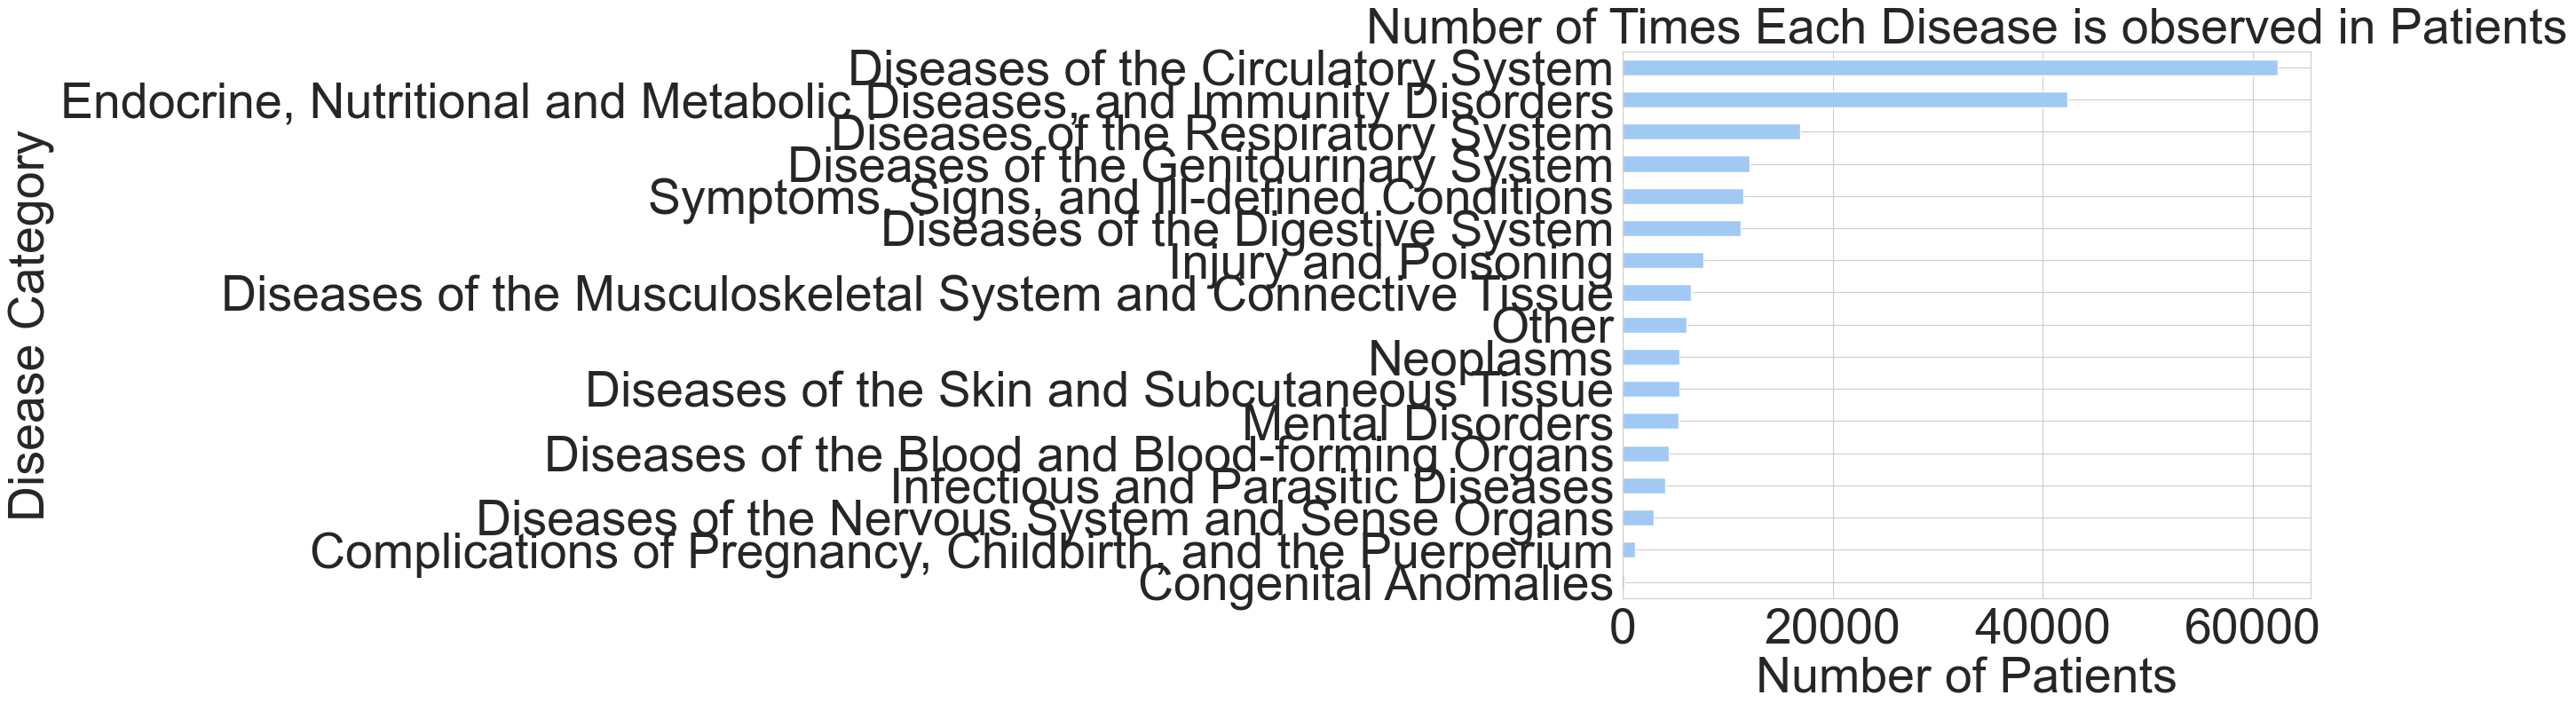

In [319]:
# Getting all the diseases
all_diags = pd.concat([df['category_diag_1'], df['category_diag_2'], df['category_diag_3']])

# Count the occurrences of each category
category_counts = all_diags.value_counts()

# Sorting values
category_counts =category_counts.sort_values()

# Bar Plot Specifications
plt.figure(figsize=(10, 8))
category_counts.plot(kind='barh')
plt.title('Number of Times Each Disease is observed in Patients')
plt.ylabel('Disease Category')
plt.xlabel('Number of Patients')
plt.tight_layout()

plt.show()

### 3.2.5 Create New Features

1/ **Frequency of a patient visiting** the hospital indicates how healthy that person is.

$$\text{visit_index} = \text{number_outpatient} + \text{number_emergency} + \text{number_inpatient}$$


In [320]:
# Assuming 'df' is your pandas DataFrame
df['visit_index'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']

# Display the first few rows of the DataFrame to verify the new column
df[['number_outpatient', 'number_emergency', 'number_inpatient', 'visit_index']].head()


number_outpatient  number_emergency  number_inpatient  visit_index
0                  0                 0                 0            0
1                  0                 0                 0            0
2                  2                 0                 1            3
3                  0                 0                 0            0
4                  0                 0                 0            0

Let's investigate why we see all zeros by displaying the distribution of the values

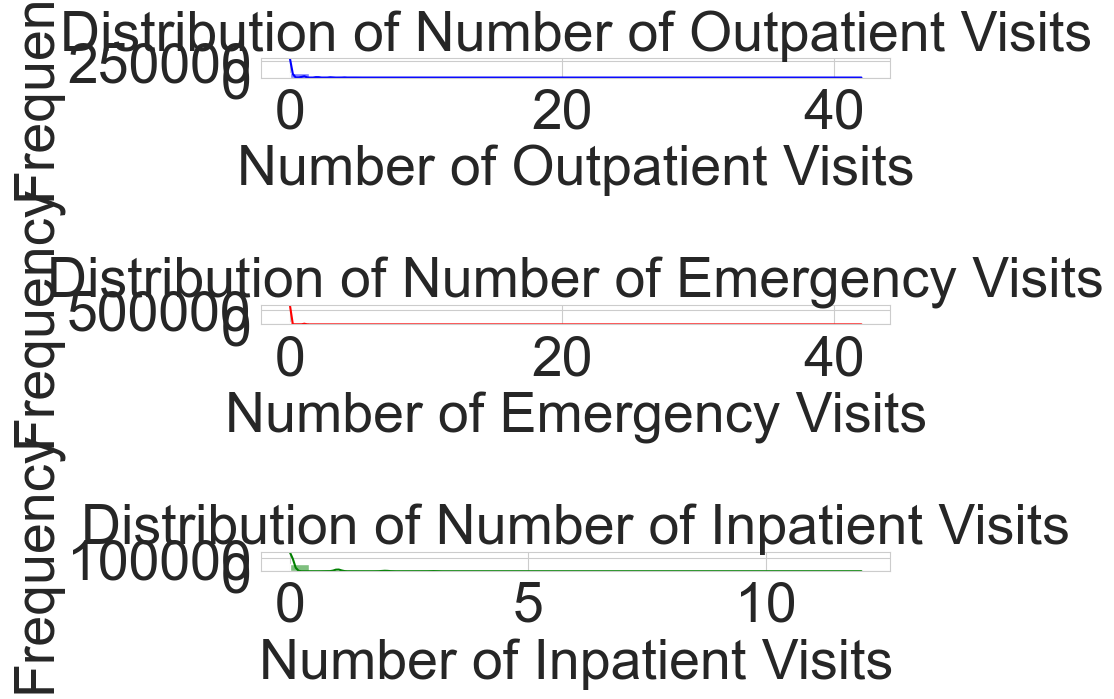

In [321]:
# distribution plots for the number of outpatient, emergency, and inpatient visits
fig, axs = plt.subplots(3, 1, figsize=(10, 8))

sns.histplot(df['number_outpatient'], kde=True, ax=axs[0], color='blue', bins=30)
axs[0].set_title('Distribution of Number of Outpatient Visits')
axs[0].set_xlabel('Number of Outpatient Visits')
axs[0].set_ylabel('Frequency')

sns.histplot(df['number_emergency'], kde=True, ax=axs[1], color='red', bins=30)
axs[1].set_title('Distribution of Number of Emergency Visits')
axs[1].set_xlabel('Number of Emergency Visits')
axs[1].set_ylabel('Frequency')

sns.histplot(df['number_inpatient'], kde=True, ax=axs[2], color='green', bins=30)
axs[2].set_title('Distribution of Number of Inpatient Visits')
axs[2].set_xlabel('Number of Inpatient Visits')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


Only few entries are different than zero, so the index is not so usefull, but let's keep it.

2/ **Complexity of disease** : can be represented by the sum of of unique diagnoses categories between the overall categories columns `category_diag_1`, `category_diag_2`, `category_diag_3`
$$ \text{complexity\_of\_disease} = \left| \text{Unique} \left\{ \text{category_diag_1}, \text{category_diag_2}, \text{category_diag_3} \right\} \right$$

In [322]:
df['complexity_of_disease'] = df[['category_diag_1', 'category_diag_2', 'category_diag_3']].apply(lambda x: len(set(x.dropna())), axis=1)

# Check
df[['category_diag_1', 'category_diag_2', 'category_diag_3', 'complexity_of_disease']].head()



category_diag_1  \
0  Endocrine, Nutritional and Metabolic Diseases,...   
1  Endocrine, Nutritional and Metabolic Diseases,...   
2  Complications of Pregnancy, Childbirth, and th...   
3                  Infectious and Parasitic Diseases   
4                                          Neoplasms   

                                     category_diag_2  \
0  Endocrine, Nutritional and Metabolic Diseases,...   
1  Endocrine, Nutritional and Metabolic Diseases,...   
2  Endocrine, Nutritional and Metabolic Diseases,...   
3  Endocrine, Nutritional and Metabolic Diseases,...   
4                                          Neoplasms   

                                     category_diag_3  complexity_of_disease  
0  Endocrine, Nutritional and Metabolic Diseases,...                      1  
1  Endocrine, Nutritional and Metabolic Diseases,...                      1  
2                                              Other                      3  
3                 Diseases of the Circulatory System                      3  
4  Endocrine, Nutritional and Metabolic Diseases,...                      2

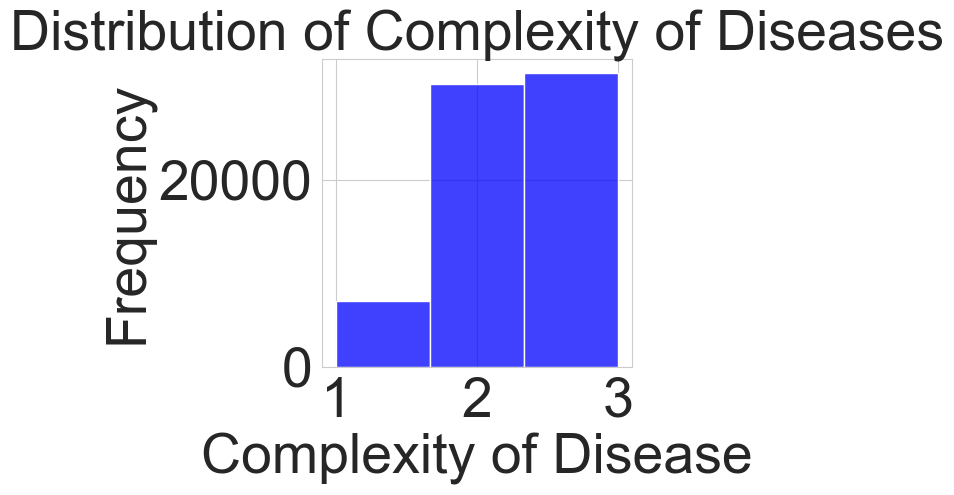

In [323]:
plt.figure(figsize=(4, 4))
sns.histplot(df['complexity_of_disease'], kde=False, bins=3, color='blue')
plt.title('Distribution of Complexity of Diseases')
plt.xlabel('Complexity of Disease')
plt.ylabel('Frequency')
plt.xticks([1, 2, 3])  # Assuming the complexity ranges from 1 to 3, adjust if different
plt.show()

3/ **Severity of disease**: the time in hospital, number of procedures, number of medications, number of lab procedures and number of diagnoses point on how severe the disease has been for a patient. More severe disease might influence the probability of a patient to be readmitted.

> $$
\text{severity_of_disease} = \frac{\text{time_hospital} + \text{#procedures} + \text{#medications} + \text{#lab_procedures} + \text{#diagnoses}}{\text{total_severity_values}}
$$


In [324]:
# Calculate the severity of disease score for each patient
df['severity_of_disease'] = (df['time_in_hospital'] +
                             df['num_procedures'] +
                             df['num_medications'] +
                             df['num_lab_procedures'] +
                             df['number_diagnoses'])

# Probabilistic interpretation: divide by the total sum of these values across the df
total_severity = df['severity_of_disease'].sum()
df['severity_of_disease'] = df['severity_of_disease'] / total_severity * 100000

# Check First Five Values
df['severity_of_disease'].head()

0    0.897156
1    1.814702
2    0.754427
3    1.427294
4    1.325344
Name: severity_of_disease, dtype: float64

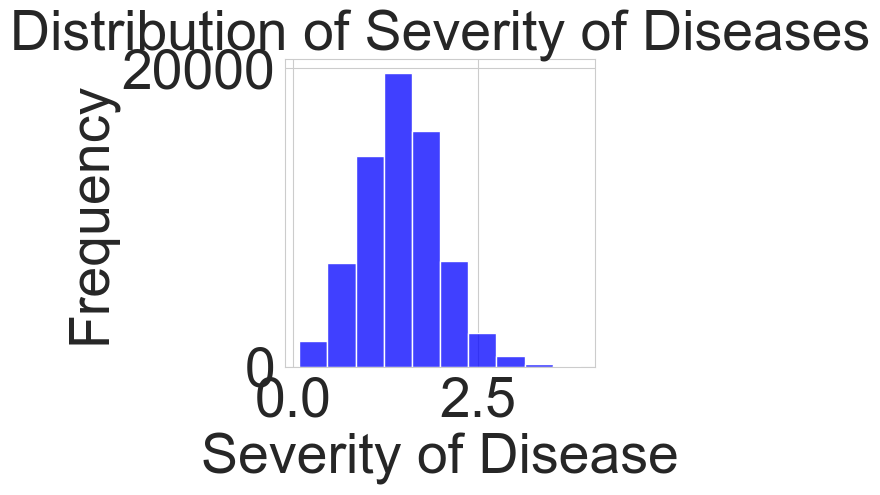

In [325]:
plt.figure(figsize=(4, 4))
sns.histplot(df['severity_of_disease'], kde=False, bins=10, color='blue')
plt.title('Distribution of Severity of Diseases')
plt.xlabel('Severity of Disease')
plt.ylabel('Frequency')
plt.show()

Great, we see that the severity of the diseases is normally distributed

In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68577 entries, 0 to 68591
Data columns (total 57 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   encounter_id                       68577 non-null  int64  
 1   patient_nbr                        68577 non-null  int64  
 2   race                               68577 non-null  object 
 3   gender                             68577 non-null  object 
 4   age                                68577 non-null  int64  
 5   admission_type_id                  68577 non-null  int64  
 6   discharge_disposition_id           68577 non-null  object 
 7   admission_source_id                68577 non-null  int64  
 8   time_in_hospital                   68577 non-null  int64  
 9   num_lab_procedures                 68577 non-null  int64  
 10  num_procedures                     68577 non-null  int64  
 11  num_medications                    68577 non-null  int64  


<p>&nbsp;</p>
<p>&nbsp;</p>

# 4.Data Exploration
<p>&nbsp;</p>



#### 4.1 General Readmission Breakdowns by Gender, Race and Age

Graph 1: The majority of the patients are not readmitted (>92.2%). Only  a minority, 7.8% of the patients need to be readmitted. In the model we might encounter the problem of class inbalances.

Graph 2 - `Readmission Status by Gender`: we observe a relatively equal distribution between male and female patients in both non-readmitted and readmitted category. This could imply that gender may not be a significant factor in readmission within 30 days.

Graph 3 - `Readmission Status by Race`: Caucasian patients have the highest count of non-readmission and admission, however this might reflect the underlying population demographics. African-American patients are the second most common in both categories, but they represent a higher percentage in the readmitted group (17.1% non-readmitted vs. 6.1% readmitted) compared to their proportion in the non-readmitted group.
Other races have remarkably lower counts, which indicates lower rate or readmission or a smaller representation in the patient population.

Graph 4 - `Readmission Status by Age`: age distribution of non-readmitted patients is fairly uniform across different age groups. For the readmitted patients, we observe a peak in the age group of 65, which might hint to a trend of older patients being more likely to be readmitted within 30 days.

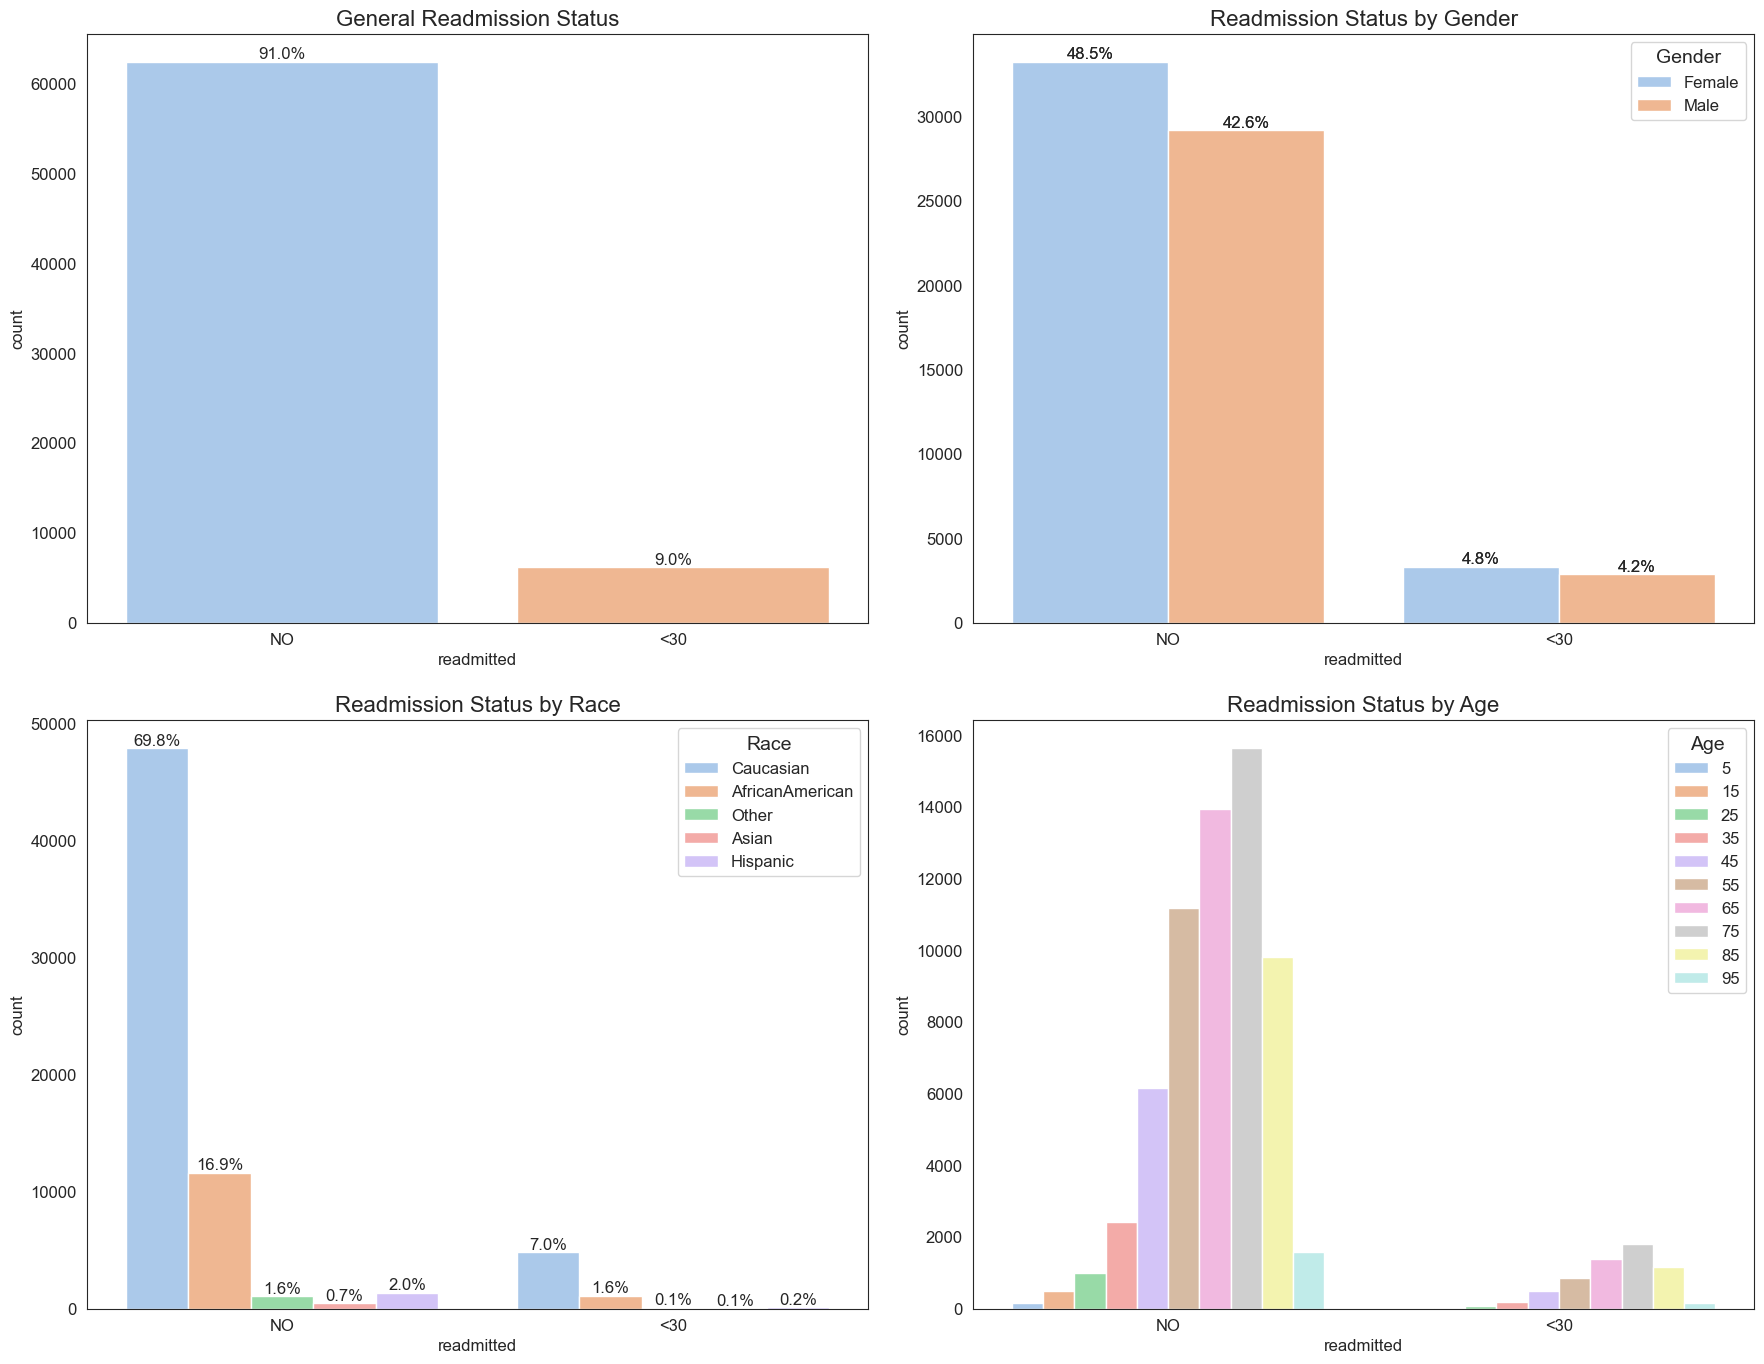

In [327]:
# Fixing Type
df['readmitted'] = df['readmitted'].astype(str)
df['gender'] = df['gender'].astype(str)
df['race'] = df['race'].astype(str)
df['age'] = df['age'].astype(str)

# Aesthetics
sns.set_palette(sns.color_palette("pastel"))
sns.set_style("white")
fig, axes = plt.subplots(2, 2, figsize=(18, 14), sharey=False)

# fontsizes
fontsize_legends = 12
fontsize_titles = 16
fontsize_annotations = 12
axes_tick_fontsize = 12
axes_label_fontsize = 12


# Helper function to add annotations
def add_percentage_annotations(ax, hue=None, font_size=fontsize_annotations): 
    total = len(df) if hue is None else df[hue].count()
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) if p.get_height() > 0 else ''
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=font_size)


        
# General Readmission Status
sns.countplot(x='readmitted', data=df, hue='readmitted', ax=axes[0, 0])
axes[0, 0].set_title('General Readmission Status', fontsize = fontsize_titles)
add_percentage_annotations(axes[0, 0], 'readmitted')

# Readmission Status by Gender
sns.countplot(x='readmitted', hue='gender', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Readmission Status by Gender',fontsize = fontsize_titles)
axes[0, 1].legend(title='Gender', fontsize = fontsize_legends)
add_percentage_annotations(axes[0, 1], 'gender')

# Readmission Status by Race
sns.countplot(x='readmitted', hue='race', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Readmission Status by Race', fontsize = fontsize_titles)
axes[1, 0].legend(title='Race', fontsize = fontsize_legends)
add_percentage_annotations(axes[1, 0], 'race')

# Readmission Status by Age
sns.countplot(x='readmitted', hue='age', data=df, palette='pastel', ax=axes[1, 1])
axes[1, 1].set_title('Readmission Status by Age', fontsize = fontsize_titles)
axes[1, 1].legend(loc='upper right', title = 'Age',fontsize = fontsize_legends)
add_percentage_annotations(axes[0, 1], 'age')

# Axis 
for ax in axes.flatten():
    ax.tick_params(axis='x', labelsize=axes_tick_fontsize)
    ax.tick_params(axis='y', labelsize=axes_tick_fontsize)

for row in axes:
    for ax in row:
        ax.set_xlabel(ax.get_xlabel(), fontsize=axes_label_fontsize)
        ax.set_ylabel(ax.get_ylabel(), fontsize=axes_label_fontsize)

# Adapt titles legens
legend_title_fontsize = 14
axes[0, 1].legend(title='Gender', title_fontsize=legend_title_fontsize, fontsize = fontsize_legends)
axes[1, 0].legend(title='Race', title_fontsize=legend_title_fontsize, fontsize = fontsize_legends)
axes[1, 1].legend(loc='upper right', title='Age', title_fontsize=legend_title_fontsize, fontsize = fontsize_legends)


# Layout adjustments
plt.tight_layout(pad=0.5)
plt.show()


*   Age Factor: Age seems to be an influential factor in readmissions,particularly the peak at 65 years old, which should be further investigated.

*   Race Consideration: Differences in readmission rates by race suggest that this feature might contribute to the prediction model, but it is central to consider the proportionality of the race distribution in the patient population.

*   Gender Analysis: Initial analysis suggests gender may not be a strong predictor of readmission within 30 days, but additional statistical tests are needed to confirm this.



### 4.2 Pair Plot

- **Distributions** for num_lab_procedures, num_procedures, and num_medications are spread out for both patients categories
- **Distribution** for num_medications and num_lab_procedures have a overlap between the two patients categories, probably meaning that these variables alone are not strong discriminator for readmission.
- **Pairwise Relationship**: Overall we do not observe clear linear relationship between the variables, which might suggest that linear methods might not be enough for modelling and more complex models might be needed
- For num_emergency and num_inpatient, there seem to be denser clusters at the lower end of the counts, with some outliers having higher counts. This could suggest that higher numbers in these variables are less common but might be significant when they occur, particularly for readmission.
- `number_diagnoses`shows a slightly higher density for readmitted patients at teh upper range of the count, suggesting a higher number of diagnoses might be associated with higher readmission rates
- we observe outliers in several variables for readmitted patients, such as `num_lab_procedures`, `num_procedures`. and `num_medications`. This might point at complex medical conditions.
- Regarding the data skewness and distribution shape we observe a positive skew for the variables `number_outpatient`, `number_emergency`, and `number_inpatient`, the positive skew is especially noticable for readmitted patients, with most data points clustered near zero and long tails towards higher values
- The histograms for readmitted patients seem to have fatter tails for number_outpatient, number_emergency, and number_inpatient, which could suggest that readmitted patients are more likely to have extreme values in these counts.

In [2]:


variables_of_interest = ['num_lab_procedures', 'num_procedures', 'num_medications',
                         'number_emergency', 'number_inpatient', 'number_diagnoses']

# Create a pair plot
sns.pairplot(df[variables_of_interest + ['readmitted']], hue='readmitted',
             palette='bright', diag_kind='kde',
             markers=["o", "s"])

plt.show()

NameError: name 'sns' is not defined

## 4.3 Time in Hospital Distribution and Breakdown by Age Group

Majority of hostpital stays are short (peak around 2 to 4 days), which then sharply decreases for longer stays.
There is a trend toward longer stays as age increases, suggesting that older patients tend to have longer hospital stay. Also the spread (interquartile range) of the time in hospital seems to increase with age, suggesting more variability in the length of stay among older patients.
For the time in hospital by age group we observe the presence of outliers, especially in older age groups. This might indicate that there may be a subset of patients with signidicantly different length in stays, that could be due to diverse factors, for example as more severe or multiple health conditions.

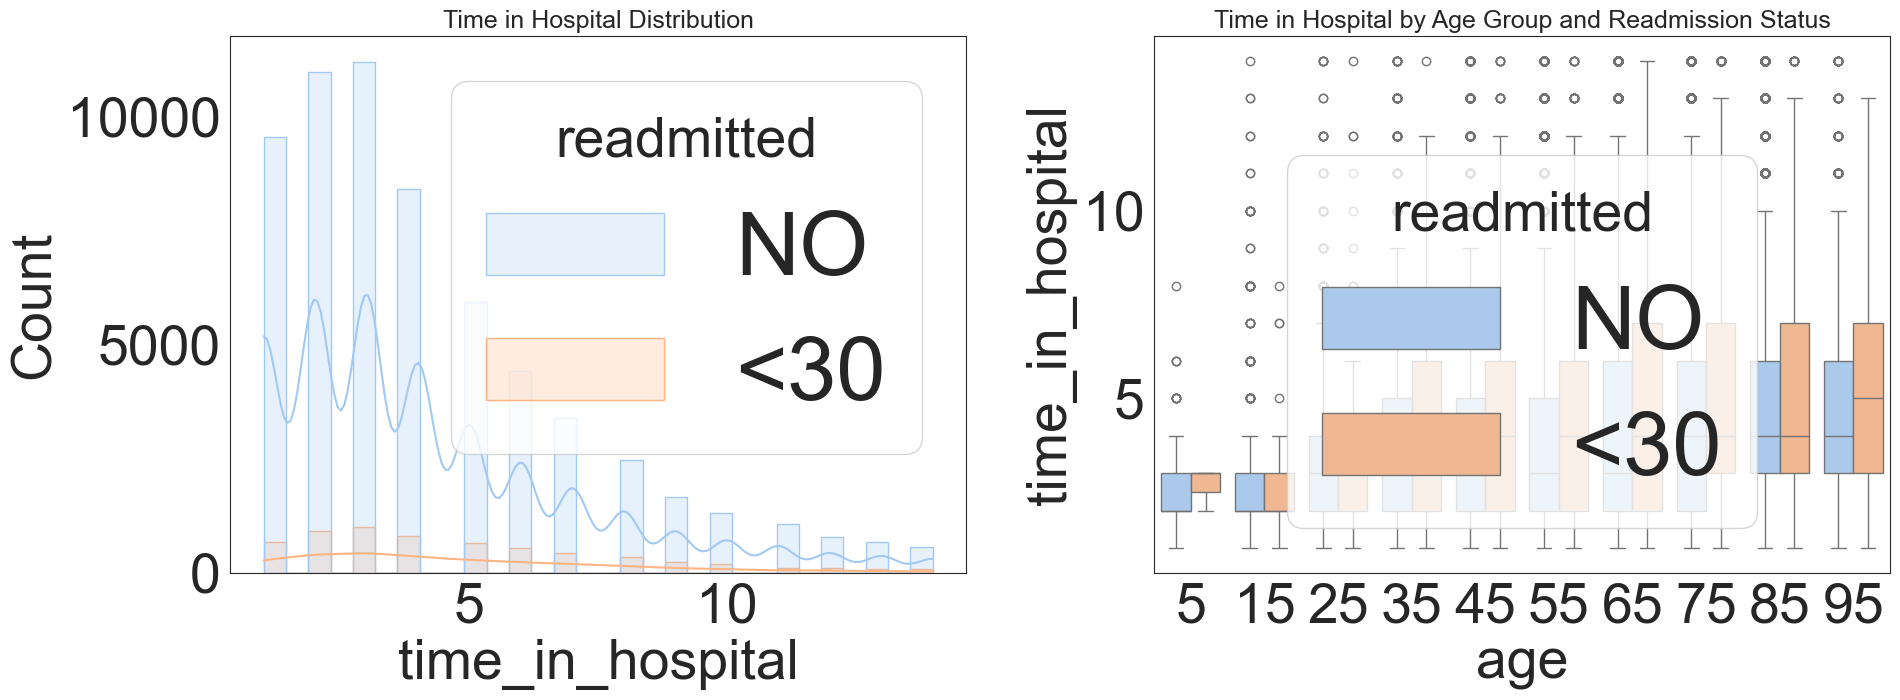

In [214]:
# Aesthetics
sns.set_palette(sns.color_palette("pastel"))
sns.set_style("white")

# Increase the overall figure size here
plt.figure(figsize=(20, 8))  # Adjust the width and height as needed

# Time Distribution
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='time_in_hospital', hue='readmitted', bins=30, kde=True, element="step")
plt.title('Time in Hospital Distribution', fontsize=18)

# Time by Age
plt.subplot(1, 2, 2)
ax2 = sns.boxplot(data=df, x='age', y='time_in_hospital', hue='readmitted')
plt.title('Time in Hospital by Age Group and Readmission Status', fontsize=18)
# Move the legend to the top left
#ax2.legend(title='readmitted', loc='upper left', fontsize= "8")

# Adjust plot margins and spacing, if necessary
plt.subplots_adjust(wspace=0.3, hspace=0.3)  

# Show
plt.tight_layout()
plt.show()


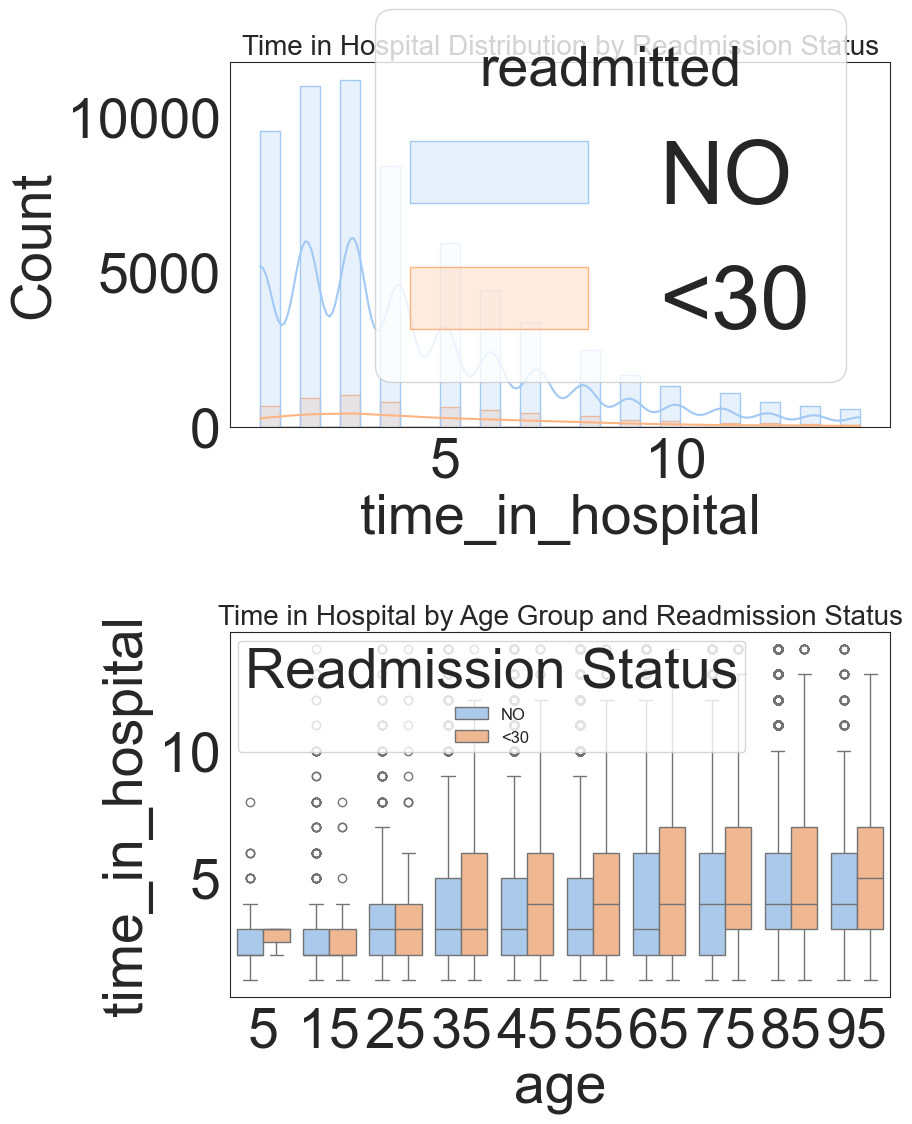

In [213]:
# Set aesthetic parameters
sns.set_palette(sns.color_palette("pastel"))
sns.set_style("white")

# Create a larger figure to accommodate the additional plots
plt.figure(figsize=(10, 12))

# First subplot for the distribution of time in hospital
plt.subplot(2, 1, 1)
ax1 = sns.histplot(data=df, x='time_in_hospital', hue='readmitted', bins=30, kde=True, element="step")
plt.title('Time in Hospital Distribution by Readmission Status', fontsize=20)
# Move the legend to the top right


# Second subplot for time in hospital by age group
plt.subplot(2, 1, 2)
ax2 = sns.boxplot(data=df, x='age', y='time_in_hospital', hue='readmitted')
plt.title('Time in Hospital by Age Group and Readmission Status', fontsize=20)
# Move the legend to the top left
ax2.legend(title='Readmission Status', loc='upper left', fontsize = 12)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

## 4.4 Frequency & Correlation Matrix for Contineous Variables

In [161]:
# Frequency of categories for categorical data
col_contineous = ['age', 'time_in_hospital', 'num_lab_procedures',  'num_medications', 
                  'number_outpatient', 'number_emergency', 'number_inpatient']
round(df[col_contineous].describe(), 1)

time_in_hospital  num_lab_procedures  num_medications  \
count           68577.0             68577.0          68577.0   
mean                4.3                42.9             15.7   
std                 2.9                19.9              8.3   
min                 1.0                 1.0              1.0   
25%                 2.0                31.0             10.0   
50%                 3.0                44.0             14.0   
75%                 6.0                57.0             20.0   
max                14.0               132.0             81.0   

       number_outpatient  number_emergency  number_inpatient  
count            68577.0           68577.0           68577.0  
mean                 0.3               0.1               0.2  
std                  1.1               0.5               0.6  
min                  0.0               0.0               0.0  
25%                  0.0               0.0               0.0  
50%                  0.0               0.0               0.0  
75%                  0.0               0.0               0.0  
max                 42.0              42.0              12.0

In [162]:
# setting matplotlib to old version in order to display all the values in the correlation matrix
!pip install matplotlib==3.7.3

  Using cached matplotlib-3.7.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (5.7 kB)
Using cached matplotlib-3.7.3-cp311-cp311-macosx_11_0_arm64.whl (7.3 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.8.4
    Uninstalling matplotlib-3.8.4:
      Successfully uninstalled matplotlib-3.8.4


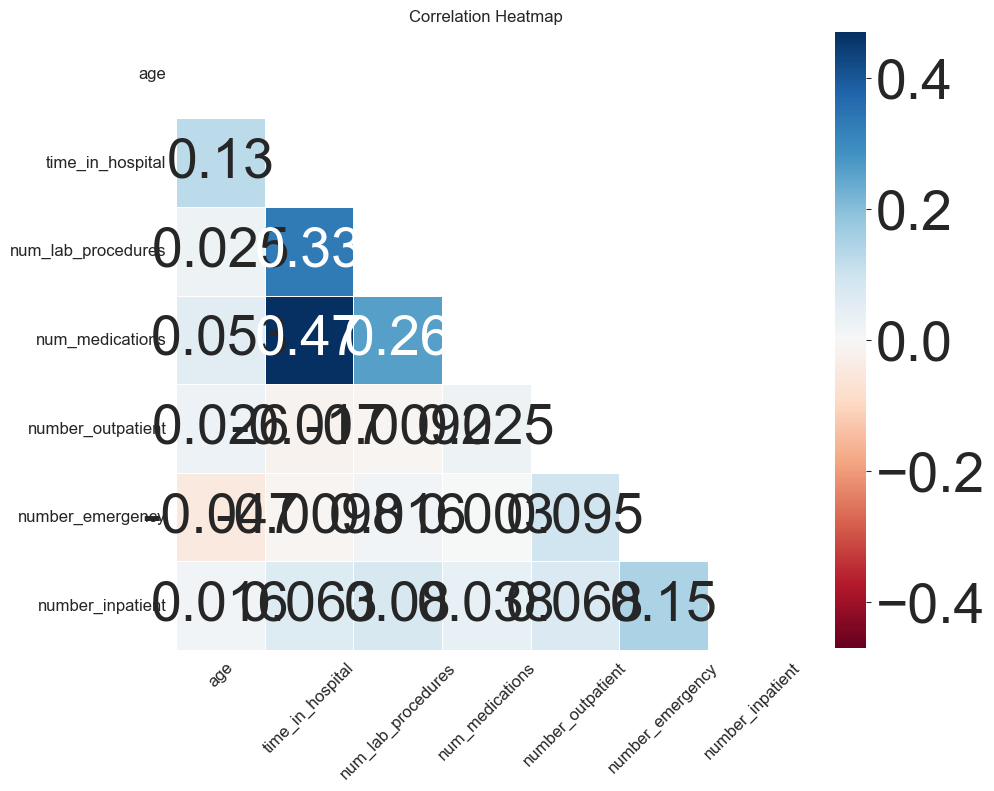

In [163]:
# Calculating the correlations
corr = df[col_contineous].corr()

# Create a mask to display only the lower triangle of the matrix
mask = np.triu(np.ones_like(corr, dtype=bool))

# Size
plt.figure(figsize=(10, 16))

# Setting the palette
cmap='RdBu'

# Draw the heatmap with the mask and correct aspect ratio
heatmap =sns.heatmap(corr, mask=mask, cmap=cmap, 
                    vmin= -0.47,
                    vmax=0.47, 
                    annot=True,
                    center=0,
                    square=True, linewidths=.5, 
                    cbar_kws={"shrink": .5}
                    )

heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize': 12})
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, fontdict = {'fontsize': 12})
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontdict = {'fontsize': 12})
plt.show()

- Slight positive correlation between number of medications and lab procedures. This suggests that patients who undergo more lab procedures tend to be on more medications, which could be indicative of more complex health issues.
- This suggests that patients who undergo more lab procedures tend to be on more medications, which could be indicative of more complex health issues.
- Age shows low positive correlations with time in the hospital (0.13) and a very low correlation with the number of lab procedures (0.025). The correlation is weak enough that it doesn't suggest a strong relationship with these variables.

Overall the heatmap doesn’t directly provide information on which factors are most predictive of readmission.

## 4.5 Discharge Reasons

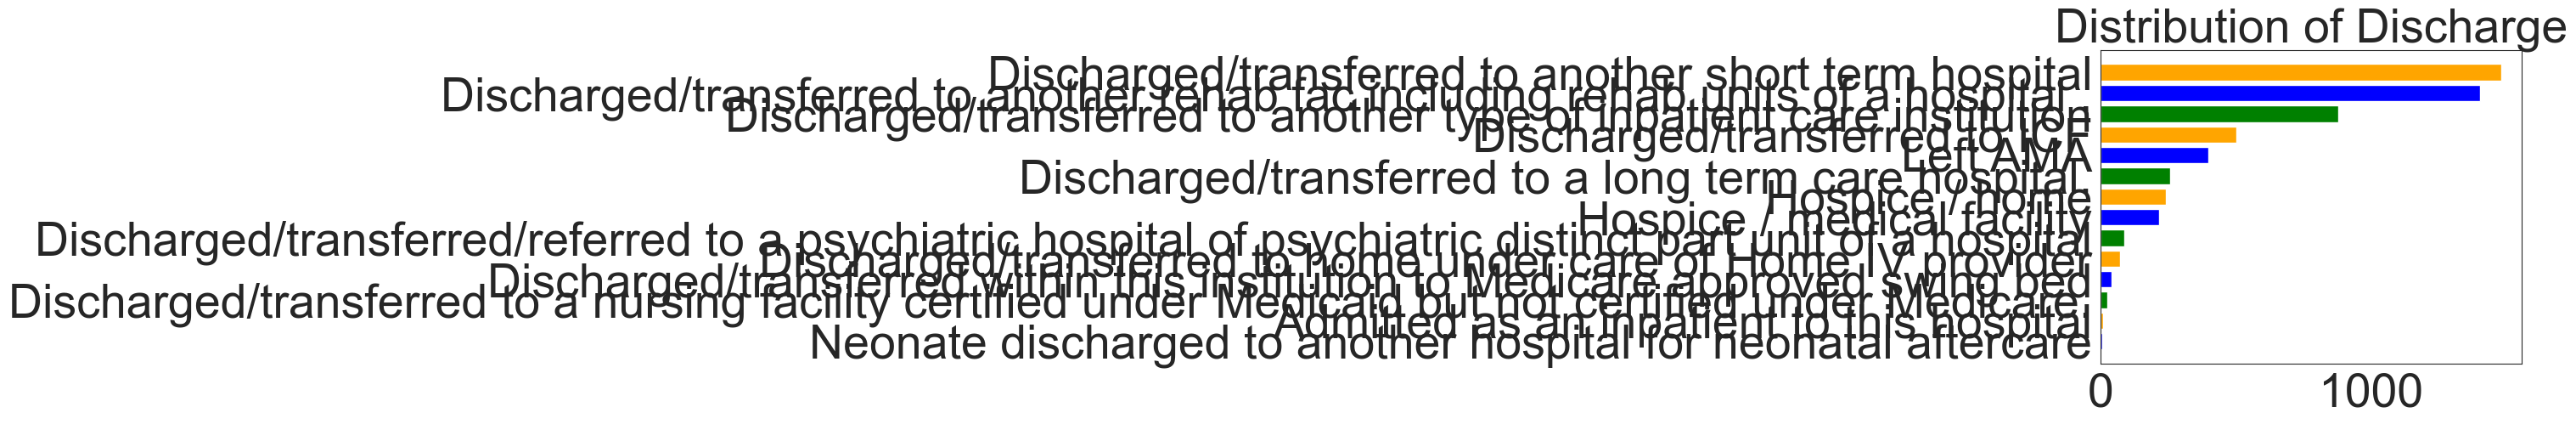

In [164]:
# Count the occurrences of each category in the 'origin' column
origin_counts = df['discharge_disposition_description'].value_counts()

origin_counts = origin_counts.sort_values()

origin_counts = origin_counts.head(14)

# Create the bar plot

plt.barh(origin_counts.index, origin_counts.values, color=['blue', 'orange', 'green'])
# Title
plt.title('Distribution of Discharge')
# Show Plot
plt.show()

## 4.6 Medical Spcialities & Readmissions

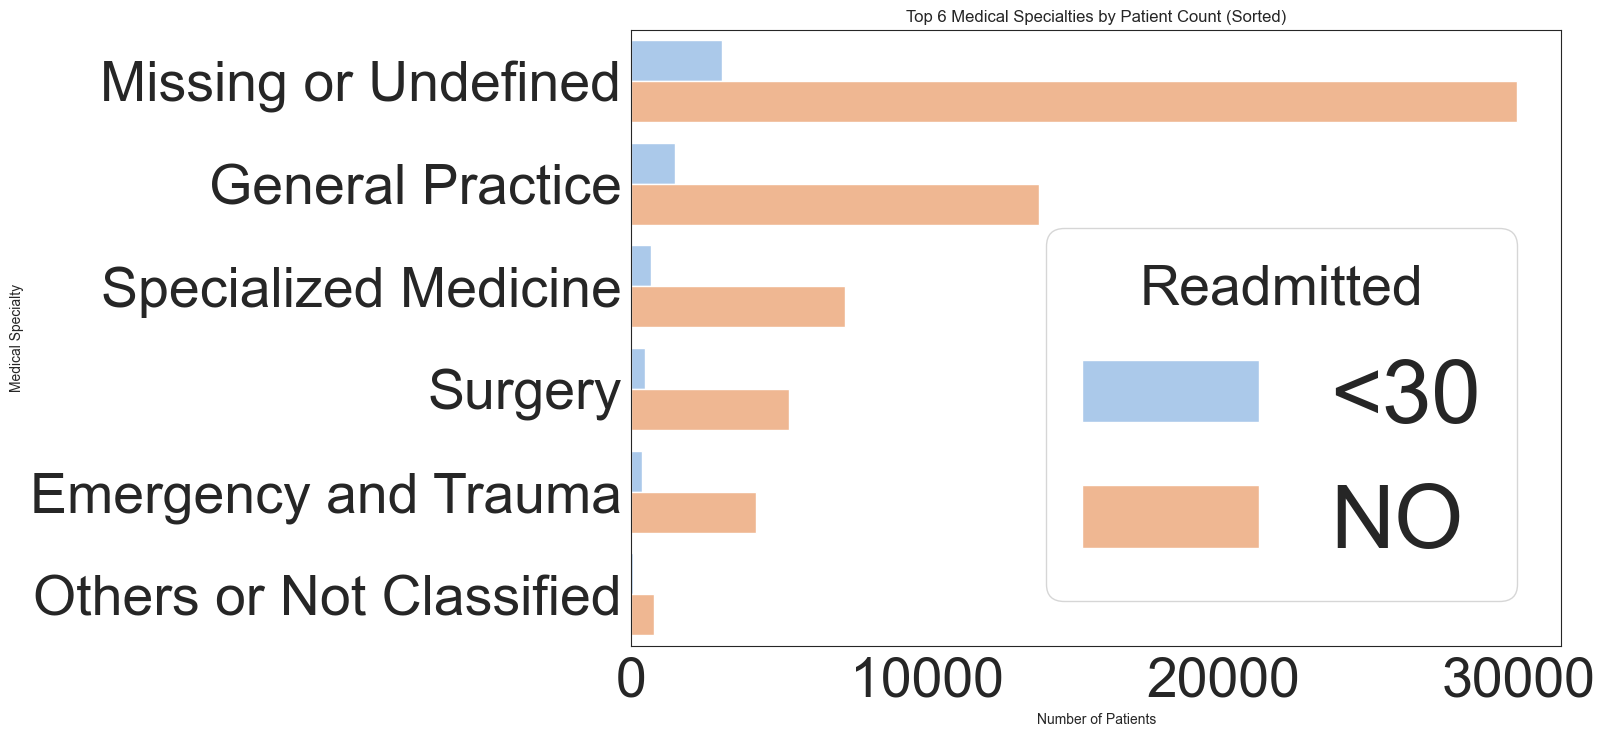

In [165]:
# Group by 'medical_specialty and readmissions to count numbers of patients
grouped_counts = df.groupby(['medical_specialty_grouped', 'readmitted']).size().reset_index(name='count')

# Total Counts for Sorting
total_counts = grouped_counts.groupby('medical_specialty_grouped')['count'].sum().reset_index(name='total_count')

# Merge 
grouped_counts = grouped_counts.merge(total_counts, on='medical_specialty_grouped')

# Sort in Descending Order
grouped_counts = grouped_counts.sort_values(by='total_count', ascending=False)

# Keep only top 6 categories
top_grouped_counts = grouped_counts[grouped_counts['medical_specialty_grouped'].isin(grouped_counts['medical_specialty_grouped'].unique()[:6])]

# Aesthetics
plt.figure(figsize=(12, 8))

# Horizontal Bar Plot 
sns.barplot(
    x='count',
    y='medical_specialty_grouped',
    hue='readmitted',
    data=top_grouped_counts,
    palette='pastel',
    order=grouped_counts['medical_specialty_grouped'].unique()[:6]
)

# Title and Labels
plt.title('Top 6 Medical Specialties by Patient Count (Sorted)', fontsize=12)
plt.xlabel('Number of Patients', fontsize=10)
plt.ylabel('Medical Specialty', fontsize=10)
plt.legend(title='Readmitted')

# Show
plt.show()


## 4.7 Summary Statistics

In [166]:
summary_statistics = round(df.describe(), 1)
summary_statistics.loc['isnull'] = df.isnull().sum()
summary_statistics

encounter_id  patient_nbr  admission_type_id  admission_source_id  \
count        68577.0      68577.0            68577.0              68577.0   
mean     156657282.6   55238331.3                2.1                  5.0   
std      100122160.7   39429131.8                1.5                  2.9   
min          12522.0        135.0                1.0                  1.0   
25%       81021936.0   23414841.0                1.0                  1.0   
50%      144582888.0   49039821.0                1.0                  7.0   
75%      214061970.0   87769215.0                3.0                  7.0   
max      443867222.0  189502619.0                8.0                  9.0   
isnull           0.0          0.0                0.0                  0.0   

        time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
count            68577.0             68577.0         68577.0          68577.0   
mean                 4.3                42.9             1.4             15.7   
std                  2.9                19.9             1.8              8.3   
min                  1.0                 1.0             0.0              1.0   
25%                  2.0                31.0             0.0             10.0   
50%                  3.0                44.0             1.0             14.0   
75%                  6.0                57.0             2.0             20.0   
max                 14.0               132.0             6.0             81.0   
isnull               0.0                 0.0             0.0              0.0   

        number_outpatient  number_emergency  number_inpatient  \
count             68577.0           68577.0           68577.0   
mean                  0.3               0.1               0.2   
std                   1.1               0.5               0.6   
min                   0.0               0.0               0.0   
25%                   0.0               0.0               0.0   
50%                   0.0               0.0               0.0   
75%                   0.0               0.0               0.0   
max                  42.0              42.0              12.0   
isnull                0.0               0.0               0.0   

        number_diagnoses  visit_index  complexity_of_disease  \
count            68577.0      68577.0                68577.0   
mean                 7.2          0.6                    2.4   
std                  2.0          1.4                    0.7   
min                  1.0          0.0                    1.0   
25%                  6.0          0.0                    2.0   
50%                  8.0          0.0                    2.0   
75%                  9.0          1.0                    3.0   
max                 16.0         49.0                    3.0   
isnull               0.0          0.0                    0.0   

        severity_of_disease  
count               68577.0  
mean                    1.5  
std                     0.5  
min                     0.1  
25%                     1.1  
50%                     1.4  
75%                     1.8  
max                     3.9  
isnull                  0.0

In [167]:
# Frequency of categories for categorical data
col_contineous = ['age', 'time_in_hospital', 'num_lab_procedures',  'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient']
round(df[col_contineous].describe(), 1)

time_in_hospital  num_lab_procedures  num_medications  \
count           68577.0             68577.0          68577.0   
mean                4.3                42.9             15.7   
std                 2.9                19.9              8.3   
min                 1.0                 1.0              1.0   
25%                 2.0                31.0             10.0   
50%                 3.0                44.0             14.0   
75%                 6.0                57.0             20.0   
max                14.0               132.0             81.0   

       number_outpatient  number_emergency  number_inpatient  
count            68577.0           68577.0           68577.0  
mean                 0.3               0.1               0.2  
std                  1.1               0.5               0.6  
min                  0.0               0.0               0.0  
25%                  0.0               0.0               0.0  
50%                  0.0               0.0               0.0  
75%                  0.0               0.0               0.0  
max                 42.0              42.0              12.0

In [168]:
summary_statistics.to_excel('summary_statistics.xlsx')

## 4.8 Variable Distribution

### 4.8.1 Variable Distribution for Contineous Variable

<Figure size 640x480 with 0 Axes>

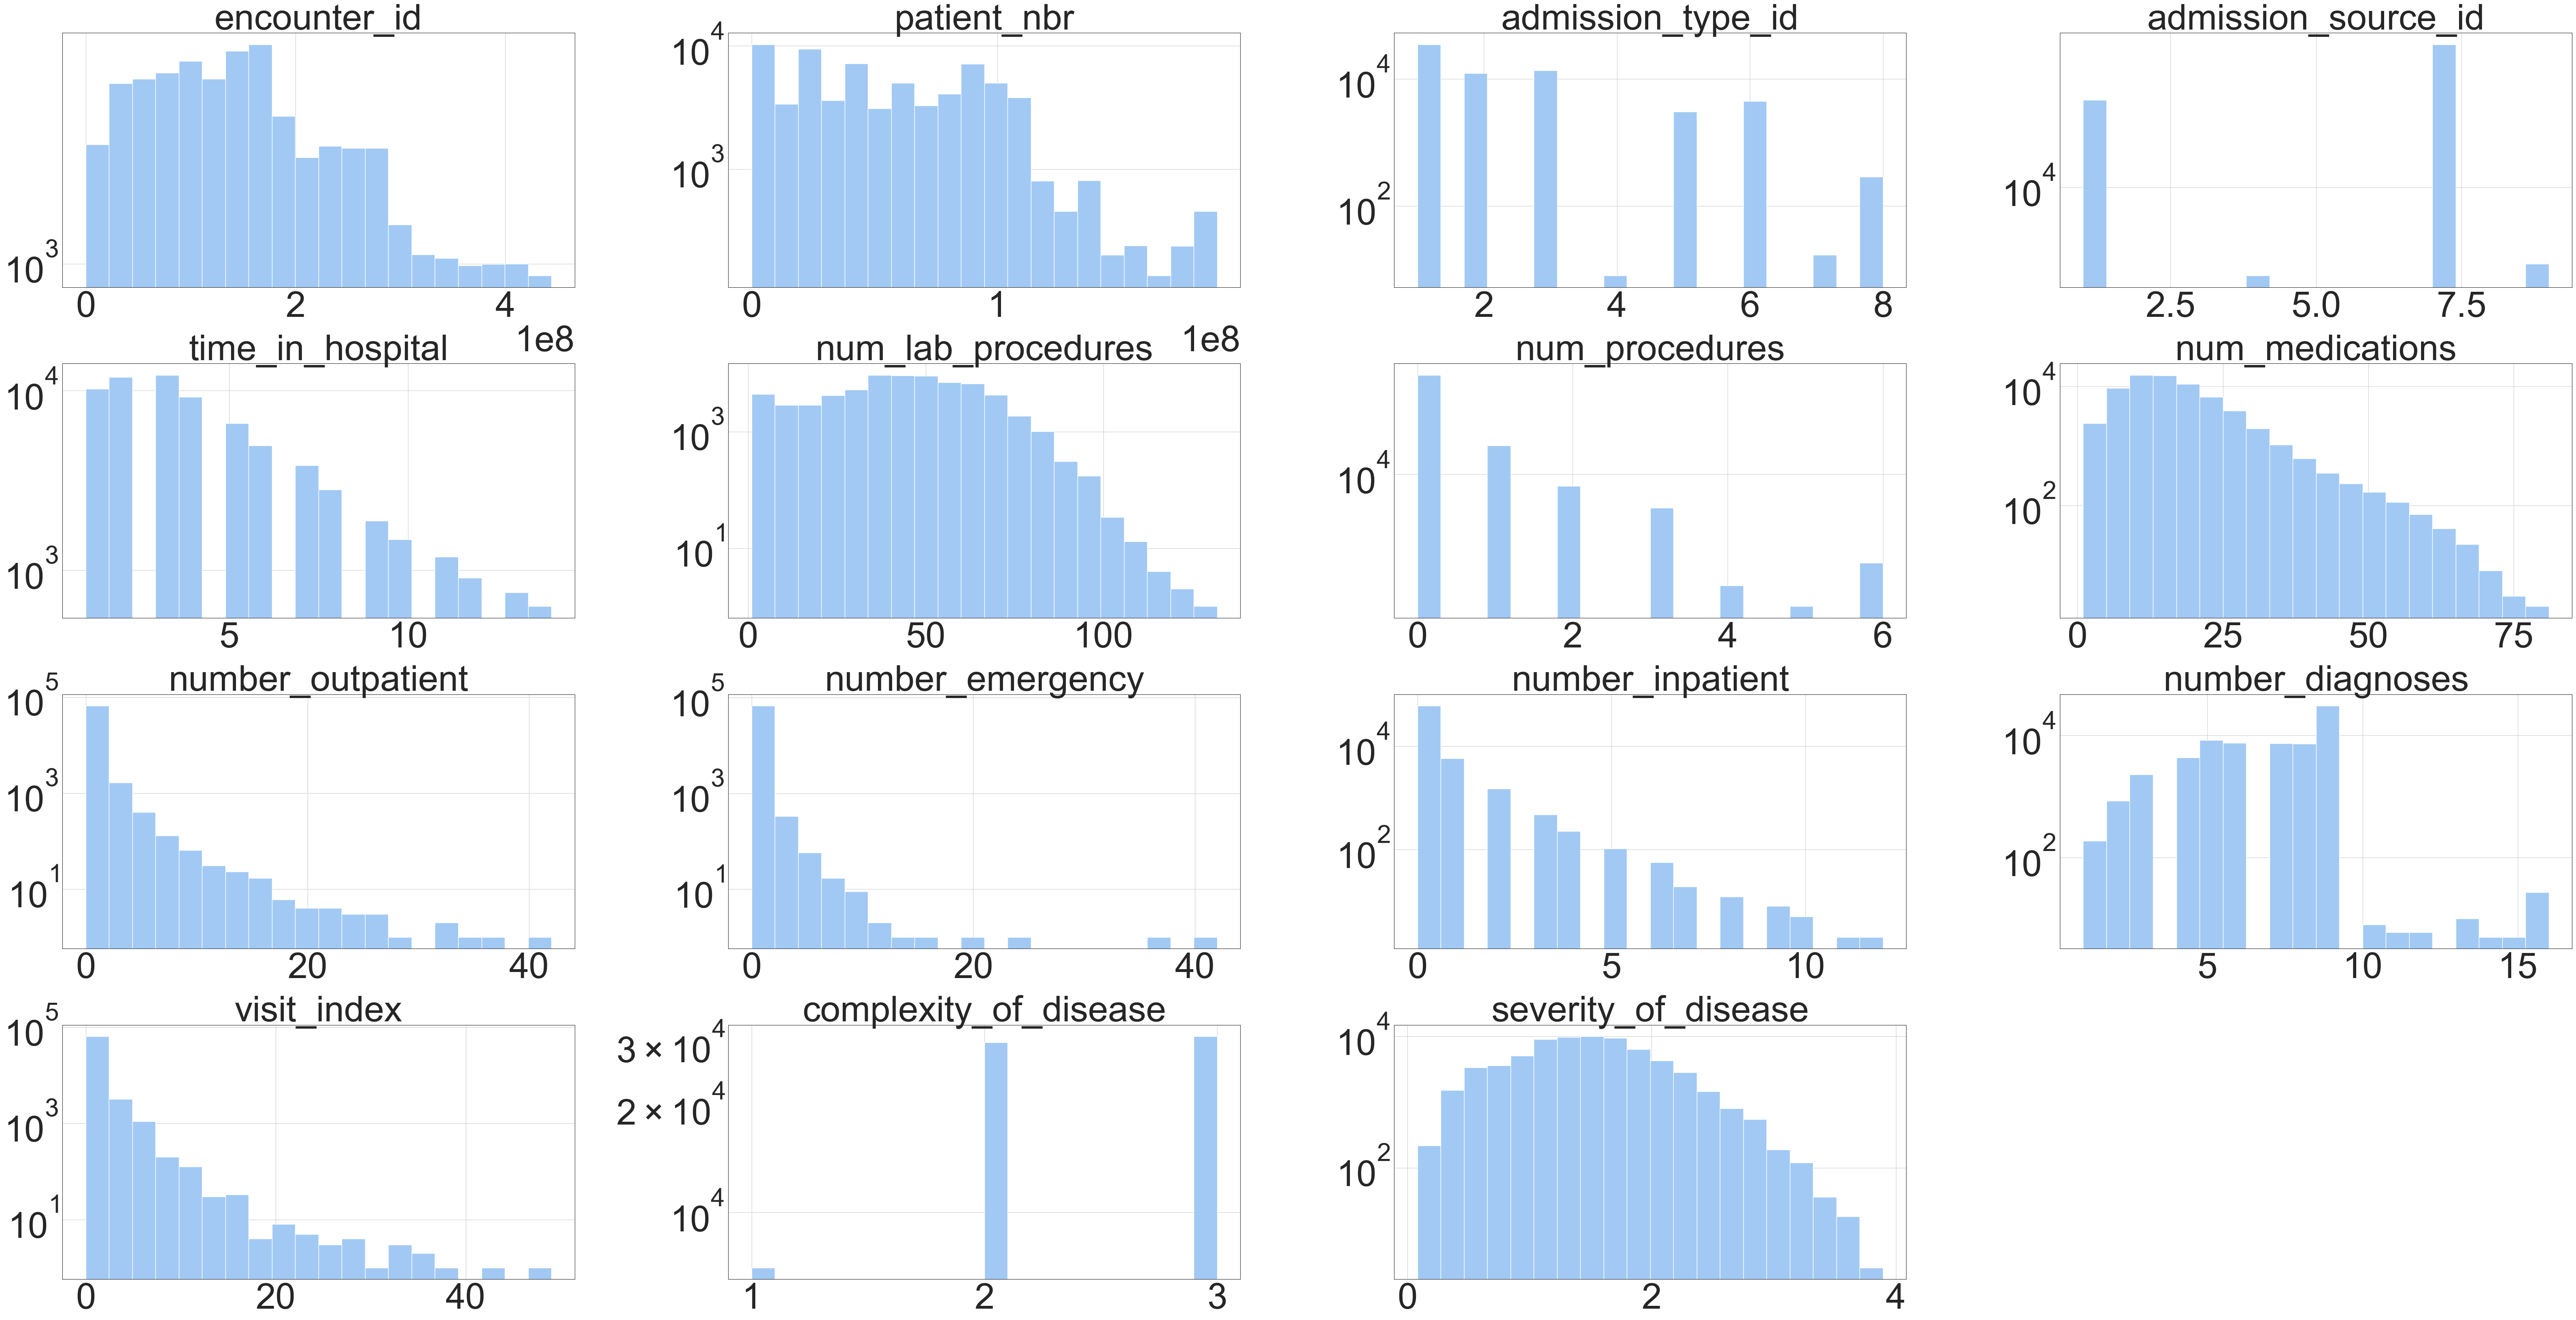

In [169]:
plt.rc('font', size=64)  
plt.rc('axes', labelsize=64, titlesize=64)
plt.rc('legend', fontsize=64)
plt.rc('xtick', labelsize=64) 
plt.rc('ytick', labelsize=64)

plt.tight_layout()
df.hist(bins=20, figsize=(80, 40), log=True)
plt.show()


### 4.8.2 Variable Distribution for Categorical Variables

/var/folders/vg/nl_vpfpd3f96h8h8tbd78lw40000gn/T/ipykernel_7032/3432334393.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(counts.index, ha='right')
/var/folders/vg/nl_vpfpd3f96h8h8tbd78lw40000gn/T/ipykernel_7032/3432334393.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(counts.index, ha='right')
/var/folders/vg/nl_vpfpd3f96h8h8tbd78lw40000gn/T/ipykernel_7032/3432334393.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(counts.index, ha='right')
/var/folders/vg/nl_vpfpd3f96h8h8tbd78lw40000gn/T/ipykernel_7032/3432334393.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabel

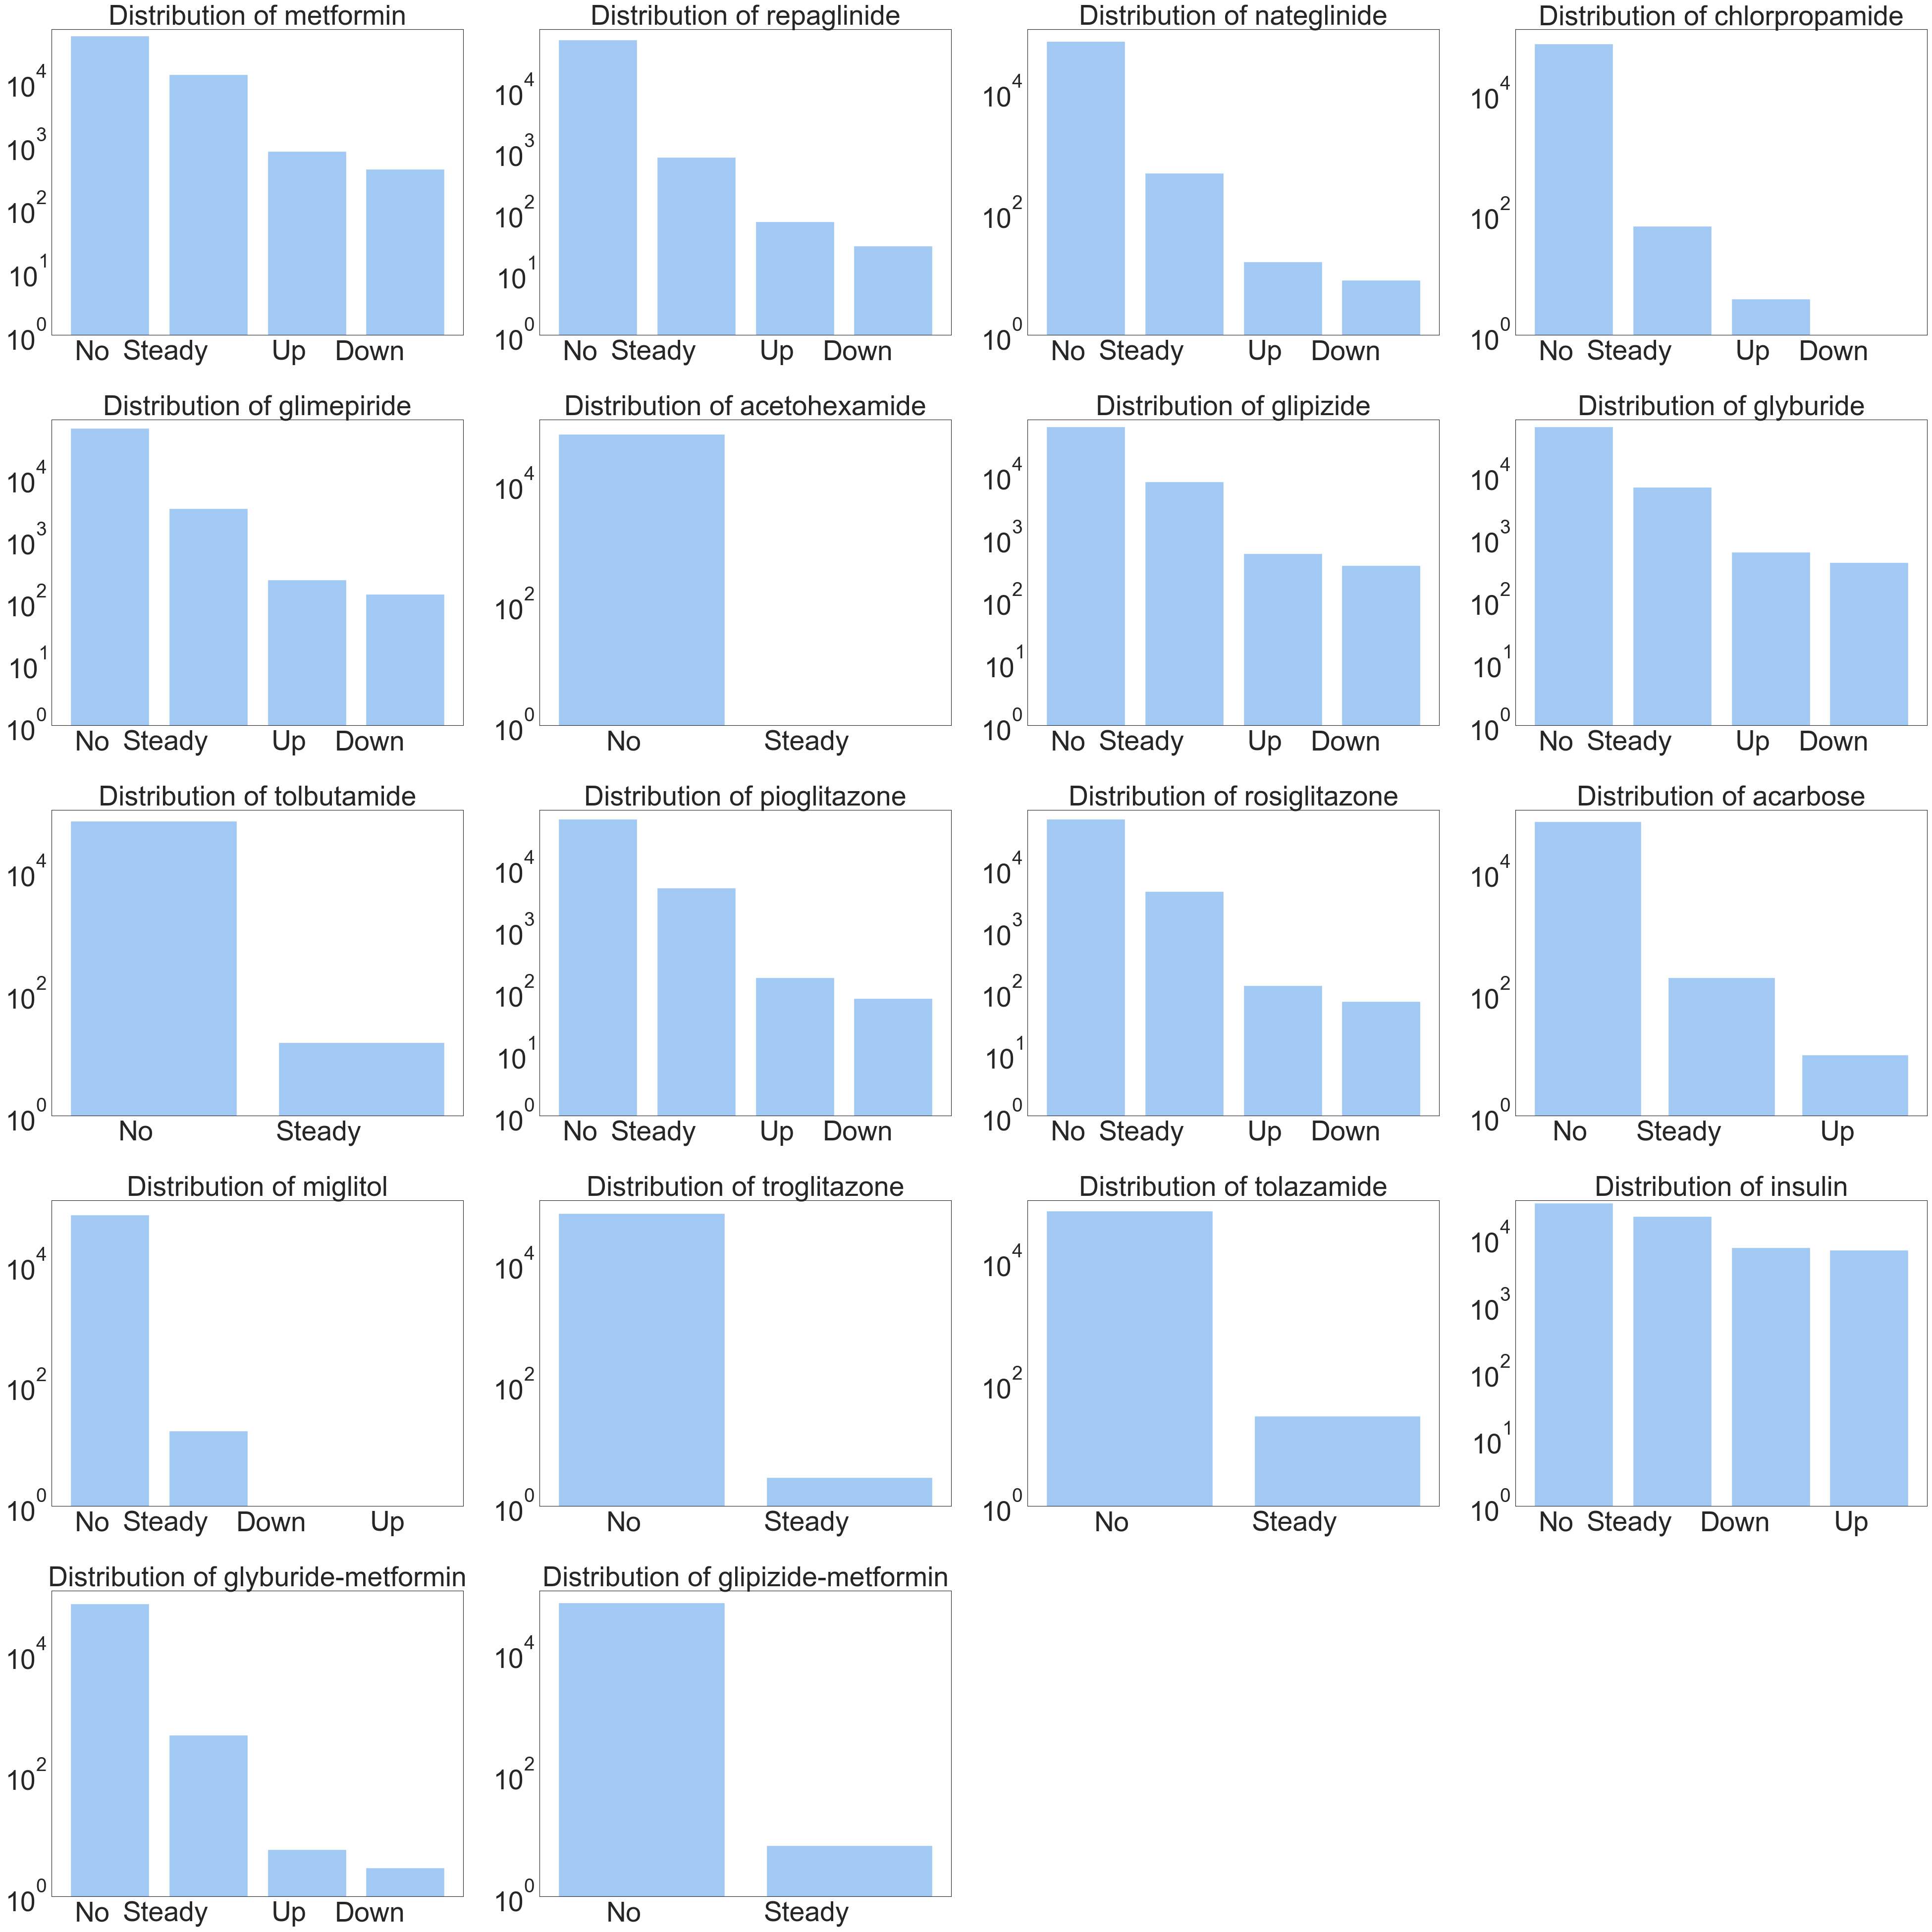

In [170]:
categorical_vars =["metformin", "repaglinide", "nateglinide", "chlorpropamide",
            "glimepiride", "acetohexamide", "glipizide", "glyburide",
            "tolbutamide", "pioglitazone", "rosiglitazone", "acarbose",
            "miglitol", "troglitazone", "tolazamide",  
            #"citoglipton",
            "insulin", "glyburide-metformin", "glipizide-metformin" #, 
            # "metformin-pioglitazone" ,
            #"examide", "citoglipton", "glimepiride-pioglitazone", "metformin-rosiglitazone"
            ]

# Set the plot size and style preferences
plt.rcParams.update({'font.size': 40, 'axes.titlesize': 40, 
                     'axes.labelsize': 40, 'xtick.labelsize': 40, 
                     'ytick.labelsize': 40})

# Assuming 'df' is your DataFrame and 'categorical_vars' is the list of your categorical columns.

# Calculate the number of rows needed for the subplots
n_rows = (len(categorical_vars) + 3) // 4

# Set up the matplotlib figure size dynamically based on the number of rows
fig, axes = plt.subplots(n_rows, 4, figsize=(40, n_rows*8))  # Adjust the height as necessary

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the variables and create bar plots
for ax, var in zip(axes, categorical_vars):
    counts = df[var].value_counts()
    ax.bar(counts.index, counts.values)
    ax.set_title(f'Distribution of {var}')
    ax.set_yscale('log')  # Use a logarithmic scale for the y-axis
    ax.set_xticklabels(counts.index, ha='right')  
    ax.set_ylim(bottom=1) 

# Turn off any extra subplots
for i in range(len(categorical_vars), len(axes)):
    axes[i].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


# Before Models
Saving the data cleaned in a csv file

In [7]:
df.to_csv('diabetis_clean.csv')

NameError: name 'df' is not defined

<p>&nbsp;</p>
<p>&nbsp;</p>

# 5.Models
<p>&nbsp;</p>

**Column To Predict**:
*  readmitted

#### Short: Data Preprocessing

In [124]:
# Reading the Cleaned DF (to avoid having to run the notebook everytime again)
df = pd.read_csv('diabetis_clean.csv')

In [125]:
len(df)

68577

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68577 entries, 0 to 68576
Data columns (total 51 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0.1                       68577 non-null  int64  
 1   Unnamed: 0                         68577 non-null  int64  
 2   race                               68577 non-null  object 
 3   gender                             68577 non-null  object 
 4   age                                68577 non-null  int64  
 5   time_in_hospital                   68577 non-null  int64  
 6   num_lab_procedures                 68577 non-null  int64  
 7   num_procedures                     68577 non-null  int64  
 8   num_medications                    68577 non-null  int64  
 9   number_outpatient                  68577 non-null  int64  
 10  number_emergency                   68577 non-null  int64  
 11  number_inpatient                   68577 non-null  int

In [127]:
# drop not needed columns: 
df = df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)

In [128]:
# Defining Columns to Hot-Encode
columns_to_encode = [
    'age','race', 'gender', 'max_glu_serum',
    'A1Cresult',
    "metformin",
    "repaglinide", 
    "nateglinide", 
    "chlorpropamide",
    "glimepiride",
    'acetohexamide',
    'glipizide',
    'glyburide',
    'tolbutamide',
    'pioglitazone',
    'rosiglitazone',
    'acarbose',
    "miglitol", 
    "troglitazone", 
    "tolazamide", 
    "examide", 
    "citoglipton",
    "insulin", 
    "glyburide-metformin", 
    "glipizide-metformin",
    "glimepiride-pioglitazone",
    "metformin-rosiglitazone",
    "metformin-pioglitazone" , 
    "change", 
    "diabetesMed", 
    'discharge_disposition_description', 
    'admission_type_description',
    'admission_source_description', 
    'medical_specialty_grouped',
    'category_diag_1', 
    'category_diag_2', 
    'category_diag_3'
]

# Applying one-hot encoding
df_encoded = pd.get_dummies(df, columns=columns_to_encode)


In [129]:
# Convert 'readmitted' to binary labels
df_encoded['readmitted'] = df_encoded['readmitted'].map({'<30': 1, 'NO': 0})


In [130]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68577 entries, 0 to 68576
Columns: 198 entries, time_in_hospital to category_diag_3_Symptoms, Signs, and Ill-defined Conditions
dtypes: bool(186), float64(1), int64(11)
memory usage: 18.4 MB


In [131]:
df.head()

race  gender  age  time_in_hospital  num_lab_procedures  \
0        Caucasian  Female    5                 1                  41   
1        Caucasian  Female   15                 3                  59   
2  AfricanAmerican  Female   25                 2                  11   
3        Caucasian    Male   35                 2                  44   
4        Caucasian    Male   45                 1                  51   

   num_procedures  num_medications  number_outpatient  number_emergency  \
0               0                1                  0                 0   
1               0               18                  0                 0   
2               5               13                  2                 0   
3               1               16                  0                 0   
4               0                8                  0                 0   

   number_inpatient  ...  discharge_disposition_description  \
0                 0  ...                            Missing   
1                 0  ...                 Discharged to home   
2                 1  ...                 Discharged to home   
3                 0  ...                 Discharged to home   
4                 0  ...                 Discharged to home   

  admission_type_description admission_source_description  \
0                    Missing           Physician Referral   
1                  Emergency               Emergency Room   
2                  Emergency               Emergency Room   
3                  Emergency               Emergency Room   
4                  Emergency               Emergency Room   

  medical_specialty_grouped  \
0                Pediatrics   
1      Missing or Undefined   
2      Missing or Undefined   
3      Missing or Undefined   
4      Missing or Undefined   

                                     category_diag_1  \
0  Endocrine, Nutritional and Metabolic Diseases,...   
1  Endocrine, Nutritional and Metabolic Diseases,...   
2  Complications of Pregnancy, Childbirth, and th...   
3                  Infectious and Parasitic Diseases   
4                                          Neoplasms   

                                     category_diag_2  \
0  Endocrine, Nutritional and Metabolic Diseases,...   
1  Endocrine, Nutritional and Metabolic Diseases,...   
2  Endocrine, Nutritional and Metabolic Diseases,...   
3  Endocrine, Nutritional and Metabolic Diseases,...   
4                                          Neoplasms   

                                     category_diag_3 visit_index  \
0  Endocrine, Nutritional and Metabolic Diseases,...           0   
1  Endocrine, Nutritional and Metabolic Diseases,...           0   
2                                              Other           3   
3                 Diseases of the Circulatory System           0   
4  Endocrine, Nutritional and Metabolic Diseases,...           0   

  complexity_of_disease severity_of_disease  
0                     1            0.897156  
1                     1            1.814702  
2                     3            0.754427  
3                     3            1.427294  
4                     2            1.325344  

[5 rows x 49 columns]

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68577 entries, 0 to 68576
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   race                               68577 non-null  object 
 1   gender                             68577 non-null  object 
 2   age                                68577 non-null  int64  
 3   time_in_hospital                   68577 non-null  int64  
 4   num_lab_procedures                 68577 non-null  int64  
 5   num_procedures                     68577 non-null  int64  
 6   num_medications                    68577 non-null  int64  
 7   number_outpatient                  68577 non-null  int64  
 8   number_emergency                   68577 non-null  int64  
 9   number_inpatient                   68577 non-null  int64  
 10  number_diagnoses                   68577 non-null  int64  
 11  max_glu_serum                      68577 non-null  obj

In [133]:
# Test Train Split
from sklearn.model_selection import train_test_split

X = df_encoded.drop('readmitted', axis=1)
y = df_encoded['readmitted']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [134]:
# Splitting the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [46]:
X_train.shape

(48003, 197)

## 5.1 Logistic Regression

In [101]:
from sklearn.linear_model import LogisticRegression

# Creating the logistic regression model
model = LogisticRegression(class_weight='balanced', max_iter=5000)


# Fitting the model to the training data
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=5000)

### 5.1.1 Evaluation  on Validation Set

In [105]:
# Predict the validation data
y_val_pred = model.predict(X_val)

# Calculate performance metrics on the validation set
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)

print("Validation Precision: {:.2%}".format(precision_val))
print("Validation Recall: {:.2%}".format(recall_val))
print("Validation F1 Score: {:.2%}".format(f1_val))


Validation Precision: 12.88%
Validation Recall: 49.76%
Validation F1 Score: 20.47%


### 5.1.2 Evaluation on Test Set

In [104]:
# Predicting the test data
y_pred = model.predict(X_test)

# Evaluating the model - vanilla
print("Precision: {:.2f}%".format(precision_score(y_test, y_pred, pos_label=1) * 100))
print("Recall: {:.2f}%".format(recall_score(y_test, y_pred, pos_label=1) * 100))
print("F1 Score for Readmission: {:.2f}%".format(f1_score(y_test, y_pred, pos_label=1) * 100))


Precision: 13.47%
Recall: 50.52%
F1 Score for Readmission: 21.27%



- Precision of 13% indicates that when the model predicts a patient will be readmitted, it is correct only about 12.31 % of the time. It reflects that there are a lot of false positives
- Recall of 50%, model identififies 58.52% of the actuall readmission, however the model is missing out on almost the half of them.
- F1 Score of 21.31%: such low number suggest that the model is not very effectice at predicting readmission accuratly, it is particularly weak at predicting positive class.

## 5.2 Logistic Regression

Logistic regression is sensitive to the sclae of the input features. Large differences in magnitude of features can cause the optimisation to take longer. Therefore as next step we will standardise them

### 5.2.1 LR with Feature Scaling and Class Weights

In [135]:
continuous_features = [
    'time_in_hospital', 'num_lab_procedures',
    'num_procedures', 'num_medications', 'number_outpatient',
    'number_emergency', 'number_inpatient', 'number_diagnoses',
    'severity_of_disease',
    'visit_index',
    'complexity_of_disease',
    'severity_of_disease'
]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train[continuous_features])

# Transform both training and test data
X_train[continuous_features] = scaler.transform(X_train[continuous_features])
X_test[continuous_features] = scaler.transform(X_test[continuous_features])

# Class weights, give more importance to the readmission cases
class_weights = {0: 1, 1: 10}  # where `1` is the minority class = readmissions
model1 = LogisticRegression(class_weight=class_weights, max_iter=5000, random_state=42)

# Fitting the model to the training data
model1.fit(X_train, y_train)

# Probabilities and Predictions
probabilities = model1.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
y_pred = (probabilities > 0.5) 

#### Evaluation on Validation Set

In [136]:
# Predict the validation data
y_val_pred = model1.predict(X_val)

# Calculate performance metrics on the validation set
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)

print("Validation Precision: {:.2%}".format(precision_val))
print("Validation Recall: {:.2%}".format(recall_val))
print("Validation F1 Score: {:.2%}".format(f1_val))

Validation Precision: 8.67%
Validation Recall: 99.76%
Validation F1 Score: 15.96%


In [137]:
# Evaluating the model with Feature Scaling
print("Precision: {:.2f}%".format(precision_score(y_test, y_pred, pos_label=1) * 100))
print("Recall: {:.2f}%".format(recall_score(y_test, y_pred, pos_label=1) * 100))
print("F1 Score for Non-Readmission: {:.2f}%".format(f1_score(y_test, y_pred, pos_label=1) * 100))

Precision: 13.43%
Recall: 51.18%
F1 Score for Non-Readmission: 21.27%


In this second model we adjusted the class weights, in favor of the readmission class (class `1`) by a factor of 10. This was to help the model to be more sensitive about the minority class. 

Model fitting this model has a max_iter of 5000 as the previous model. 

Comparaison Model 1 VS Model 2 - OVERALL nothing changes more than 0.5% in the metrics: 
- As expected, the precision is lower, as the model is more inclined to predict more positives. However this is such a small change. 
- Recall is lower compared to the first model, indicating that the trade-off between sensitivity to positive cases and avoiding false positives needs further refinement. 
- The lower F1 score for M2 suggests that the trade-off between precision and recall is  not optimised. 

In next model we should see where the decision threshold should be best put to ensure balance betweeen precision and recall. 

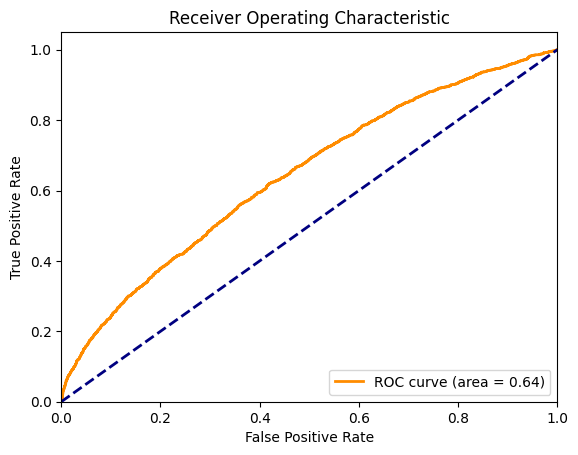

In [141]:
# Assuming `probabilities` are the probabilities of the positive class from your model
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
roc_auc = roc_auc_score(y_test, probabilities)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Overall with feature scaling we do not see an improvement in the predictions capabilities of the model. 
The Area Under the Curve (AUC) is 0.64, suggesting that the model has no discriminative ability ( the prediction power of the model is slight better than guessing).
The ROC curve follows the left-hand border and then the top border of the ROC space, the mode accurate the test. Since the curve for this model is very close to the diagonal, the model does not have a strong predictive power. 

In [142]:
# Get the model's coefficients, which are the feature importances
feature_importance = model1.coef_[0]

# Create a DataFrame for easier viewing
feature_names = X_train.columns
importances = pd.DataFrame(data={
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort DF
importances_model1 = importances.sort_values(by='Importance', ascending=False)

importances.head(10)


Feature  Importance
0       time_in_hospital    0.016107
1     num_lab_procedures    0.014669
2         num_procedures   -0.020692
3        num_medications    0.045973
4      number_outpatient   -0.062192
5       number_emergency    0.060994
6       number_inpatient    0.197314
7       number_diagnoses    0.067568
8            visit_index    0.057328
9  complexity_of_disease    0.052918

We observe that the threshold right now is not optimising for both precision and recall. Let's look for the threshold that gives the best f1 score for this model

Optimal threshold: 0.6106
Maximal F1 score: 0.2236


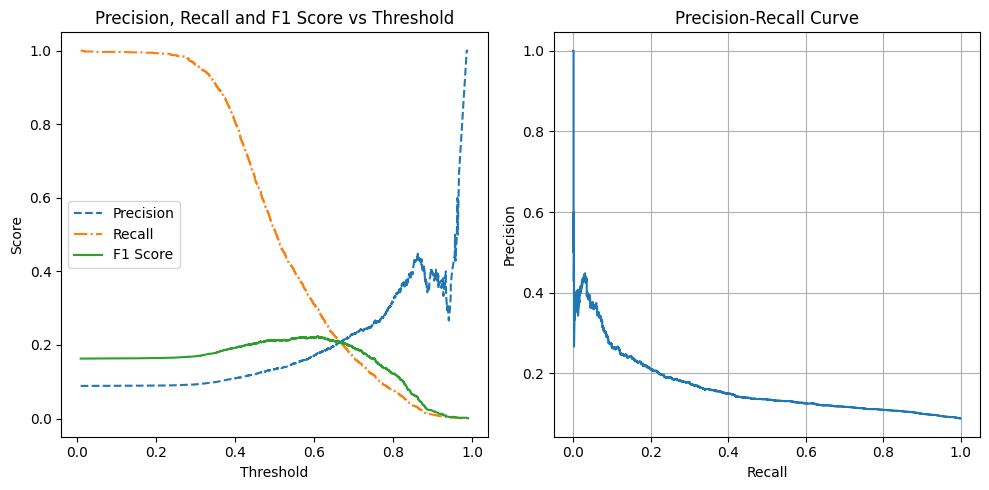

In [148]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, f1_score

# Assuming X_test and y_test are your features and labels for testing
y_scores = model1.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Calculate F1 scores for each threshold
f1_scores = 2*(precision * recall) / (precision + recall)

# Find the threshold where F1 score is maximized
optimal_idx = np.nanargmax(f1_scores)  # np.nanargmax to handle any NaN values due to division by zero
optimal_threshold = thresholds[optimal_idx]
optimal_f1 = f1_scores[optimal_idx]

print(f"Optimal threshold: {optimal_threshold:.4f}")
print(f"Maximal F1 score: {optimal_f1:.4f}")

# Plotting
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(thresholds, precision[:-1], label="Precision", linestyle='--')
plt.plot(thresholds, recall[:-1], label="Recall", linestyle='-.')
plt.plot(thresholds, f1_scores[:-1], label="F1 Score", linestyle='-')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision, Recall and F1 Score vs Threshold")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)

plt.tight_layout()
plt.show()



#### 5.2.2 Logistic Regression Feature Scaling, Adapted Threshold

In [149]:
# Transform both training and test data
X_train[continuous_features] = scaler.transform(X_train[continuous_features])
X_test[continuous_features] = scaler.transform(X_test[continuous_features])

# Class weights, give more importance to the readmission cases
class_weights = {0: 1, 1: 10}  # where `1` is the minority class = readmissions
model3 = LogisticRegression(class_weight=class_weights, max_iter=5000)

# Fitting the model to the training data
model3.fit(X_train, y_train)

# Probabilities and Predictions
probabilities = model3.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
y_pred = (probabilities > optimal_threshold) # changing the threshold to optimal

#### Evaluation on Validation Set

In [150]:
# Predict the validation data
y_val_pred = model3.predict(X_val)

# Calculate performance metrics on the validation set
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)

print("Validation Precision: {:.2%}".format(precision_val))
print("Validation Recall: {:.2%}".format(recall_val))
print("Validation F1 Score: {:.2%}".format(f1_val))

Validation Precision: 8.58%
Validation Recall: 100.00%
Validation F1 Score: 15.81%


In [152]:
# Evaluating the model with Feature Scaling
print("Precision: {:.2f}%".format(precision_score(y_test, y_pred, pos_label=1) * 100))
print("Recall: {:.2f}%".format(recall_score(y_test, y_pred, pos_label=1) * 100))
print("F1 Score for Readmission: {:.2f}%".format(f1_score(y_test, y_pred, pos_label=1) * 100))

Precision: 17.85%
Recall: 29.48%
F1 Score for Readmission: 22.24%


Compared to the model before: 
- precision increased by 4 %, so now the model is better at predicting who will be readmitted
- recall decrease almost  by half, meaning that the increase in precision came through more patients been marked as "readmitted" even though they did not need to be readmitted in  hospital 
- F1 score slightly increased 

## 5.3 Logistic Regression with SMOTE
SMOTE (Synthetic Minority Over-sampling Technique) combined with logistic regression using balanced class weights and a slightly adjusted decision threshold


In [153]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialise the mode
modelSMOTE = LogisticRegression(class_weight='balanced', max_iter=5000)

# Fit the model
modelSMOTE.fit(X_train_smote, y_train_smote)

# Probabilities and Predictions
probabilities = modelSMOTE.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
y_pred = (probabilities > optimal_threshold)

In [154]:
# Make predictions on the validation set
y_val_pred = model1.predict(X_val)

# Calculate accuracy for the validation set
accuracy_val = accuracy_score(y_val, y_val_pred) * 100

# Print accuracy
print(f"Accuracy on the validation set: {accuracy_val:.2f}%")

# Get a classification report for the validation set
report_val = classification_report(y_val, y_val_pred, output_dict=True)

# Print the classification report as a formatted string
print(f"{'Class':<10}{'Precision':>10}{'Recall':>10}{'F1-Score':>10}{'Support':>10}")
for key, value in report_val.items():
    if key.isdigit() or key == "macro avg" or key == "weighted avg":
        print(f"{key:<10}{value['precision'] * 100:>10.2f}%{value['recall'] * 100:>10.2f}%{value['f1-score'] * 100:>10.2f}%{value['support']:>10}")

Accuracy on the validation set: 9.84%
Class      Precision    Recall  F1-Score   Support
0              98.40%      1.40%      2.76%    8777.0
1               8.67%     99.76%     15.96%     824.0
macro avg      53.54%     50.58%      9.36%    9601.0
weighted avg     90.70%      9.84%      3.90%    9601.0


In [155]:
print('Logisitc Regression with SMOTE - Evaluation on Test Set')

# Accuracy
print(f"Accuracy on Test Set: {accuracy_score(y_test, y_pred) * 100:.2f}%")

# Classification Report
report = classification_report(y_test, y_pred, output_dict=True)

# Print the classification report as a formatted string
print(f"{'Class':<10}{'Precision':>10}{'Recall':>10}{'F1-Score':>10}{'Support':>10}")
for key, value in report.items():
    if key.isdigit() or key == "macro avg" or key == "weighted avg":
        print(f"{key:<10}{value['precision'] * 100:>10.2f}%{value['recall'] * 100:>10.2f}%{value['f1-score'] * 100:>10.2f}%{value['support']:>10}")


Logisitc Regression with SMOTE - Evaluation on Test Set
Accuracy on Test Set: 91.12%
Class      Precision    Recall  F1-Score   Support
0              91.14%     99.97%     95.35%   18749.0
1              37.50%      0.16%      0.33%    1825.0
macro avg      64.32%     50.07%     47.84%   20574.0
weighted avg     86.38%     91.12%     86.92%   20574.0


We do not take into consideration accuracy because in this context of an imbalanced medical dataset it can be misleading as a figure. 

The model performs very differently for the two classes.

For class 0 = not-readmitted: 
- performance is high across all the metrics (above 91% for all of them)


For Class 1 = readmitted: 
- precision is really arounde 37% but recall is terrible (0.11%), F1 Score super low. -> no prediction capability for class one

Compared to the previous model ( we compare only for call 1 = readmitted):
- precision is almost 2 times higher than before (previous model had a precision of 17%): meaning -> more people are classified to be readmitted
- recall is super low: meaning that we are missing on patients who really requires readmission 
- F1 Score: almost zero , indicating that this model does not have any prediction capability 



Conclusions: 
Use of SMOTE doesn't seem to have drastically improved the model's ability to predict readmissions. A reason for it could be that SMOTE has created more samples for the minority class but these have introduced noise or these were not representative for the true underlying distribution. 


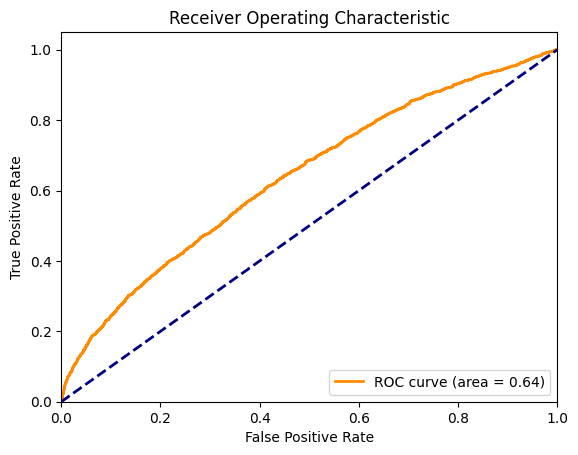

In [156]:
# Compute ROC curve data points
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

# Calculate the AUC
roc_auc = roc_auc_score(y_test, probabilities)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [157]:
# Get the model's coefficients, which are the feature importances
feature_importance = modelSMOTE.coef_[0]

# Create a DataFrame for easier viewing
feature_names = X_train.columns
importances = pd.DataFrame(data={
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort DF
importances_SMOTE = importances.sort_values(by='Importance', ascending=False)

importances_SMOTE.head(10)

Feature  Importance
1                                   num_lab_procedures    5.889141
139  medical_specialty_grouped_Oncology and Hematology    3.838675
119  discharge_disposition_description_Discharged/t...    3.606422
26                                       gender_Female    3.418544
27                                         gender_Male    3.401963
18                                              age_75    3.372973
118  discharge_disposition_description_Discharged/t...    3.319698
17                                              age_65    3.298417
19                                              age_85    3.272797
113  discharge_disposition_description_Discharged/t...    3.223261

We observe that the feature importance drastically changed compared to model1 feature importance. 
This might mainly influenced either by the scaling of the features or my the SMOTING. 

## 5.4 Random Forest with Scaled and Threshold

Selecting an appropriate threshold for predicting patient readmissions is a critical step in model performance tuning, especially in a hospital setting where the stakes are particularly high. A high recall is vital because the consequences of failing to predict a readmission can be severe, both in terms of patient health outcomes and the associated healthcare costs. However, we must also consider the cost implications of false positives. While we aim to prevent readmissions, we do not want to place an undue burden on the healthcare system by subjecting a large number of patients to unnecessary monitoring or interventions. Thus, the threshold must be carefully chosen to maintain a high recall, ensuring that most readmitted patients are identified while keeping precision at a level that avoids excessive false alarms. This balance minimizes both the risk to patients and the unnecessary use of hospital resources.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_

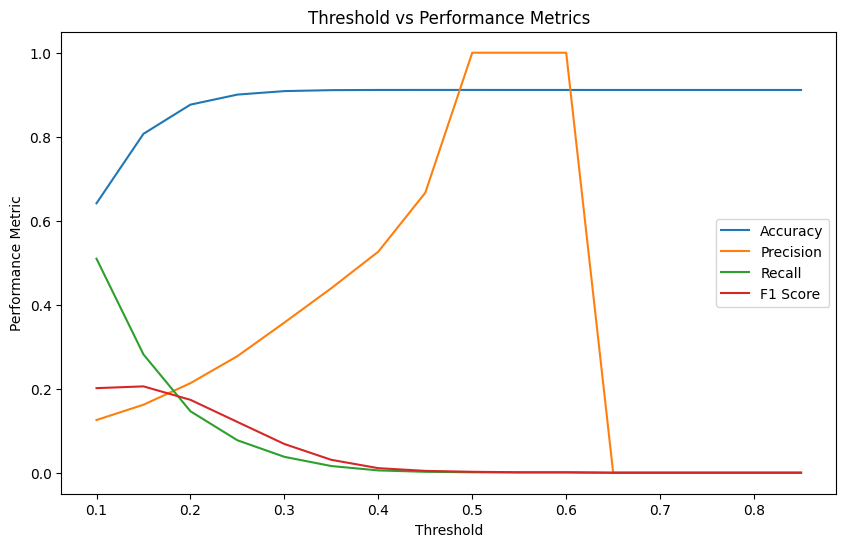

In [158]:
# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Probabilities for the positive class
probabilities_rf = rf_model.predict_proba(X_test)[:, 1]

# Initialize lists to store metrics
thresholds = np.arange(0.1, 0.9, 0.05)
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# Calculate metrics for each threshold
for threshold in thresholds:
    y_pred_rf = (probabilities_rf > threshold)
    accuracy_list.append(accuracy_score(y_test, y_pred_rf))
    precision_list.append(precision_score(y_test, y_pred_rf))
    recall_list.append(recall_score(y_test, y_pred_rf))
    f1_list.append(f1_score(y_test, y_pred_rf))

# Plotting the metrics
plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracy_list, label='Accuracy')
plt.plot(thresholds, precision_list, label='Precision')
plt.plot(thresholds, recall_list, label='Recall')
plt.plot(thresholds, f1_list, label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('Performance Metric')
plt.title('Threshold vs Performance Metrics')
plt.legend()
plt.show()

Given the objective of the project we want to maximise recall while maximising precision, to take into account the hospital costs but also the safety of patients. Where these two metrics are equally balanced is called the "equilibrium point" or "balance point". However, in practice, precision and recall curves do not always intersect, and if they do, it is not necessarily the maximum point of either metric, nor is it always the optimal point for all applications. 

In [177]:
y_scores_val = rf_model.predict_proba(X_val)[:, 1]

# Precision and recall for various thresholds
precisions, recalls, thresholds = precision_recall_curve(y_val, y_scores_val)

# Calculate F1 scores from precision and recall for each threshold
# :-1 becuase the last values are 1 and needs to be ignored
f1_scores = 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1] + recalls[:-1])

f1_scores = np.nan_to_num(f1_scores)  
# ignore the error if there is a zero division
np.seterr(divide='ignore', invalid='ignore')

# Find the index of the highest F1 score
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
optimal_precision = precisions[optimal_idx]*100
optimal_recall = recalls[optimal_idx]*100
optimal_f1 = f1_scores[optimal_idx]*100

print(f"Optimal threshold: {optimal_threshold:.2f}")
print(f"Precision at optimal threshold: {optimal_precision:.2f}%")
print(f"Recall at optimal threshold: {optimal_recall:.2f}%")
print(f"F1 Score at optimal threshold: {optimal_f1:.2f}%")

Optimal threshold: 0.31
Precision at optimal threshold: 9.11%
Recall at optimal threshold: 82.52%
F1 Score at optimal threshold: 16.41%


IMPORTANT: These thresholds are model dipendent and dataset dipendend! Let's see the model results with the optimal threshold

In [179]:
y_scores_test = rf_model.predict_proba(X_test)[:, 1]

# Convert probabilities to binary predictions based on the optimal threshold
y_pred_test_optimal = (y_scores_test >= optimal_threshold)

# Calculate precision, recall, and F1 score on the test set
precision_test = precision_score(y_test, y_pred_test_optimal)*100
recall_test = recall_score(y_test, y_pred_test_optimal)*100
f1_score_test = f1_score(y_test, y_pred_test_optimal)*100

print(f"Precision on test set using optimal threshold: {precision_test:.2f}%")
print(f"Recall on test set using optimal threshold: {recall_test:.2f}%")
print(f"F1 Score on test set using optimal threshold: {f1_score_test:.2f}%")

Precision on test set using optimal threshold: 35.75%
Recall on test set using optimal threshold: 3.78%
F1 Score on test set using optimal threshold: 6.84%


## 5.5 Random Forest with GridSearchCV

In [175]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [15, 25],  # Maximum depth of the tree
    'min_samples_split': [2, 5],  # Minimum number of samples required to split a node
    'min_samples_leaf': [2, 3],    # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]        # Method for sampling data points (with or without replacement)
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=2,
                           n_jobs=-1, # using all processors
                           verbose=2)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print(f"Best parameters found: {grid_search.best_params_}")

# Use the best model found by GridSearchCV to make predictions
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the model with the best parameters
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f"Best Random Forest Model Accuracy: {accuracy_best_rf * 100:.2f}%")

# Detailed classification report for the best model
report_best_rf = classification_report(y_test, y_pred_best_rf, target_names=['Class 0', 'Class 1'])
print("Best Random Forest Model Classification Report:")
print(report_best_rf)

Fitting 2 folds for each of 48 candidates, totalling 96 fits


[CV] END bootstrap=True, max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   3.2s
[CV] END bootstrap=True, max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   3.2s
[CV] END bootstrap=True, max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   3.3s
[CV] END bootstrap=True, max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   3.3s
[CV] END bootstrap=True, max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   6.1s
[CV] END bootstrap=True, max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   6.2s
[CV] END bootstrap=True, max_depth=15, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   4.9s
[CV] END bootstrap=True, max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=  11.5s
[CV] END bootstrap=True, max_depth=15, min_samples_leaf=3, min_s

**Evaluation on the Validation Dataset**

In [176]:
y_scores_val = best_rf_model.predict_proba(X_val)[:, 1]

# Precision and recall for various thresholds
precisions, recalls, thresholds = precision_recall_curve(y_val, y_scores_val)

# Calculate F1 scores from precision and recall for each threshold
# :-1 becuase the last values are 1 and needs to be ignored
f1_scores = 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1] + recalls[:-1])

f1_scores = np.nan_to_num(f1_scores)  
# ignore the error if there is a zero division
np.seterr(divide='ignore', invalid='ignore')

# Find the index of the highest F1 score
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
optimal_precision = precisions[optimal_idx]*100
optimal_recall = recalls[optimal_idx]*100
optimal_f1 = f1_scores[optimal_idx]*100

print(f"Optimal threshold: {optimal_threshold:.2f}")
print(f"Precision at optimal threshold: {optimal_precision:.2f}%")
print(f"Recall at optimal threshold: {optimal_recall:.2f}%")
print(f"F1 Score at optimal threshold: {optimal_f1:.2f}%")

Optimal threshold: 0.31
Precision at optimal threshold: 15.51%
Recall at optimal threshold: 23.42%
F1 Score at optimal threshold: 18.67%


**Evaluation on the Test Dataset**

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_

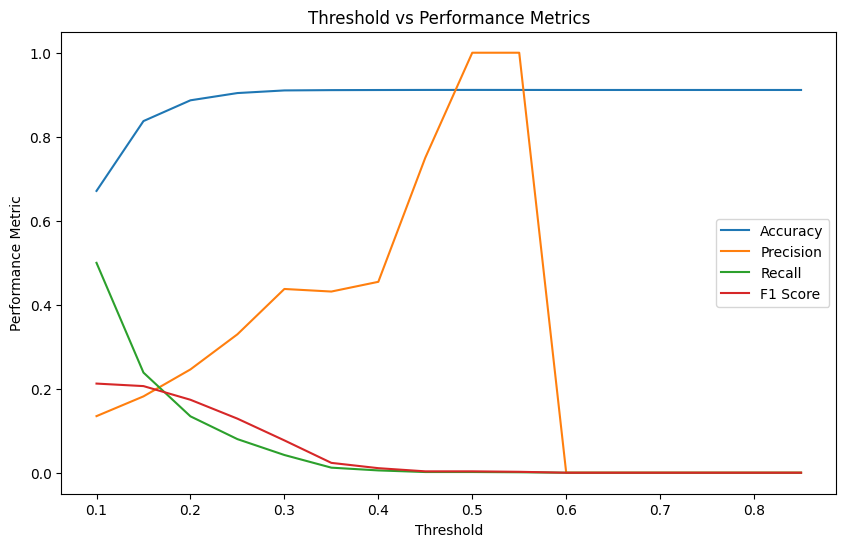

In [180]:
probabilities_rf = best_rf_model.predict_proba(X_test)[:, 1]

# Initialize lists to store metrics
thresholds = np.arange(0.1, 0.9, 0.05)
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# Calculate metrics for each threshold
for threshold in thresholds:
    y_pred_rf = (probabilities_rf > threshold)
    accuracy_list.append(accuracy_score(y_test, y_pred_rf))
    precision_list.append(precision_score(y_test, y_pred_rf))
    recall_list.append(recall_score(y_test, y_pred_rf))
    f1_list.append(f1_score(y_test, y_pred_rf))

# Plotting the metrics
plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracy_list, label='Accuracy')
plt.plot(thresholds, precision_list, label='Precision')
plt.plot(thresholds, recall_list, label='Recall')
plt.plot(thresholds, f1_list, label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('Performance Metric')
plt.title('Threshold vs Performance Metrics')
plt.legend()
plt.show()

In [182]:
probabilities_rf = best_rf_model.predict_proba(X_test)[:, 1]


# Precision and recall for various thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores_test)

# Calculate F1 scores from precision and recall for each threshold
# :-1 becuase the last values are 1 and needs to be ignored
f1_scores = 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1] + recalls[:-1])

f1_scores = np.nan_to_num(f1_scores)  
# ignore the error if there is a zero division
np.seterr(divide='ignore', invalid='ignore')

# Find the index of the highest F1 score
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
optimal_precision = precisions[optimal_idx]*100
optimal_recall = recalls[optimal_idx]*100
optimal_f1 = f1_scores[optimal_idx]*100

print(f"Optimal threshold: {optimal_threshold:.2f}")
print(f"Precision at optimal threshold: {optimal_precision:.2f}%")
print(f"Recall at optimal threshold: {optimal_recall:.2f}%")
print(f"F1 Score at optimal threshold: {optimal_f1:.2f}%")

Optimal threshold: 0.16
Precision at optimal threshold: 16.19%
Recall at optimal threshold: 28.16%
F1 Score at optimal threshold: 20.56%


Optimal threshold to maximise recall, precision and f1 score is 0.16

In [183]:
#### THRESHOLD SO THAT PRECISION & RECALL IS OPTIMISED

optimal = 0.16
# Get probability predictions for the readmitted cases
probabilities_best_rf = best_rf_model.predict_proba(X_test)[:, 1]

# Convert these probability predictions into binary predictions with a threshold of 0.2 (f1 optimal)
y_pred_best_rf_threshold = (probabilities_best_rf >= optimal).astype(int)

# Now you can evaluate the model with the custom threshold
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf_threshold)
print("Threshold to Optimise the Precision, Recall and F1 Score")
print(f"Best Random Forest Model Accuracy with {optimal:.2f} Threshold: {accuracy_best_rf * 100:.2f}%")

# Detailed classification report for the best model with the custom threshold
report_best_rf_threshold = classification_report(y_test, y_pred_best_rf_threshold, target_names=['Class 0', 'Class 1'])
print(f"Best Random Forest Model Classification Report with {optimal:.2f} Threshold:")
print(report_best_rf_threshold)


Threshold to Optimise the Precision, Recall and F1 Score
Best Random Forest Model Accuracy with 0.16 Threshold: 85.24%
Best Random Forest Model Classification Report with 0.16 Threshold:
              precision    recall  f1-score   support

     Class 0       0.92      0.91      0.92     18749
     Class 1       0.20      0.21      0.20      1825

    accuracy                           0.85     20574
   macro avg       0.56      0.56      0.56     20574
weighted avg       0.86      0.85      0.86     20574



- precision for readmissions (class 1) has increased compare to logistic regression (before the score were ranging from 0.13 to 0.19). Still 20% of correctness is still low. 
- recall for readmissions (class 1) is higher than regression  3 (optimal threshold) and 4(with smote) but lower for logistic regression 1 and 2.  
- F1-Score for the Random Forest model is also 0.20, which is aligned with its precision and recall. The Logistic Regression models have F1-scores ranging from 0.21 to 0.22. Despite the apparent closeness in F1-score, the balance between precision and recall is different. -> **The Random Forest model seems to provide a more balanced performance between precision and recall, which is desirable based on your objectives.**

- The Random Forest model may have benefitted from a more complex decision boundary and a Grid Search to optimize hyperparameters.
- The class_weight has been set manually for Logistic Regression models, while Random Forest used Grid Search, potentially leading to a better fine-tuning.

- The Random Forest model is better to meet the two-fold objective between resource allocation efficiency (precision) and patient safety (recall).

**Analysing Feature importance of the RF**

In [184]:
# Extracting the features importance
feature_importances = best_rf_model.feature_importances_

# Getting the columns 
feature_names = X_train.columns

# Create a DF
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DF
rf_feature_importances_df= feature_importances_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)


rf_feature_importances_df.head(10)

Feature  Importance
0                                severity_of_disease    0.070685
1                                 num_lab_procedures    0.066558
2                                    num_medications    0.060135
3                                   time_in_hospital    0.044893
4                                     num_procedures    0.030455
5                                   number_diagnoses    0.030290
6                                   number_inpatient    0.026678
7                                        visit_index    0.025495
8  discharge_disposition_description_Discharged/t...    0.017938
9                              complexity_of_disease    0.017593

- the three created features are both present as strong indicator for the predictability 
- interesting gender is not mentioned as important feature here (while in logistic regression feature importance it was present)

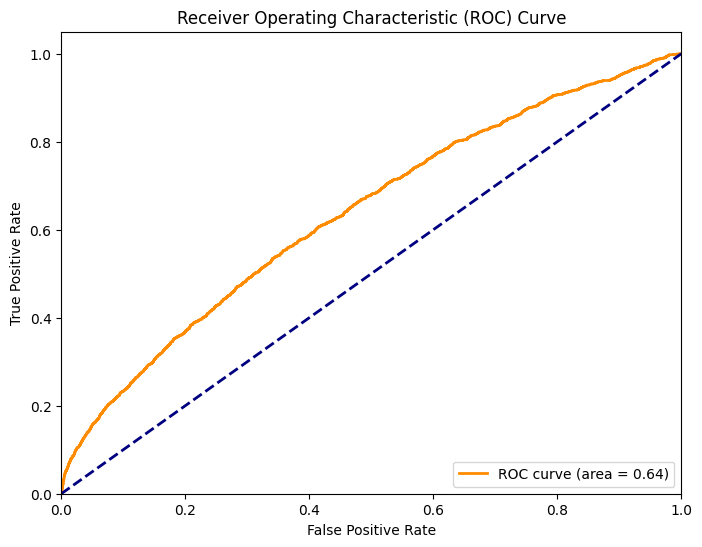

In [185]:
# Predict the probability scores for the positive class
y_scores = best_rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve data points
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the AUC (Area Under Curve) of the ROC
roc_auc = roc_auc_score(y_test, y_scores)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Same ROC Curve Area as in SMOTE model

## NOT TAKEN INTO CONSIDERATION FOR REPORT: 5.6 Random Forest with Gridsearch (Attention it takes almost 2 Hours to Run)

In [ ]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]        # Method for sampling data points (with or without replacement)
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=2)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print(f"Best parameters found: {grid_search.best_params_}")

# Use the best model found by GridSearchCV to make predictions
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the model with the best parameters
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f"Best Random Forest Model Accuracy: {accuracy_best_rf * 100:.2f}%")

# Detailed classification report for the best model
report_best_rf = classification_report(y_test, y_pred_best_rf, target_names=['Class 0', 'Class 1'])
print("Best Random Forest Model Classification Report:")
print(report_best_rf)


Fitting 3 folds for each of 216 candidates, totalling 648 fits


## 5.7 Vanilla Neural network

In [62]:
### Running again the pre-processing - As safety
df = pd.read_csv('diabetis_clean.csv')

# drop not needed columns: 
df = df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)

# Defining Columns to Hot-Encode
columns_to_encode = [
    'age','race', 'gender', 'max_glu_serum',
    'A1Cresult',
    "metformin",
    "repaglinide", 
    "nateglinide", 
    "chlorpropamide",
    "glimepiride",
    'acetohexamide',
    'glipizide',
    'glyburide',
    'tolbutamide',
    'pioglitazone',
    'rosiglitazone',
    'acarbose',
    "miglitol", 
    "troglitazone", 
    "tolazamide", 
    "examide", 
    "citoglipton",
    "insulin", 
    "glyburide-metformin", 
    "glipizide-metformin",
    "glimepiride-pioglitazone",
    "metformin-rosiglitazone",
    "metformin-pioglitazone" , 
    "change", 
    "diabetesMed", 
    'discharge_disposition_description', 
    'admission_type_description',
    'admission_source_description', 
    'medical_specialty_grouped',
    'category_diag_1', 
    'category_diag_2', 
    'category_diag_3'
]

# Applying one-hot encoding
df_encoded = pd.get_dummies(df, columns=columns_to_encode)

# Convert 'readmitted' to binary labels
df_encoded['readmitted'] = df_encoded['readmitted'].map({'<30': 1, 'NO': 0})


X = df_encoded.drop('readmitted', axis=1)
y = df_encoded['readmitted']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




In [48]:
X_train.shape

(48003, 197)

In [63]:
#### STANDARTISATION OF THE CONTINEOUS VALUES
continuous_features = [
    'time_in_hospital', 'num_lab_procedures',
    'num_procedures', 'num_medications', 'number_outpatient',
    'number_emergency', 'number_inpatient', 'number_diagnoses',
    'severity_of_disease', 'visit_index', 'complexity_of_disease'
]

continuous_features = list(set(continuous_features))

# Scaling continuous features only
ct = ColumnTransformer([
    ("scale", StandardScaler(), continuous_features)
], remainder='passthrough')

ct.fit(X_train[continuous_features])  # Only fit on the training data

# Apply the transformation to both the training and test sets.
X_train[continuous_features] = ct.transform(X_train[continuous_features])
X_test[continuous_features] = ct.transform(X_test[continuous_features])

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')



In [15]:
### INITIALISING THE SCORES
# F1 to print during training
class F1Score(metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision_m = metrics.Precision()
        self.recall_m = metrics.Recall()
        self.f1_score = self.add_weight(name='f1', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision_m.update_state(y_true, y_pred, sample_weight=sample_weight)
        self.recall_m.update_state(y_true, y_pred, sample_weight=sample_weight)
        precision = self.precision_m.result()
        recall = self.recall_m.result()
        f1_val = 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))
        self.f1_score.assign(f1_val)

    def result(self):
        return self.f1_score

    def reset_states(self):
        self.precision_m.reset_states()
        self.recall_m.reset_states()
        self.f1_score.assign(0)

In [16]:
from tensorflow.keras import metrics

# BASIC ARCHITECTURE
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


# COMPILE MODEL WITH F1Score Metric
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy',
                       metrics.Precision(name='precision'),
                       metrics.Recall(name='recall'),
                       F1Score()])


# Training the model
history = model.fit(X_train, y_train, epochs=50, 
                    validation_split=0.2
                    )

# After training your model, use this to evaluate
results = model.evaluate(X_test, y_test)
print(f"Test loss: {results[0]}")
print(f"Test accuracy: {results[1]}")
print(f"Test precision: {results[2]}")  
print(f"Test recall: {results[3]}")    
print(f"Test F1 score: {results[4].numpy()}") 


Epoch 1/50


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1201/1201 ━━━━━━━━━━━━━━━━━━━━ 2s 804us/step - accuracy: 0.8926 - f1_score: 0.0138 - loss: 0.3195 - precision: 0.0580 - recall: 0.0146 - val_accuracy: 0.9107 - val_f1_score: 0.0000e+00 - val_loss: 0.2898 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/50
1201/1201 ━━━━━━━━━━━━━━━━━━━━ 1s 652us/step - accuracy: 0.9076 - f1_score: 0.0024 - loss: 0.2953 - precision: 0.3843 - recall: 0.0012 - val_accuracy: 0.9107 - val_f1_score: 0.0000e+00 - val_loss: 0.2907 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/50
1201/1201 ━━━━━━━━━━━━━━━━━━━━ 1s 543us/step - accuracy: 0.9083 - f1_score: 0.0052 - loss: 0.2918 - precision: 0.4804 - recall: 0.0026 - val_accuracy: 0.9105 - val_f1_score: 0.0023 - val_loss: 0.2905 - val_precision: 0.2500 - val_recall: 0.0012
Epoch 4/50
1201/1201 ━━━━━━━━━━━━━━━━━━━━ 1s 538us/step - accuracy: 0.9091 - f1_score: 0.0113 - loss: 0.2867 - precision: 0.5856 - recall: 0.0057 - val_accuracy: 0.9107 - val_f1_score: 0.0000e+00 - val_loss: 0.2904 - va

- precision similar to the first LR models, lower than in LR with SMOET or RF with Optimal Threshold
- recall better than in RF with grid search , still worse than in LR
- F-1 score super low around 20%

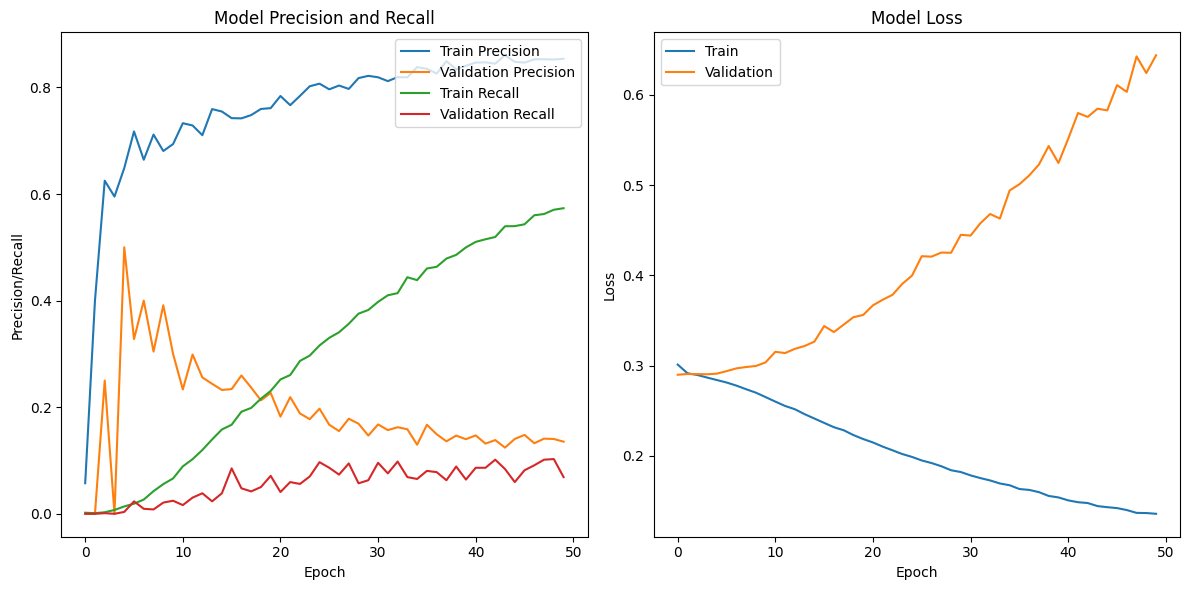

In [17]:
# Summarize history for accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot = accuracy
plt.plot(history.history['precision'], label='Train Precision')
plt.plot(history.history['val_precision'], label='Validation Precision')

# Plotting training and validation recall
plt.plot(history.history['recall'], label='Train Recall')
plt.plot(history.history['val_recall'], label='Validation Recall')

plt.title('Model Precision and Recall')
plt.ylabel('Precision/Recall')
plt.xlabel('Epoch')
plt.legend(loc='upper right')


# Summarize history for loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot = loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


- volatile begin of the training not usual
- training loss is declining but it has not reached a plateau , probably more epochs needed
- validation loss increases after 4-5 epochs -> sign of overfitting



## 5.8 NN with Dropout Layers and Class Weights

Define metrics to record during training: F1 Score

In [18]:
# Custom F1 Score metric class -> to analyse F1 Score evolution during training
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        p = self.precision.result()
        r = self.recall.result()
        return 2 * (p * r) / (p + r + tf.keras.backend.epsilon())

    def reset_states(self):
        self.precision.reset_states()
        self.recall.reset_states()

Build model and fit it

In [44]:
# Create a dictionary mapping class labels to weights
class_weights =  {0: 1, 1: (len(y_train) - sum(y_train)) / sum(y_train)}

# Build the model
model_nn2 = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.1),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model_nn2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy', metrics.Precision(name='precision'), metrics.Recall(name='recall'), F1Score()])

# Early stopping
early_stopping_monitor = EarlyStopping(patience=10)

# Ensure class_weights has the right keys
print("Unique values in y_train:", y_train.unique())
print("Class weights keys:", class_weights.keys())


# Training the model
history = model_nn2.fit(X_train, y_train, 
                    epochs=50, 
                    validation_split=0.2, 
                    callbacks=[early_stopping_monitor],
                    class_weight=class_weights
                    )


Unique values in y_train: [0. 1.]
Class weights keys: dict_keys([0, 1])


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


KeyError: 4

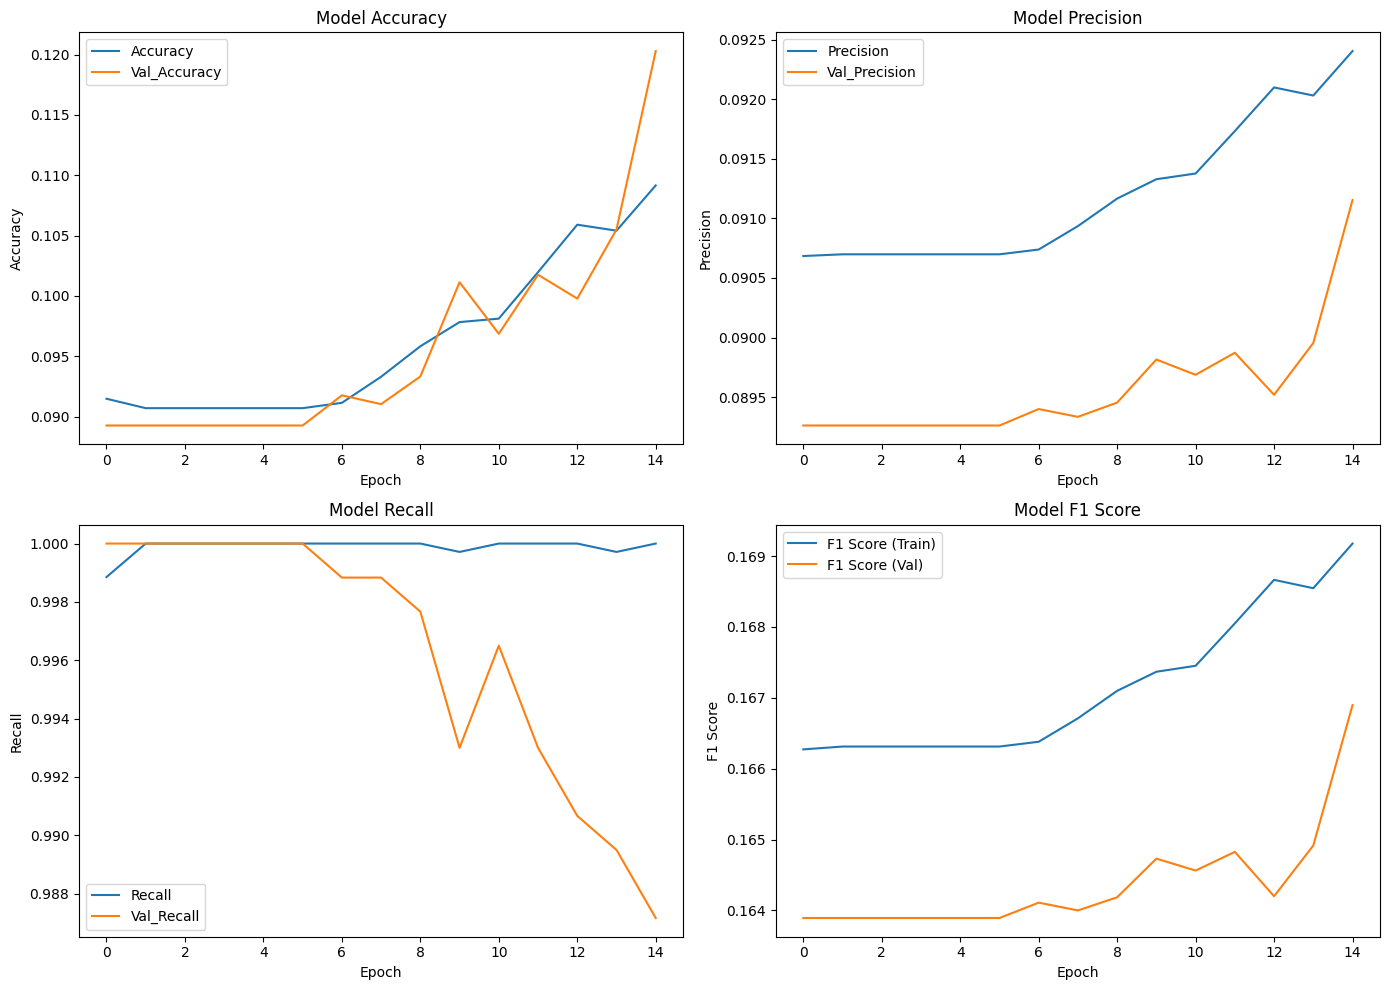

In [172]:
#### VISUALISATION OF THE TRAINING PROCESS

# Accuracy
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val_Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Precision
plt.subplot(2, 2, 2)
plt.plot(history.history['precision'], label='Precision')
plt.plot(history.history['val_precision'], label='Val_Precision')
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend()

# Recall
plt.subplot(2, 2, 3)
plt.plot(history.history['recall'], label='Recall')
plt.plot(history.history['val_recall'], label='Val_Recall')
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend()

# F1_Score
plt.subplot(2, 2, 4)
f1_train = [2 * (p * r) / (p + r + 1e-07) for p, r in zip(history.history['precision'], history.history['recall'])]
f1_val = [2 * (p * r) / (p + r + 1e-07) for p, r in zip(history.history['val_precision'], history.history['val_recall'])]
plt.plot(f1_train, label='F1 Score (Train)')
plt.plot(f1_val, label='F1 Score (Val)')
plt.title('Model F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
### EVALUATING THE MODEL ON THE TEST SET
# Helper functions
# code from : https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [165]:
# Evaluating the model on test set
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test)

print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")
print(f"Test precision: {precision}")  
print(f"Test recall: {recall}")    
print(f"Test F1 score: {f1_score}")


  1/643 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.1875 - f1_score: 0.2353 - loss: 2.6413 - precision: 0.1333 - recall: 1.0000

643/643 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - accuracy: 0.1049 - f1_score: 0.1650 - loss: 2.9408 - precision: 0.0900 - recall: 0.9936
Test loss: 2.934925079345703
Test accuracy: 0.10576456040143967
Test precision: 0.08971629291772842
Test recall: 0.9928767085075378
Test F1 score: 0.16456270217895508


In [184]:
import numpy as np
from tensorflow.keras import backend as K

### EVALUATING THE MODEL ON THE TEST SET
# Helper functions
# code from : https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model
def recall_m(y_true, y_pred):
    y_true = K.cast(y_true, 'float32')  # Ensure y_true is cast to float
    y_pred = K.cast(y_pred, 'float32')  # Ensure y_pred is cast to float after thresholding
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    y_true = K.cast(y_true, 'float32')  # Ensure y_true is cast to float
    y_pred = K.cast(y_pred, 'float32')  # Ensure y_pred is cast to float after thresholding
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2 * (precision * recall) / (precision + recall + K.epsilon())

# Probabilities are 2D numpy array with shape (n_samples, 1) from model.predict()
probabilities = model.predict(X_test).ravel()  # Flatten to 1D

# Threshold
threshold = 0.001
y_pred = (probabilities >= threshold).astype(np.float32)  

# Ensure y_test is also a 1D float32 array
y_test_1d = y_test.ravel().astype(np.float32)

# Calculate the metrics
precision = K.get_value(precision_m(y_test_1d, y_pred))
recall = K.get_value(recall_m(y_test_1d, y_pred))
f1 = K.get_value(f1_m(y_test_1d, y_pred))

# Calculate accuracy
accuracy = np.mean(np.equal(y_test_1d, y_pred))

print(f"Test accuracy: {accuracy}")
print(f"Test precision: {precision}")  
print(f"Test recall: {recall}")    
print(f"Test F1 score: {f1}")




 50/643 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

643/643 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Test accuracy: 0.09059978613784388
Test precision: 0.08887265622615814
Test recall: 1.0
Test F1 score: 0.16323789954185486


/var/folders/vg/nl_vpfpd3f96h8h8tbd78lw40000gn/T/ipykernel_46932/2993938778.py:33: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test_1d = y_test.ravel().astype(np.float32)


- test precision low, (also compared to previous models)


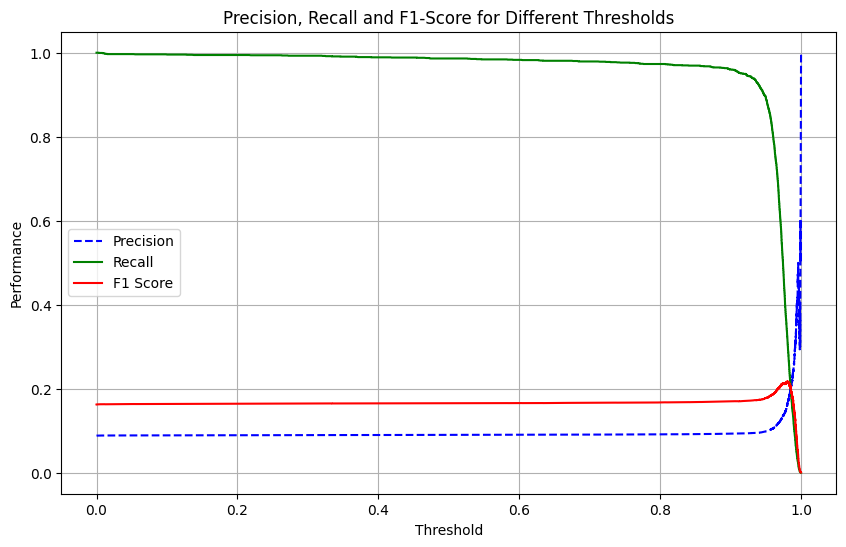

In [185]:
# Calculate precision-recall pairs for different probability thresholds
precision, recall, thresholds = precision_recall_curve(y_test, probabilities)

# The F1 score can be calculated for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-7)  # Adding a small epsilon to avoid division by zero

# Plotting the precision-recall curve
plt.figure(figsize=(10, 6))

plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds, recall[:-1], 'g-', label='Recall')
plt.plot(thresholds, f1_scores[:-1], 'r-', label='F1 Score')

plt.xlabel('Threshold')
plt.ylabel('Performance')
plt.title('Precision, Recall and F1-Score for Different Thresholds')
plt.legend(loc='best')
plt.grid(True)

plt.show()

This model seams to have bias in predicting readmissions. 
- **precison** staying so flat, it is unsual, because typicall as the threshold increases, the precisions hsould also increase. Constant precision could mean that th emodel may be predicting nealiry all samples as positive due to heavy class  weighting towards the readmisssions (positive class)
- **recall** drops sharply only around threshold of 0.9. This is expected because as the threshold for classifying a positive instance is raised, fewer instances meet the criteria to be classified as positive, leading to lower recall.
- **F1 score** remains relatively constant and then drops sharply as the threshold approaches 1.


The model is likely over-predicting the minority class (patients who will be readmitted within 30 days). This can lead to a high recall but low precision, which means the model is good at identifying true readmissions (at the cost of a large number of false positives), but not as good at distinguishing between those who will and will not be readmitted.

## 5.9 NN with Selected Features
We will train the neural network only with the features point out as important from random forest model and logistic regression


**Selecting the features**

In [16]:
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

# reading df again
df = pd.read_csv('diabetis_clean.csv')

# Selected Features
selected_features = [
    "severity_of_disease", "num_lab_procedures", "num_medications",
    "time_in_hospital", "number_inpatient", "visit_index", 
    "discharge_disposition_description",
    "number_diagnoses", "num_procedures", "age", "gender",
    "readmitted"
]

# create a copy of the dataframe with the selected features
df_selected = df[selected_features]

# Contineous Fearues that then need to be standardised
continuous_features = [
    "severity_of_disease", "num_lab_procedures", "num_medications",
    "time_in_hospital", "number_inpatient", "visit_index",
    "number_diagnoses", "num_procedures"
]

# Categorical Features need to be one hot encoded
categorical_features = [ "discharge_disposition_description", 
             "age", "gender" ]

# Split data into train and test sets
X = df_selected.drop('readmitted', axis=1)
y = df_selected['readmitted'].map({'<30': 1, 'NO': 0})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Fit and transform the training data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

X_train = X_train.toarray()
X_test = X_test.toarray()

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


# Make sure type of data match with model expectations
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [50]:
(len(y_train)-sum(y_train))/sum(y_train)

10.060599078341014

## 5.9.1  NN with Smaller Density of Neurons and SMOTE

In [17]:
# Build the model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.1),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(8, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model with custom F1Score metric
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy', metrics.Precision(name='precision'), metrics.Recall(name='recall'), F1Score()])

# Early stopping
early_stopping_monitor = EarlyStopping(patience=10)

# Setting up class weights
class_weights =  {0: 1, 1: (len(y_train) - sum(y_train)) / sum(y_train)}

# Training the model
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    validation_split=0.2, 
                    callbacks=[early_stopping_monitor],
                    class_weight=class_weights)

Epoch 1/50


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2184/2184 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.6201 - f1_score: 0.1804 - loss: 0.6553 - precision: 0.4948 - recall: 0.1142 - val_accuracy: 0.2748 - val_f1_score: 0.4311 - val_loss: 0.9378 - val_precision: 1.0000 - val_recall: 0.2748
Epoch 2/50
2184/2184 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6539 - f1_score: 0.3440 - loss: 0.6288 - precision: 0.5865 - recall: 0.2434 - val_accuracy: 0.2819 - val_f1_score: 0.4398 - val_loss: 0.8882 - val_precision: 1.0000 - val_recall: 0.2819
Epoch 3/50
2184/2184 ━━━━━━━━━━━━━━━━━━━━ 2s 797us/step - accuracy: 0.6655 - f1_score: 0.3945 - loss: 0.6190 - precision: 0.6145 - recall: 0.2906 - val_accuracy: 0.3585 - val_f1_score: 0.5278 - val_loss: 0.8538 - val_precision: 1.0000 - val_recall: 0.3585
Epoch 4/50
2184/2184 ━━━━━━━━━━━━━━━━━━━━ 2s 868us/step - accuracy: 0.6652 - f1_score: 0.4266 - loss: 0.6158 - precision: 0.6047 - recall: 0.3296 - val_accuracy: 0.3921 - val_f1_score: 0.5633 - val_loss: 0.8364 - val_precision: 1.0000 - val_recall

**Evaluating the model**

In [287]:
# Evaluating the model on test set
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test)

print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")
print(f"Test precision: {precision}")  
print(f"Test recall: {recall}")    
print(f"Test F1 score: {f1_score}")

 97/643 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - accuracy: 0.8144 - f1_score: 0.2169 - loss: 0.4854 - precision: 0.1782 - recall: 0.2811

643/643 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - accuracy: 0.8183 - f1_score: 0.1948 - loss: 0.4800 - precision: 0.1610 - recall: 0.2474
Test loss: 0.47716614603996277
Test accuracy: 0.8233693242073059
Test precision: 0.16186915338039398
Test recall: 0.23726026713848114
Test F1 score: 0.19244439899921417


**Visualisation Model Process**

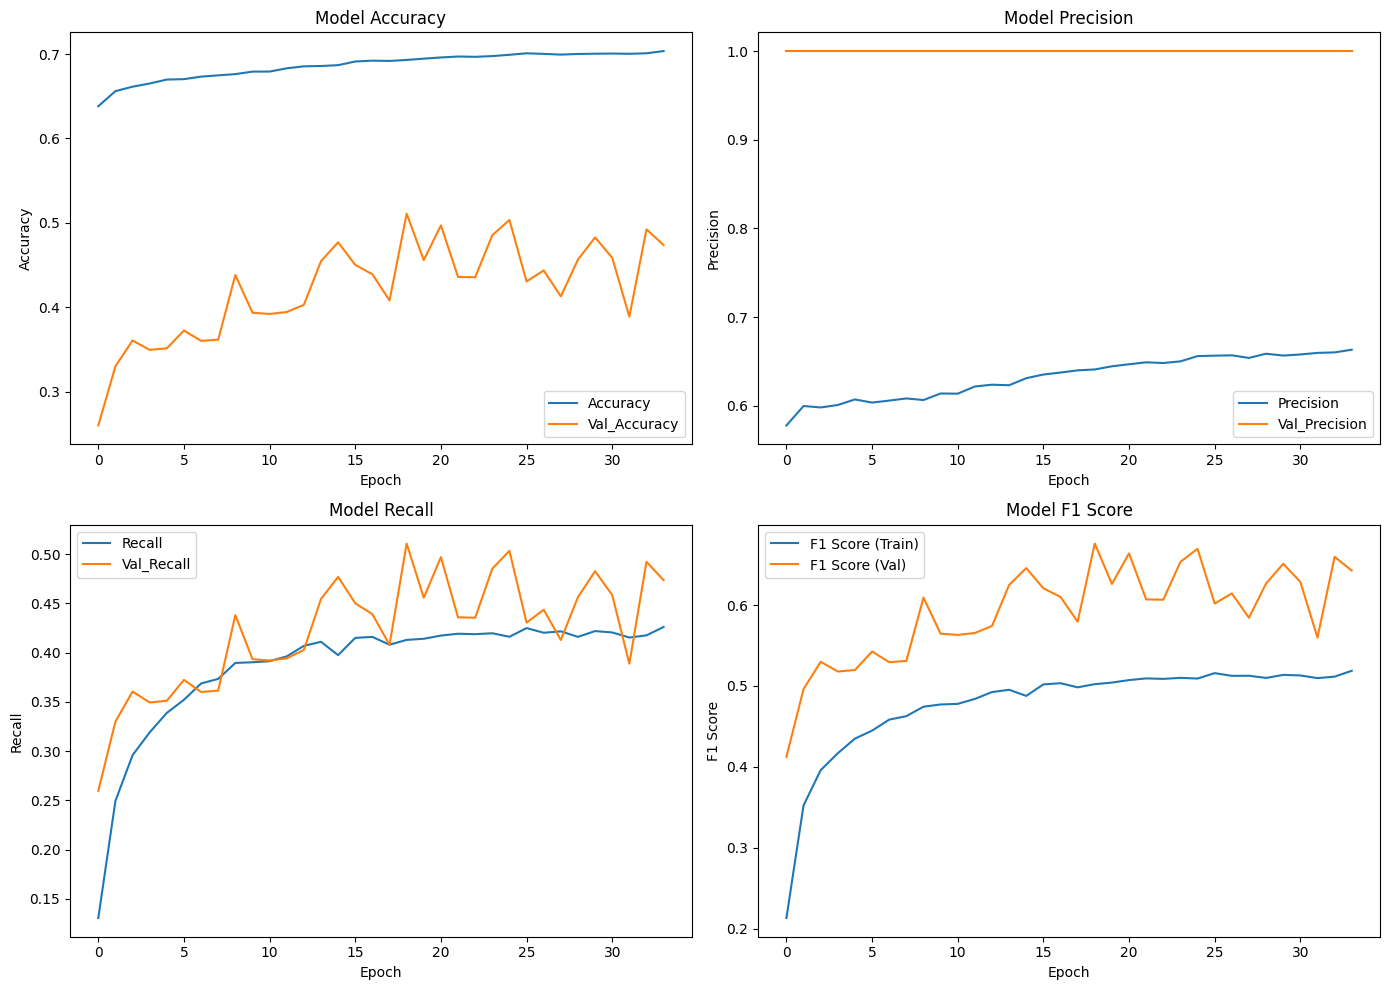

In [288]:
#### VISUALISATION OF THE TRAINING PROCESS

# Accuracy
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val_Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Precision
plt.subplot(2, 2, 2)
plt.plot(history.history['precision'], label='Precision')
plt.plot(history.history['val_precision'], label='Val_Precision')
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend()

# Recall
plt.subplot(2, 2, 3)
plt.plot(history.history['recall'], label='Recall')
plt.plot(history.history['val_recall'], label='Val_Recall')
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend()

# F1_Score
plt.subplot(2, 2, 4)
f1_train = [2 * (p * r) / (p + r + 1e-07) for p, r in zip(history.history['precision'], history.history['recall'])]
f1_val = [2 * (p * r) / (p + r + 1e-07) for p, r in zip(history.history['val_precision'], history.history['val_recall'])]
plt.plot(f1_train, label='F1 Score (Train)')
plt.plot(f1_val, label='F1 Score (Val)')
plt.title('Model F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

**Visualisation Precision, Recall and F1 with different Thresholds**


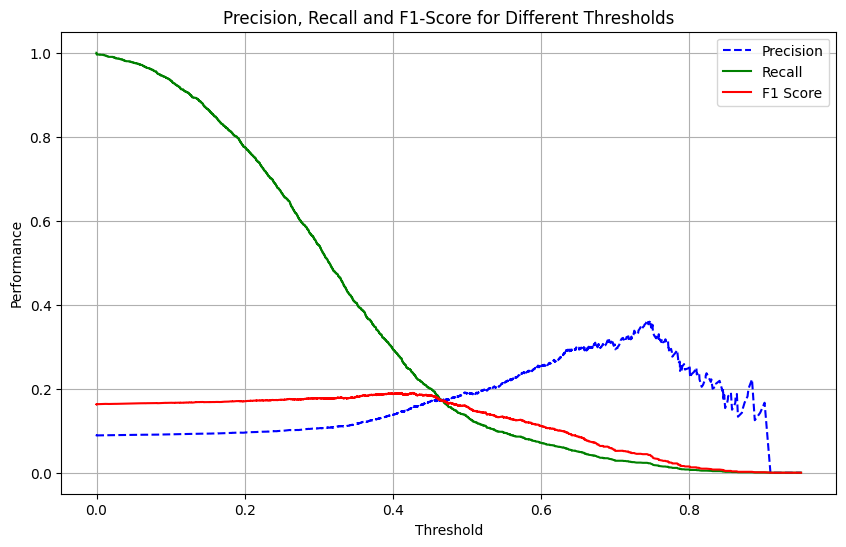

In [289]:
# Calculate precision-recall pairs for different probability thresholds
precision, recall, thresholds = precision_recall_curve(y_test, probabilities)

# The F1 score can be calculated for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-7)  # Adding a small epsilon to avoid division by zero

# Plotting the precision-recall curve
plt.figure(figsize=(10, 6))

plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds, recall[:-1], 'g-', label='Recall')
plt.plot(thresholds, f1_scores[:-1], 'r-', label='F1 Score')

plt.xlabel('Threshold')
plt.ylabel('Performance')
plt.title('Precision, Recall and F1-Score for Different Thresholds')
plt.legend(loc='best')
plt.grid(True)

plt.show()

- Precision: decreases gradually as the threshold is reduced -> typical precision curve and indicates that the model starts to include more false positives as it attempts to classify more instances as positive.
- Recall: starts high and gradually decreases as the threshold increases, which is expected because higher thresholds make the model more conservative about predicting positive instances.
- F1 Score: crosses the precision and recall curves, indicating the trade-off between them. The F1 score is highest when there is a balance between precision and recall, which seems to occur in the middle range of thresholds.

### 5.8.2 Fine Tuning with RandomSearch

In [82]:
# Splitting the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [88]:
# Define a function to build the model
def build_model(hp):
    model = Sequential()
    model.add(Dense(hp.Int('input_units', min_value=32, max_value=512, step=32), activation='relu', input_dim=X_train.shape[1]))

    # Defining the number of hidden layers and their neurons
    for i in range(hp.Int('n_layers', 1, 5)):
        model.add(Dense(hp.Int(f'dense_{i}_units', min_value=32, max_value=512, step=32), activation='relu'))
        model.add(Dropout(hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, step=0.1)))

    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    model.compile(optimizer=tf.keras.optimizers.Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
                  loss='binary_crossentropy',
                  metrics=[Precision(name='precision'), Recall(name='recall'), tf.keras.metrics.AUC(curve='PR', name='f1')])
    
    return model


# Set up Keras Tuner
tuner = RandomSearch(
    build_model,
    objective=Objective("f1", direction="max"),
    max_trials=20,
    executions_per_trial=2,
    directory='output',
    project_name='HospitalReadmission')

# Summary of the search space
tuner.search_space_summary()

# Create a dictionary mapping class labels to weights
class_weights =  {0: 1, 1:len(y_train) - sum(y_train) / sum(y_train)}

# Fit the tuner
tuner.search(X_train, y_train, 
             epochs=50, 
             validation_split=0.2, 
             class_weight=class_weights,
             callbacks=[tf.keras.callbacks.EarlyStopping('val_f1', patience=3, mode='max', restore_best_weights=True)]
             )

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]


Reloading Tuner from output/HospitalReadmission/tuner0.json
Search space summary
Default search space size: 13
input_units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
n_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 5, 'step': 1, 'sampling': 'linear'}
dense_0_units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
dropout_0 (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
learning_rate (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
dense_1_units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
dropout_1 (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
dense_2_units (Int)

In [89]:
# Assuming best_model is your trained Keras model
val_metrics = best_model.evaluate(X_val, y_val, verbose=0)

# Depending on the order of metrics you provided during model compilation, 
# val_metrics will contain the loss followed by precision, recall, and F1 score respectively.
val_loss, val_precision, val_recall, val_f1 = val_metrics

print(f"Validation Precision: {val_precision}")
print(f"Validation Recall: {val_recall}")
print(f"Validation F1 Score: {val_f1}")


Validation Precision: 0.8480345606803894
Validation Recall: 0.7198715806007385
Validation F1 Score: 0.9015291929244995


In [85]:
# Evaluate the best model - TEST SET
loss, precision, recall, f1 = best_model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Precision: {precision}')
print(f'Test Recall: {recall}')
print(f'Test F1: {f1}')

  1/643 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - f1: 0.1250 - loss: 12.8039 - precision: 0.1250 - recall: 1.0000

643/643 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - f1: 0.0892 - loss: 13.4013 - precision: 0.0892 - recall: 0.9981
Test Loss: 13.389225006103516
Test Precision: 0.08878915011882782
Test Recall: 0.9972602725028992
Test F1: 0.08886687457561493


Epoch 1/50


1747/1747 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - f1: 0.9037 - loss: 0.3963 - precision: 0.8125 - recall: 0.8074 - val_f1: 0.9050 - val_loss: 0.3926 - val_precision: 0.8125 - val_recall: 0.8154
Epoch 2/50
1747/1747 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - f1: 0.9155 - loss: 0.3716 - precision: 0.8218 - recall: 0.8285 - val_f1: 0.9082 - val_loss: 0.3851 - val_precision: 0.8253 - val_recall: 0.8070
Epoch 3/50
1747/1747 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - f1: 0.9246 - loss: 0.3506 - precision: 0.8328 - recall: 0.8410 - val_f1: 0.9085 - val_loss: 0.3864 - val_precision: 0.8077 - val_recall: 0.8403
Epoch 4/50
1747/1747 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - f1: 0.9331 - loss: 0.3326 - precision: 0.8386 - recall: 0.8530 - val_f1: 0.9126 - val_loss: 0.3736 - val_precision: 0.8203 - val_recall: 0.8427
Epoch 5/50
1747/1747 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - f1: 0.9375 - loss: 0.3200 - precision: 0.8456 - recall: 0.8619 - val_f1: 0.9148 - val_loss: 0.3757 - val_precision: 0.8203 - val_recall: 0.8427
Epoch 6/50


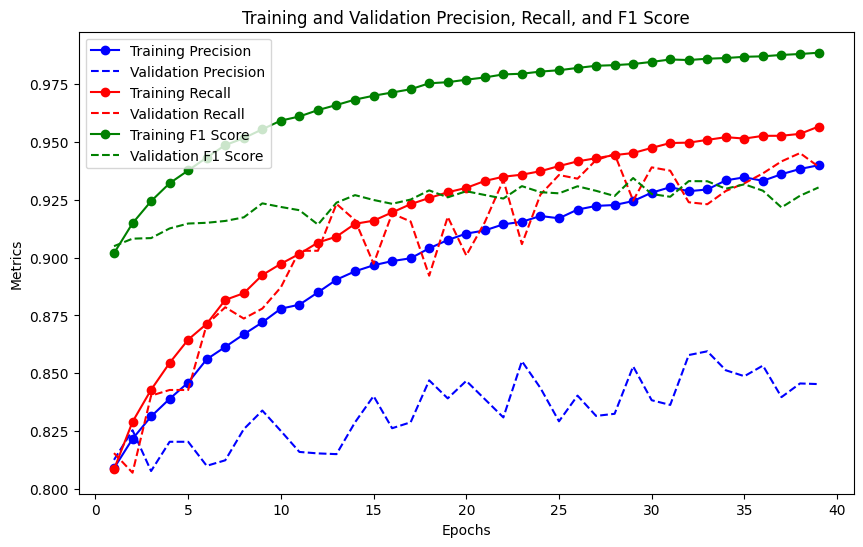

In [90]:
#### VISUALISATION OF THE TRAINING PROCESS - FOR BEST MODEL

history = best_model.fit(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[tf.keras.callbacks.EarlyStopping('val_f1', patience=10, mode='max', restore_best_weights=True)])

# Access the history to retrieve the training and validation metrics
train_precision = history.history['precision']
train_recall = history.history['recall']
train_f1 = history.history['f1']  # Ensure you've added a custom F1 metric calculation in your model's metrics if it's not directly available
val_precision = history.history['val_precision']
val_recall = history.history['val_recall']
val_f1 = history.history['val_f1']

# Plotting the results
epochs = range(1, len(train_precision) + 1)
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_precision, 'bo-', label='Training Precision')
plt.plot(epochs, val_precision, 'b--', label='Validation Precision')
plt.plot(epochs, train_recall, 'ro-', label='Training Recall')
plt.plot(epochs, val_recall, 'r--', label='Validation Recall')
plt.plot(epochs, train_f1, 'go-', label='Training F1 Score')
plt.plot(epochs, val_f1, 'g--', label='Validation F1 Score')
plt.title('Training and Validation Precision, Recall, and F1 Score')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.show()

## 5.10 NN With Class weights, more complex architecture


In [251]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Calculate class weights
class_weight = {0: 1, 1: (len(y_train) - sum(y_train)) / sum(y_train)}

# Create the model architecture
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy',
                       metrics.Precision(name='precision'),
                       metrics.Recall(name='recall'),
                       F1Score()]
                       )

# Fit the model
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=64,
                    class_weight=class_weight,
                    validation_split=0.2,
                    callbacks=[early_stopping_monitor])


Epoch 1/50


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


601/601 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5420 - f1_score: 0.1506 - loss: 615.9487 - precision: 0.0905 - recall: 0.4505 - val_accuracy: 0.0893 - val_f1_score: 0.1639 - val_loss: 0.7777 - val_precision: 0.0893 - val_recall: 1.0000
Epoch 2/50
601/601 ━━━━━━━━━━━━━━━━━━━━ 1s 848us/step - accuracy: 0.4593 - f1_score: 0.1515 - loss: 11.4072 - precision: 0.0885 - recall: 0.5250 - val_accuracy: 0.0893 - val_f1_score: 0.1639 - val_loss: 1.1434 - val_precision: 0.0893 - val_recall: 1.0000
Epoch 3/50
601/601 ━━━━━━━━━━━━━━━━━━━━ 1s 838us/step - accuracy: 0.4471 - f1_score: 0.1559 - loss: 4.2270 - precision: 0.0906 - recall: 0.5651 - val_accuracy: 0.8585 - val_f1_score: 0.0885 - val_loss: 0.4351 - val_precision: 0.1041 - val_recall: 0.0770
Epoch 4/50
601/601 ━━━━━━━━━━━━━━━━━━━━ 1s 924us/step - accuracy: 0.4146 - f1_score: 0.1557 - loss: 2.4565 - precision: 0.0897 - recall: 0.5958 - val_accuracy: 0.7731 - val_f1_score: 0.1274 - val_loss: 0.5937 - val_precision: 0.0970 - val_recall: 0

In [263]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Calculate class weights
class_weight = {0: 1, 1: (len(y_train) - sum(y_train)) / sum(y_train)}

# Create the model architecture
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy',
                       metrics.Precision(name='precision'),
                       metrics.Recall(name='recall'),
                       F1Score()]
              )

# Fit the model
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=64,
                    class_weight=class_weight,
                    validation_split=0.2,
                    callbacks=[early_stopping_monitor])


Epoch 1/50


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


601/601 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3948 - f1_score: 0.1561 - loss: 1350.2628 - precision: 0.0896 - recall: 0.6236 - val_accuracy: 0.9059 - val_f1_score: 0.0217 - val_loss: 1.6267 - val_precision: 0.1515 - val_recall: 0.0117
Epoch 2/50
601/601 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5003 - f1_score: 0.1521 - loss: 455.5275 - precision: 0.0896 - recall: 0.5092 - val_accuracy: 0.9005 - val_f1_score: 0.0383 - val_loss: 1.3595 - val_precision: 0.1397 - val_recall: 0.0222
Epoch 3/50
601/601 ━━━━━━━━━━━━━━━━━━━━ 1s 840us/step - accuracy: 0.4835 - f1_score: 0.1473 - loss: 281.4542 - precision: 0.0866 - recall: 0.4992 - val_accuracy: 0.9107 - val_f1_score: 0.0000e+00 - val_loss: 1.9618 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/50
601/601 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4986 - f1_score: 0.1555 - loss: 183.3506 - precision: 0.0921 - recall: 0.5054 - val_accuracy: 0.9088 - val_f1_score: 0.0068 - val_loss: 1.9381 - val_precision: 0.1200 -

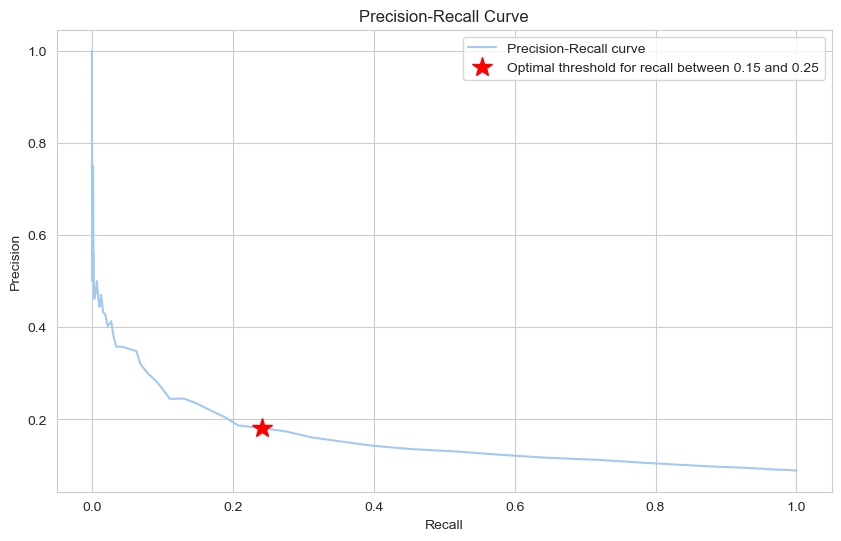

Optimal threshold for recall between 0.15 and 0.25 is: 0.17


In [264]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Assume 'probabilities' is the output of the model.predict() method on the test set

# Calculate precision and recall for various thresholds
precision, recall, thresholds = precision_recall_curve(y_test, probabilities)

# Calculate the F1 score for each threshold
f1_scores = 2*recall*precision / (recall + precision + 1e-6)  # add a small epsilon to avoid division by zero

# Find the threshold that gives the best F1 score within the specified recall range
optimal_indices = np.where(np.logical_and(recall >= 0.15, recall <= 0.25))[0]
optimal_threshold_index = np.argmax(f1_scores[optimal_indices])
optimal_threshold = thresholds[optimal_indices][optimal_threshold_index]

# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.plot(recall[optimal_indices][optimal_threshold_index], precision[optimal_indices][optimal_threshold_index], 'r*', markersize=15, label='Optimal threshold for recall between 0.15 and 0.25')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Print the optimal threshold
print(f"Optimal threshold for recall between 0.15 and 0.25 is: {optimal_threshold}")


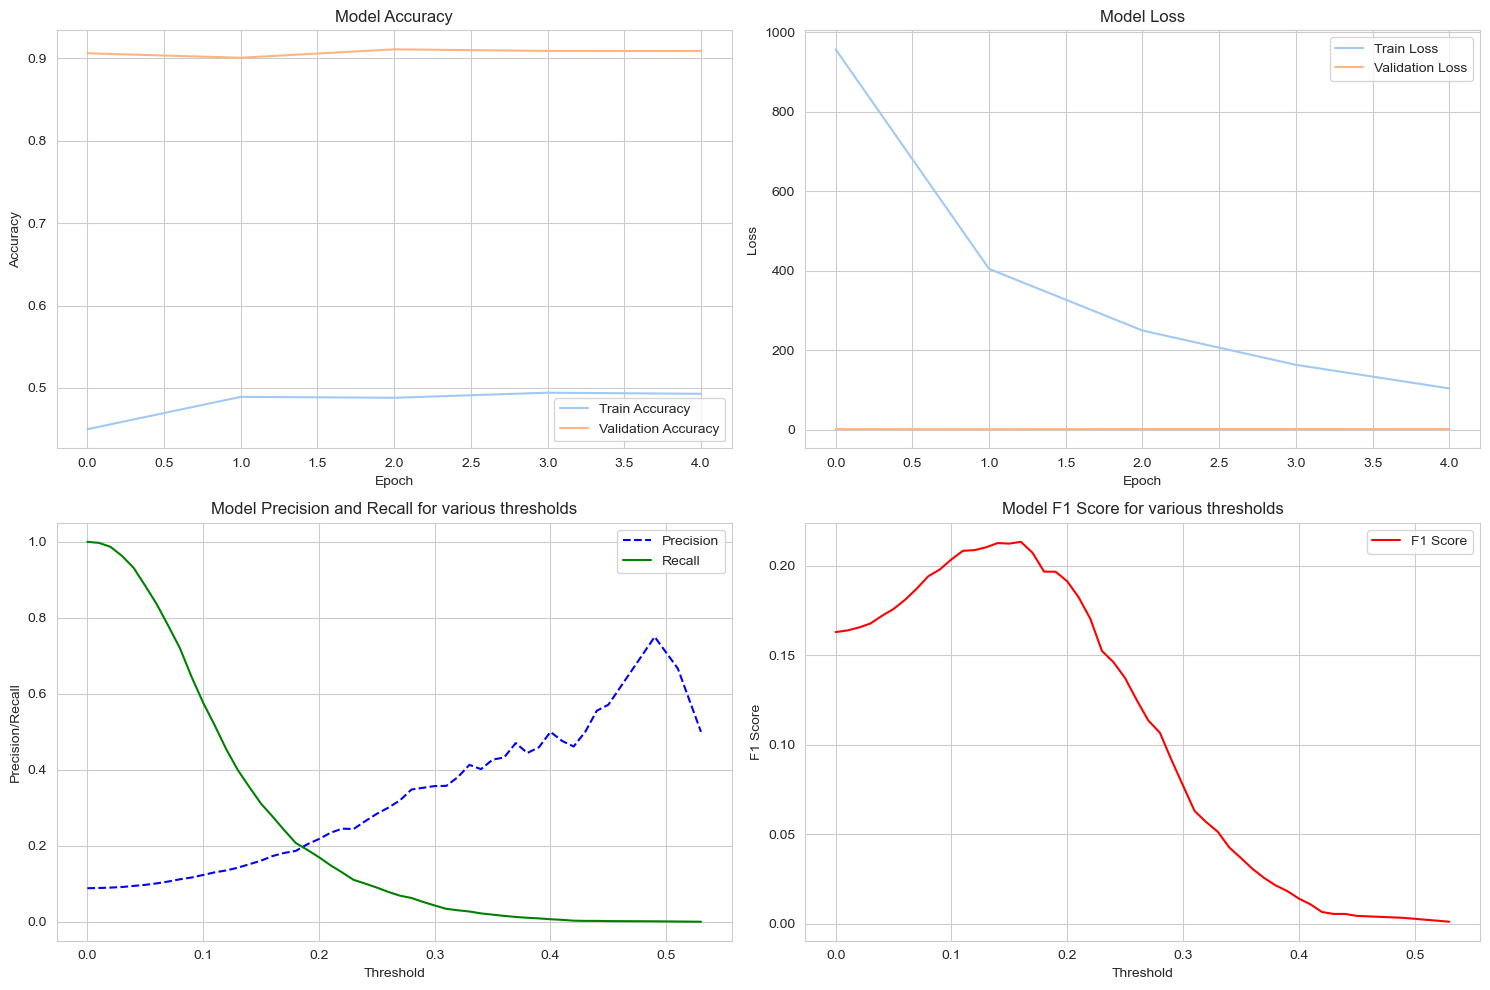

In [265]:
# Calculate precision and recall values
precision, recall, thresholds = precision_recall_curve(y_test, probabilities)

# Calculate the F1 scores from the precision and recall
f1_scores = 2 * precision * recall / (precision + recall + 1e-6)  # To avoid division by zero

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot accuracy
axs[0, 0].plot(history.history['accuracy'], label='Train Accuracy')
axs[0, 0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[0, 0].set_title('Model Accuracy')
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].legend(loc='lower right')

# Plot loss
axs[0, 1].plot(history.history['loss'], label='Train Loss')
axs[0, 1].plot(history.history['val_loss'], label='Validation Loss')
axs[0, 1].set_title('Model Loss')
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('Loss')
axs[0, 1].legend(loc='upper right')

# Plot precision and recall for various thresholds
axs[1, 0].plot(thresholds, precision[:-1], 'b--', label='Precision')
axs[1, 0].plot(thresholds, recall[:-1], 'g-', label='Recall')
axs[1, 0].set_title('Model Precision and Recall for various thresholds')
axs[1, 0].set_xlabel('Threshold')
axs[1, 0].set_ylabel('Precision/Recall')
axs[1, 0].legend(loc='best')

# Plot F1 Score
axs[1, 1].plot(thresholds, f1_scores[:-1], 'r-', label='F1 Score')
axs[1, 1].set_title('Model F1 Score for various thresholds')
axs[1, 1].set_xlabel('Threshold')
axs[1, 1].set_ylabel('F1 Score')
axs[1, 1].legend(loc='best')

# Adjust layout
plt.tight_layout()
plt.show()